+ https://rpubs.com/cliex159/871556
+ http://gallery.htmlwidgets.org/
+ https://github.com/ThanhDatIU/datacamp
+ https://github.com/EmilHvitfeldt/R-text-data

##**Analyse des sentiments dans R**

+ *4 heures*
+ *14 Vidéos*
+ *52 Exercices*
+ *11 715 participants*
+ *4 200 XP*

###**Description du cours**

+ **Ajoutez l'analyse des sentiments à votre boîte à outils d'exploration de texte ! L'analyse des sentiments est utilisée par les mineurs de texte dans le marketing, la politique, le service client et ailleurs. Dans ce cours, vous apprendrez à identifier le langage positif et négatif, l'intention émotionnelle spécifique et à faire des visualisations convaincantes. Vous commencerez par une introduction à la notation de polarité à l'aide de la fonction de sentiment de qdap, et développerez votre compréhension de la loi de Zipf et des lexiques de subjectivité en cours de route.**

+ ***Le sentiment, et le langage utilisé pour l'exprimer, est compliqué et nuancé. Il est basé sur la linguistique, la sociologie et la psychologie, ainsi que sur la culture et l'argot. Le deuxième chapitre de ce cours vous aide à naviguer dans ces difficultés à l'aide de la roue des émotions de Plutchik et organise votre travail à l'aide de Tidytext du Tidyverse.***

+ *Transformer votre analyse des sentiments en visualisations de données claires vous aidera à créer un récit plus clair et à partager vos idées avec le reste de l'entreprise. Le troisième chapitre de ce cours vous montre comment visualiser votre analyse des sentiments et vous emmène au-delà des nuages de mots pour créer des graphiques simples et percutants qui racontent toute l'histoire de vos données.*

+ ***Vous terminerez le cours en mettant toutes vos connaissances à l'épreuve avec une étude de cas. En utilisant les avis Airbnb, vous explorerez ce que les gens recherchent vraiment dans une bonne location.***

####**1) Fast & Dirty : Score de polarité**

+ ***Dans le premier chapitre, vous apprendrez à appliquer la fonction de sentiment de qdap appelée polarity()***.

|OBJECTIFS|
|---------|
Parlons de nos sentiments
Sautez dedans ! Visualiser la polarité
Remise à niveau TM (I)
Remise à niveau TM (II)
Combien de mots connaissez-vous? Loi de Zipf et lexique de la subjectivité
Qu'est-ce qu'un lexique de subjectivité ?
Où peut-on observer la loi de Zipf ?
Polarité sur le texte réel
Explorez la polarité et le lexique intégré de qdap
Joyeuses chansons !

####**2) Analyse des sentiments à la manière de tidytext**

+ ***Dans le deuxième chapitre, vous explorerez 3 lexiques de subjectivité de tidytext. Ensuite, vous ferez une jointure interne pour marquer du texte.***

|OBJECTIFS|
|---------|
La roue de l'émotion de Plutchik, polarité vs sentiment
Une théorie de l'émotion
DTM vs matrice tidytext
Obtenir des lexiques de sentiments
Lexique Bing avec une explication de jointure interne
Polarité de rangement Bing : exemple simple
Bing tidy polarity : compter et faire pivoter la baleine blanche
Méthodologies AFINN & NRC plus en détail
AFINN : Je suis ta Huckleberry
Le merveilleux magicien du CNRC

####**3) Visualiser le sentiment**
+ ***Créez des visuels convaincants avec votre sortie de sentiment.***


|OBJECTIFS|
|---------|
Astuce de salon ou utile?
Une vraie perspicacité ?
Fin malheureuse ? Polarité chronologique
Impact des mots, analyse des fréquences
Introspection à l'aide de l'analyse des sentiments
Diviser pour mieux régner : Utiliser la polarité pour un nuage de comparaison
Introspection émotionnelle
Comparer et contraster le graphique à barres empilées
Interprétation des visualisations
Diagramme de densité de noyau
Boîte à moustaches
Carte radar
Treemaps pour des groupes de documents


####**4) Étude de cas : avis Airbnb**

+ ***Votre bien est-il une bonne location ? Que recherchent les gens dans une bonne location ?***

|OBJECTIFS|
|---------|
Rappel sur le workflow de text mining
Étape 1 : Que voulez-vous savoir ?
Étape 2 : Identifiez les sources de texte
Examinez rapidement la polarité de base
Étape 3 : Organisez (et nettoyez) le texte
Créer des corpus basés sur la polarité
Créez un Tibble de texte bien rangé !
Comparez Tidy Sentiment à Qdap Polarity
Étape 4 : Extraction de caractéristiques & Étape 5 : L'heure de l'analyse... presque là !
Évaluation de l'effort de l'auteur
Nuage de comparaison
Nuage de comparaison à l'échelle
Étape 6 : parvenir à une conclusion
Confirmer une conclusion attendue
Choisissez un aperçu moins attendu



In [ ]:
install.packages("magrittr")
install.packages("qdap")
install.packages("metricsgraphics")
install.packages("tidytext")
install.packages("RColorBrewer")
install.packages("htmltools")
install.packages("tidytext")
install.packages("wordcloud")

In [ ]:
library(magrittr)
library(qdap)
library(metricsgraphics)
library(RColorBrewer)
library(htmltools)
library(tidytext)
library(wordcloud)

###**Parlons de nos sentiments**


####**1. Parlons de nos sentiments**

+ ***Bienvenue dans Sentiment Analysis dans R. Dans ce cours, nous nous appuyons sur votre précédent ensemble d’outils Bag of Words et introduisons des méthodes de base pour l’analyse des sentiments sur les livres, les paroles et l’appliquons à un cas d’utilisation réel!***

####**2. Définition : analyse des sentiments**

+ Commencez d’abord par définir l’analyse des sentiments. + L’analyse des sentiments telle que je la conçois est définie comme le processus d’extraction de l’intention émotionnelle d’un auteur à partir d’un texte. 
+ Cela peut prendre de nombreuses formes, allant de simples sentiments « positifs et négatifs » à des émotions spécifiques comme « surpris » ou « en colère ».

####**3. Pourquoi l’analyse des sentiments est-elle importante ?**

+ L’analyse des sentiments est utilisée quotidiennement dans diverses applications. 

+ Par exemple, les universitaires étudient les entretiens ethnographiques, les spécialistes du marketing appliquent l’analyse des sentiments pour comprendre comment une campagne publicitaire affecte la perception de la marque d’un client au fil du temps, et certains négocient même des actions en fonction des annonces de l’entreprise et de leur sentiment.

####**4. Formats de données dans ce cours**

+ L’émotion qu’un auteur tente de transmettre dans un écrit est souvent une métadonnée importante. 

+ L’analyse des sentiments est importante car elle libère les émotions des données textuelles désordonnées sous une forme structurée facile à analyser et à quantifier. 

+ En revanche, les méthodes de sac de mots organisent simplement le texte et effectuent des analyses matricielles sans tenir compte de l’émotion de l’auteur. 

+ Dans ce cours, nous empruntons toujours un sac d’outils Word comme la matrice de termes de document ou l’analyse vectorielle, mais nous ajoutons également le format de données tidytext appelé « tibble ».

####**5. Chapitre 1 : Fonction de polarité() de qdap**


+ ***Dans le chapitre 1, nous aborderons la polarité de base, c’est-à-dire le degré d’expression positive ou négative dans le texte. C’est rapide et sale, mais vous permet de sauter dedans!***

####**6. Chapitre 2 : jointures internes tidytext**

+ En grande partie, la méthode tidytext utilise des techniques simples de jonction de base de données pour faire correspondre le texte à des mots expressifs connus tels que « affreux » ou « merveilleux ». 

+ Vous apprendrez les bases de la jointure interne et d’autres principes ordonnés dans ce cours. 

+ De plus, DataCamp propose plusieurs cours sur le rangement des données.

####**7. Chapitre 3 : Visualiser le sentiment**

+ Étant donné que de nombreuses analyses nécessitent une lecture visuelle, le chapitre 3 est consacré à la visualisation des résultats des sentiments. 

+ Par exemple, le suivi des sentiments au fil du temps utiliserait un graphique linéaire, tandis que la comparaison des émotions pourrait utiliser un graphique radar.

+  Pour plus d’apprentissage, nous introduisons certains des visuels JavaScript de htmlwidgets-dot-org.

####**8. Chapitre 4 : Étude de cas sur la location immobilière**

+ Enfin, nous résumons le tout dans une étude de cas réelle. Vous effectuerez une analyse de sentiment sur les avis de location de biens immobiliers dans la région de Boston. 

+ Dans ce cas d’utilisation, vous essayez de comprendre ce qui fait une bonne expérience de location par rapport à une mauvaise expérience au cas où vous voudriez louer votre propre logement. 

+ À la fin du cours, vous comprendrez les bases de l’analyse des sentiments et pourrez l’appliquer au texte à l’aide de R.

####**9. Entraînons-nous!**
+ Allons-y!

####**EXERCICES**

####**Sautez dedans ! Visualiser la polarité**
+ ***L'analyse des sentiments vous aide à extraire les sentiments d'un auteur envers un sujet. Cet exercice vous donnera un avant-goût de ce qui vous attend !***

+ Nous avons créé text_df représentant une conversation avec des colonnes de personne et de texte.

+ **Utilisez la fonction [polarity](#https://www.rdocumentation.org/packages/qdap/versions/2.4.3/topics/polarity) de [qdap](#https://www.rdocumentation.org/packages/qdap/versions/2.4.3/topics/qdap) pour marquer text_df. [polarity()](#https://github.com/datacamp/rdocumentation-2.0) acceptera un seul objet caractère ou bloc de données avec une variable de regroupement pour calculer un score positif ou négatif.**



+ *Dans cet exemple, vous utiliserez l'opérateur dollar pipe [%$%](#https://github.com/datacamp/rdocumentation-2.0). Le signe dollar transmet le bloc de données dans polarity() et vous déclarez un nom de colonne de texte ou la colonne de texte et une variable de regroupement sans guillemets.*

        text_data_frame %$% polarity(text_column_name)

+ Pour créer un objet avec l'opérateur signe dollar :

          polarity_object <- text_data_frame %$% 
              polarity(text_column_name, grouping_column_name)

  + **Plus précisément, pour porter un jugement quantitatif sur le sentiment d'un texte, vous devez lui attribuer une note. Une méthode simple est une valeur positive ou négative liée à une phrase, un passage ou un ensemble de documents appelé corpus.**
  
  + **La notation avec des valeurs positives ou négatives uniquement est appelée "polarité".**
  
  + **Une fonction utile pour extraire les scores de polarité est counts() appliqué à l'objet polarity. Pour un appel visuel rapide, plot() sur le résultat polarity().**

####**Instructions**

+ Examinez la trame de données de conversation text_df.


+ À l'aide de %$%, passez text_df à polarity() avec le texte du nom de la colonne sans guillemets. 

+ Cela imprimera la polarité pour tout le texte.
Créez un nouvel objet datacamp_conversation en transférant text_df avec %$% à polarity(). 

+ Passez le texte suivi de la colonne de personne de regroupement. 

+ Cela calculera la polarité en fonction de chaque personne. 

+ Comme tout est entre parenthèses, le résultat sera également imprimé.


+ Appliquez counts() à datacamp_conversation pour imprimer les mots émotionnels spécifiques qui ont été trouvés.


+ plot() la datacamp_conversation.

In [ ]:
# Examine the text data
text_df=read.csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSr1GbdxxFhoZcAqH_pkr-E61NMiKnffJdAPlbfLv5FrfJkTgOeDq8KCv1-WolHMf0N0K-5nUcMH3Ta/pub?gid=6240657&single=true&output=csv")

In [ ]:
# Examine the text data
head(text_df)

,person,text
,<chr>,<chr>
1,Nick,DataCamp courses are the best
2,Jonathan,I like talking to students
3,Martijn,Other online data science curricula are boring.
4,Nicole,What is for lunch?
5,Nick,DataCamp has lots of great content!
6,Jonathan,Students are passionate and are excited to learn


In [ ]:
# Calc overall polarity score
text_df %$% polarity(text)

# Calc polarity score by person
(datacamp_conversation <- text_df %$% polarity(text, person))

all,wc,polarity,pos.words,neg.words,text.var
<chr>,<int>,<dbl>,<list>,<list>,<chr>
all,5,0.4472136,best,-,DataCamp courses are the best
all,5,0.4472136,like,-,I like talking to students
all,7,-0.3779645,-,boring,Other online data science curricula are boring.
all,4,0.0000000,-,-,What is for lunch?
all,6,0.4082483,great,-,DataCamp has lots of great content!
all,8,0.7071068,"passionate, excited",-,Students are passionate and are excited to learn
all,11,-0.3015113,-,hard,Other data science curriculum is hard to learn and to understand
all,7,0.3779645,good,-,I think the food here is good.
all,total.sentences,total.words,ave.polarity,sd.polarity,stan.mean.polarity


person,wc,polarity,pos.words,neg.words,text.var
<chr>,<int>,<dbl>,<list>,<list>,<chr>
Nick,5,0.4472136,best,-,DataCamp courses are the best
Jonathan,5,0.4472136,like,-,I like talking to students
Martijn,7,-0.3779645,-,boring,Other online data science curricula are boring.
Nicole,4,0.0000000,-,-,What is for lunch?
Nick,6,0.4082483,great,-,DataCamp has lots of great content!
Jonathan,8,0.7071068,"passionate, excited",-,Students are passionate and are excited to learn
Martijn,11,-0.3015113,-,hard,Other data science curriculum is hard to learn and to understand
Nicole,7,0.3779645,good,-,I think the food here is good.
person,total.sentences,total.words,ave.polarity,sd.polarity,stan.mean.polarity


In [ ]:
# Counts table from datacamp_conversation
counts(datacamp_conversation)

,person,wc,polarity,pos.words,neg.words,text.var
,<chr>,<int>,<dbl>,<list>,<list>,<chr>
1,Nick,5,0.4472136,best,-,DataCamp courses are the best
2,Jonathan,5,0.4472136,like,-,I like talking to students
3,Martijn,7,-0.3779645,-,boring,Other online data science curricula are boring.
4,Nicole,4,0.0000000,-,-,What is for lunch?
5,Nick,6,0.4082483,great,-,DataCamp has lots of great content!
6,Jonathan,8,0.7071068,"passionate, excited",-,Students are passionate and are excited to learn
7,Martijn,11,-0.3015113,-,hard,Other data science curriculum is hard to learn and to understand
8,Nicole,7,0.3779645,good,-,I think the food here is good.


Warning message:
“The `show_guide` argument of `layer()` is deprecated as of ggplot2 2.0.0.
ℹ Please use the `show.legend` argument instead.
ℹ The deprecated feature was likely used in the qdap package.
  Please report the issue at <https://github.com/trinker/qdap/issues>.”
Warning message in geom_errorbarh(data = dat, height = error.bar.height, size = error.bar.size, :
“Ignoring unknown aesthetics: x”


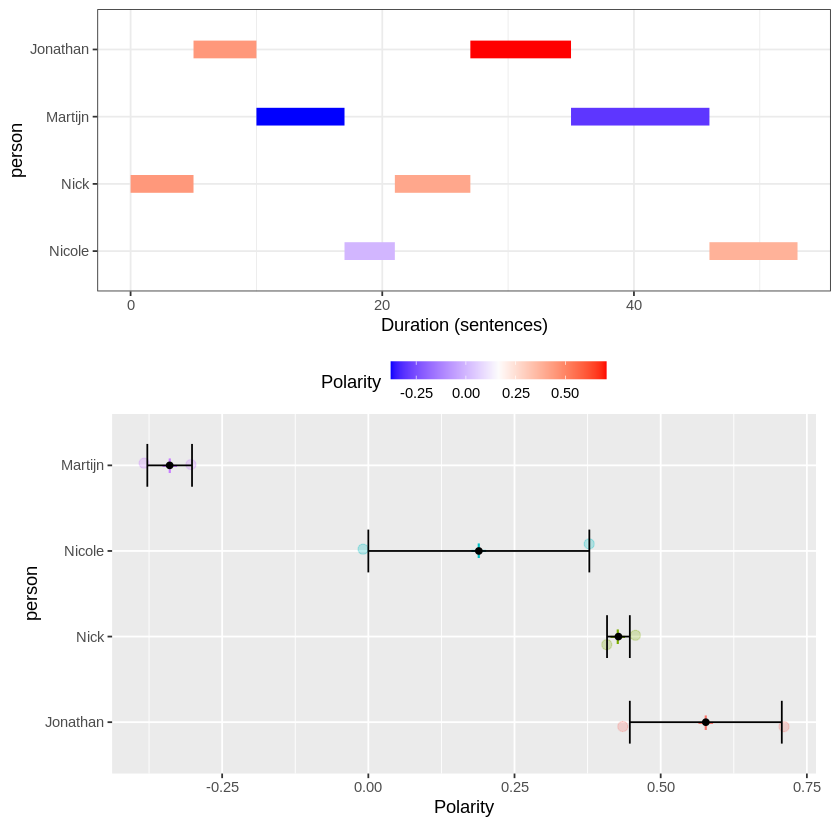

In [ ]:
# Plot the conversation polarity
plot(datacamp_conversation)

####**Remise à niveau TM (I)**

+ ***Dans le cours Text Mining: Bag of Words, vous avez appris qu'un corpus est un ensemble de textes et vous avez étudié certaines fonctions de prétraitement du texte. Pour récapituler, une façon de créer et de nettoyer un corpus consiste à utiliser les fonctions ci-dessous. Même s'il s'agit d'un cours différent, l'analyse des sentiments fait partie de l'exploration de texte, donc un rappel peut être utile.***

+ **Transformez un vecteur de caractères en source de texte à l'aide de VectorSource().**

+ **Transformez une source de texte en corpus à l'aide de VCorpus().**

+ **Supprimez les caractères indésirables du corpus à l'aide de fonctions de nettoyage telles que removePunctuation() et stripWhitespace() de tm, et replace_abbreviation() de qdap.**

+ *Dans cet exercice, une fonction personnalisée clean_corpus() a été créée à l'aide de fonctions de prétraitement standard pour une application plus facile.*

+ clean_corpus() accepte la sortie de VCorpus() et applique les fonctions de nettoyage. Par exemple:

      processed_corpus <- clean_corpus(my_corpus)

####**Instructions**
+ Votre session R a un vecteur de texte, tm_define, contenant deux petits documents et la fonction clean_corpus().

+ Créez un objet appelé tm_vector en appliquant VectorSource() à tm_define.
+ Créez tm_corpus en utilisant VCorpus() sur tm_vector.
+ Utilisez content() pour examiner le contenu du premier document dans tm_corpus.
+ Les documents du corpus sont accessibles à l'aide de la syntaxe de liste, utilisez donc des doubles crochets, par ex. [[1]].
+ Nettoyez le texte du corpus à l'aide de la fonction personnalisée clean_corpus() sur tm_corpus. Appelez ce nouvel objet tm_clean.
+ Examinez à nouveau le premier document du nouvel objet tm_clean pour voir comment le texte a changé après l'application de clean_corpus().

In [ ]:
# clean_corpus(), tm_define are pre-defined
clean_corpus=function(corpus){
  corpus <- tm_map(corpus, content_transformer(replace_abbreviation))
  corpus <- tm_map(corpus, removePunctuation)
  corpus <- tm_map(corpus, removeNumbers)
  corpus <- tm_map(corpus, removeWords, c(stopwords("en"), "coffee"))
  corpus <- tm_map(corpus, content_transformer(tolower))
  corpus <- tm_map(corpus, stripWhitespace)
  return(corpus)
}
tm_define=c("Text mining is the process of distilling actionable insights from text.","Sentiment analysis represents the set of tools to extract an author's feelings towards a subject.")

In [ ]:
# clean_corpus(), tm_define are pre-defined
#clean_corpus
#tm_define
library(tm)
# Create a VectorSource
tm_vector <- VectorSource(tm_define)

# Apply VCorpus
tm_corpus <- VCorpus(tm_vector)

# Examine the first document's contents
content(tm_corpus[[1]])

[1] "Text mining is the process of distilling actionable insights from text."

In [ ]:
# Clean the text
tm_clean <- clean_corpus(tm_corpus)

# Reexamine the contents of the first doc
content(tm_clean[[1]])

[1] "text mining process distilling actionable insights text"

***Se sentir frais! Si vous travaillez avec du texte, il est utile de savoir manipuler des corpus.***

####**Remise à niveau TM (II)**

+ Créons maintenant une matrice de termes de document (DTM). Dans un DTM :

  + Chaque ligne de la matrice représente un document.
  + Chaque colonne est un jeton de mot unique.
  + Les valeurs de la matrice correspondent à l'utilisation des mots d'un document individuel.
  + Le DTM est la base de nombreuses analyses de sac de mots. 
  
+ ***Plus tard dans le cours, vous utiliserez également la matrice de documents terminologiques (TDM) associée. C'est la transposition; c'est-à-dire que les colonnes représentent des documents et que les lignes représentent des jetons de mots uniques.***

+ Vous devez construire un DTM après avoir nettoyé le corpus (en utilisant clean_corpus()). Pour ce faire, appelez DocumentTermMatrix() sur l'objet corpus.

      tm_dtm <- DocumentTermMatrix(tm_clean)

+ **Si vous avez besoin d'un rappel plus approfondi, consultez le cours Text Mining with Bag-of-Words in R. J'espère que ces deux exercices vous ont suffisamment préparé pour vous lancer dans votre voyage d'analyse des sentiments !**

+ **Sachez qu'il s'agit de données réelles de Twitter et qu'il existe donc toujours un risque qu'elles contiennent des blasphèmes ou d'autres contenus offensants (dans cet exercice et dans tous les exercices suivants qui utilisent également de véritables données Twitter).**

####**Instructions**
+ Nous avons créé un objet VCorpus() appelé clean_text contenant 1000 tweets mentionnant le café. Les tweets ont été nettoyés avec les étapes de prétraitement mentionnées précédemment et votre objectif est de créer un DTM à partir de celui-ci.

+ Appliquez DocumentTermMatrix() au corpus clean_text pour créer un terme DTM pondéré en fréquence appelé tf_dtm .
+ Changez l'objet DocumentTermMatrix() en une matrice simple avec as.matrix(). Appelez le nouvel objet tf_dtm_m.
+ Vérifiez les dimensions de la matrice en utilisant dim().
+ Utilisez l'indexation entre crochets pour voir un sous-ensemble de la matrice.
+ Sélectionnez les lignes 16 à 20 et les colonnes 2975 à 2985
+ Notez la valeur de fréquence du mot « travail ».

In [ ]:
tweets <- read.csv("https://raw.githubusercontent.com/ThanhDatIU/datacamp/main/coffee.csv", stringsAsFactors = FALSE)
coffee_tweets <- tweets$text
coffee_source <- VectorSource(coffee_tweets)
coffee_corpus <- VCorpus(coffee_source)
clean_text=clean_corpus(coffee_corpus)

# clean_text is pre-defined
clean_text

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 1000

In [ ]:
# Create tf_dtm
tf_dtm <- DocumentTermMatrix(clean_text)

tf_dtm

<<DocumentTermMatrix (documents: 1000, terms: 3098)>>
Non-/sparse entries: 7772/3090228
Sparsity           : 100%
Maximal term length: 27
Weighting          : term frequency (tf)

In [ ]:
# Create tf_dtm_m
tf_dtm_m <- as.matrix(tf_dtm)

In [ ]:
# Dimensions of DTM matrix
dim(tf_dtm_m)

[1] 1000 3098

In [ ]:
# Subset part of tf_dtm_m for comparison
tf_dtm_m[16:20, 2975:2985]

,went,were,west,westin,westside,wet,wfriends,what,whatever,whatislifeee,whats
16,0,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,0


***Utilisation délicieuse d'un DocumentTermMatrix! Ces choses surgissent régulièrement dans le text mining.***

###**Combien de mots connaissez-VOUS? Loi de Zipf et lexique de subjectivité**

####**1. Combien de mots connaissez-VOUS? Loi de Zipf et lexique de subjectivité**

+ ***Boom! Un petit rappel, et une visualisation de polarité. Plutôt bon début. De nombreuses méthodes d’analyse des sentiments utilisent un lexique de subjectivité. Apprenons ce qu’est un lexique subjectif et pourquoi il fonctionne.***

####**2. Lexique subjectif**

+ **La fonction de polarité que vous venez d’appliquer utilise un lexique de subjectivité.** 

+ **Un lexique subjectif est une liste prédéfinie de mots associés à une émotion spécifique ou à des sentiments positifs ou négatifs**. 

+ **Par exemple, les mots mauvais, horrible et terrible peuvent tous raisonnablement être associés à un état négatif**. 

+ **En revanche, parfait ou idéal peut être lié à la positivité**. 

+ **Dans certains cas, l’analyse des sentiments est simplement la comparaison entre le texte de l’auteur et le lexique de subjectivité prédéfini.** 

+ **Le visuel que vous avez réalisé est basé sur un lexique subjectif comparé à un texte fictif**. 

+ **Nous y reviendrons plus tard. Pour l’instant, concentrez-vous sur le lexique de la subjectivité et pourquoi il fonctionne.**

####**3. Où trouver des lexiques de subjectivité ?**

+ **Dans ce cours, nous travaillons principalement avec la fonction polarity() de qdap qui utilise un lexique académique de l’Université de l’Illinois-Chicago**. 

+ **De plus, nous passons aussi beaucoup de temps à travailler avec le tibble de sentiments tidytext composé de 3 lexiques différents.**

####**4. Bibliothèque (lexique)**

+ **Il y a même un paquet R appelé lexique qui a un tas de subjectivité et d’autres listes de mots.** 

+ **Bien que nous utilisions les listes standard de qdap et tidytext, il vaut la peine d’explorer les nombreuses listes de mots de la bibliothèque de lexiques**. 

+ **De plus, vous devriez toujours penser à ajuster vos lexiques, car il est peu probable qu’ils soient précis pour vos besoins exacts.**

####**5. Pas question! Trop peu de mots.**

+ Alors maintenant, vous vous dites peut-être, les petites listes de mots ne vont pas m’aider avec mon texte parce que les gens sont si expressifs. 

+ En fait, vous connaissez peut-être plus de cinquante mille mots et la plupart des lexiques de subjectivité ne sont que quelques milliers... 

+ Comment la recherche de ces termes peut-elle fournir une analyse précise des sentiments ? 

+ **La réponse repose sur deux principes. Tout d’abord, un linguiste nommé George Zipf a créé la « loi de Zipf ». Deuxièmement, le principe du moindre effort aide également à soutenir l’utilisation de petits lexiques**.

####**6. La loi de Zipf en action**

+ **La loi de Zipf stipule qu’avec un certain texte, la fréquence d’un seul mot est inversement proportionnelle à son rang dans la table des fréquences**. 

+ **Plus simplement, si vous comptiez la fréquence des mots dans un passage, le deuxième mot apparaîtrait environ la moitié moins, cinquante pour cent, que le premier**. 

+ Un sur la place du mot sur la liste ou un sur deux. 

+ **De même, le troisième mot le plus fréquent pourrait apparaître un tiers autant que le premier et ainsi de suite. Un sur trois parce que c’est le troisième terme de la liste.** 

+ **La loi de Zipf peut également être observée en dehors du langage. Voici un tableau des populations des villes américaines. La loi de Zipf peut être observée dans notre langue, dans la façon dont nous colonisons les villes et parfois même dans les parts de marché de l’industrie.**

####**7. Principe du moindre effort**

+ L’autre principe en jeu ici est appelé « principe du moindre effort » de la bibliothéconomie. 

+ Un orateur ou un écrivain ne veut pas faire beaucoup d’efforts pour communiquer alors que le public ne veut pas dépenser beaucoup d’énergie à interpréter. 

+ Ainsi, le choix des mots ou la diversité lexicale devient limité. 

+ Qu’est-ce que tout cela signifie? Les gens sont paresseux... du moins quand il s’agit de s’exprimer. 

+ Ils peuvent connaître des dizaines de milliers de mots, mais n’en utilisent que quelques-uns pour exprimer le sens. 

+ Cela fonctionne bien pour un lexique subjectif, car cela signifie que les listes de mots n’ont pas besoin d’être aussi longues.

####**8. À suivre...**
+ **Dans cette section, vous allez créer un visuel démontrant la loi de Zipf sur trois millions de tweets, puis appliquer la fonction polarity() de qdap à un texte réel pour voir un lexique de subjectivité en action.**

####**9. Entraînons-nous!**

###**EXERCICES**

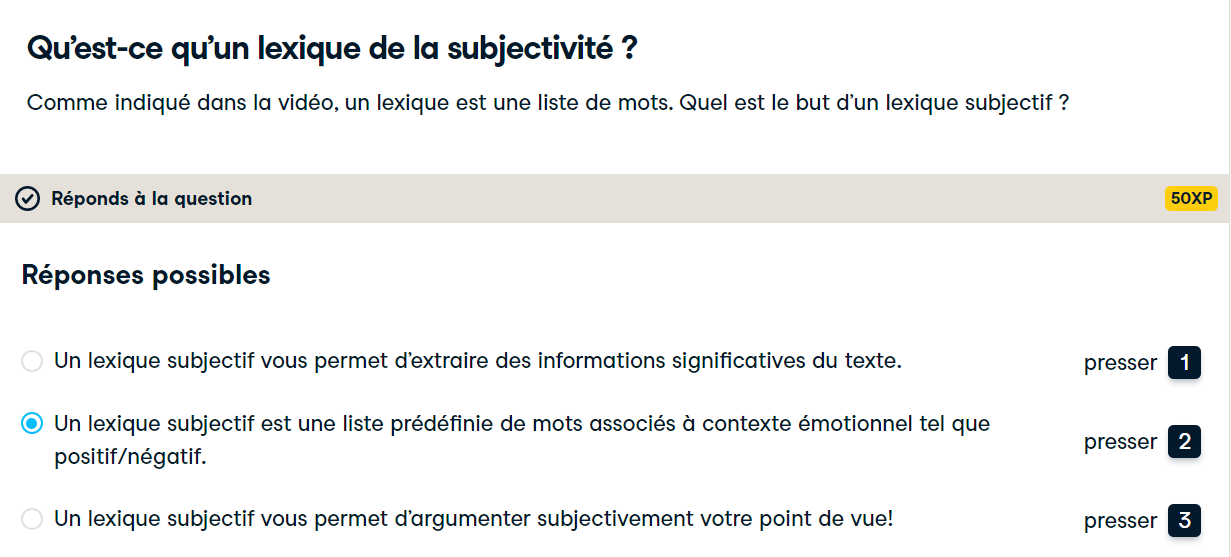

***Tout à fait exact! Le sens d’un texte peut dépendre de qui l’a écrit.***

####**Où peut-on observer la loi de Zipf ?**

+ *Bien que Zipf ait observé une baisse abrupte et prévisible de l'utilisation des mots, vous ne pouvez pas accepter la loi de Zipf. Vous pensez peut-être "Je connais beaucoup de mots et j'ai un vocabulaire distinctif". C'est peut-être le cas, mais on ne peut pas en dire autant de la plupart des gens ! Pour le prouver, construisons un visuel à partir de 3 millions de tweets mentionnant "#sb". Gardez à l'esprit que le visuel ne suit pas parfaitement la loi de Zipf, les tweets mentionnent tous le même hashtag donc c'est un peu biaisé. Cela dit, le visuel que vous réaliserez suit une forte baisse montrant une petite diversité lexicale parmi les millions de tweets. Il y a donc une part de science derrière l'utilisation de lexiques pour l'analyse du langage naturel !*

+ ***Dans cet exercice, vous utiliserez le package metricsgraphics. Bien que l'auteur suggère d'utiliser l'opérateur pipe %>%, vous allez construire le graphique étape par étape pour en savoir plus sur les différents aspects du tracé. La fonction principale du package metricsgraphics est la fonction mjs_plot() qui est la première étape de la création d'un tracé JavaScript. Une fois que vous avez cela, vous pouvez ajouter d'autres couches au-dessus de l'intrigue.***

+ *Un exemple de flux de travail metricsgraphics sans utiliser l'opérateur %>% est ci-dessous* :

      metro_plot <- mjs_plot(data, x = x_axis_name, y = y_axis_name, show_rollover_text = FALSE)
      metro_plot <- mjs_line(metro_plot)
      metro_plot <- mjs_add_line(metro_plot, line_one_values)
      metro_plot <- mjs_add_legend(metro_plot, legend = c('names', 'more_names'))
      metro_plot


####**Instructions**

+ Utilisez head() sur sb_words pour passer en revue les principaux mots.

+ Créez une nouvelle colonne attentes en divisant la plus grande fréquence de mots, freq[1], par la colonne de classement.

+ Démarrez sb_plot en utilisant mjs_plot().

+ Passez sb_mots avec x = rang et y = fréq.

+ Dans mjs_plot(), définissez show_rollover_text sur FALSE.

+ Remplacez sb_plot en utilisant mjs_line() et transmettez sb_plot.

+ Ajouter à sb_plot avec mjs_add_line().

+ Passez l'objet sb_plot précédent et le vecteur, attentes.

+ Placez une légende sur un nouvel objet sb_plot en utilisant mjs_add_legend().

+ Passer l'objet sb_plot précédent

+ Les étiquettes de légende doivent être composées de "Fréquence" et "Attente".

+ Appelez sb_plot pour afficher le tracé. Passez la souris sur un point pour mettre en surbrillance simultanément une fréquence et un point d'attente. La magie de JavaScript !

In [ ]:
sb_words=read.csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSr1GbdxxFhoZcAqH_pkr-E61NMiKnffJdAPlbfLv5FrfJkTgOeDq8KCv1-WolHMf0N0K-5nUcMH3Ta/pub?gid=842100586&single=true&output=csv")

# Examine sb_words
head(sb_words)

,word,freq,rank
,<chr>,<int>,<int>
1,sb,1984423,1
2,rt,1700564,2
3,the,1101899,3
4,to,588803,4
5,a,428598,5
6,for,388390,6


In [ ]:
# Create expectations
sb_words$expectations <- sb_words %$% 
  {freq[1] / rank}

In [ ]:
print(sb_words$expectations)

  [1] 1984423.00  992211.50  661474.33  496105.75  396884.60  330737.17
  [7]  283489.00  248052.88  220491.44  198442.30  180402.09  165368.58
 [13]  152647.92  141744.50  132294.87  124026.44  116730.76  110245.72
 [19]  104443.32   99221.15   94496.33   90201.05   86279.26   82684.29
 [25]   79376.92   76323.96   73497.15   70872.25   68428.38   66147.43
 [31]   64013.65   62013.22   60134.03   58365.38   56697.80   55122.86
 [37]   53633.05   52221.66   50882.64   49610.57   48400.56   47248.17
 [43]   46149.37   45100.52   44098.29   43139.63   42221.77   41342.15
 [49]   40498.43   39688.46   38910.25   38161.98   37441.94   36748.57
 [55]   36080.42   35436.12   34814.44   34214.19   33634.29   33073.72
 [61]   32531.52   32006.82   31498.78   31006.61   30529.58   30067.02
 [67]   29618.25   29182.69   28759.75   28348.90   27949.62   27561.43
 [73]   27183.88   26816.53   26458.97   26110.83   25771.73   25441.32
 [79]   25119.28   24805.29   24499.05   24200.28   23908.71   2

In [ ]:
show_plot <- function(plot_object, title) {
  div(style="margin:auto;text-align:center", strong(title), br(), plot_object)
}

In [ ]:
# Create metrics plot
sb_plot <- mjs_plot(sb_words, x = rank, y = freq, show_rollover_text = FALSE)

# Add 1st line
sb_plot <- mjs_line(sb_plot)

# Add 2nd line
sb_plot <- mjs_add_line(sb_plot, expectations)

# Add legend
sb_plot <- mjs_add_legend(sb_plot, legend = c("Frequency", "Expectation"))

# Display plot
sb_plot

***Bon travail! Bien que vous n'obéissiez peut-être pas à la loi de Zipf, il semble que la plupart des utilisateurs de Twitter le fassent !***

####**Polarité sur le texte réel**

+ **Jusqu'à présent, vous avez appris les éléments de base nécessaires pour évaluer une intention positive ou négative dans un texte. Souvenez-vous des points suivants afin d'avoir confiance dans vos résultats.**

+ **Le lexique de la subjectivité est une liste prédéfinie de mots associés à des émotions ou à des sentiments positifs/négatifs.**

+ **Vous n'êtes pas obligé d'énumérer chaque mot dans un lexique de subjectivité car la loi de Zipf décrit l'expression humaine.
Un moyen rapide de commencer est d'utiliser la fonction polarity() qui a un lexique de subjectivité intégré.**

+ ***La fonction analyse le texte pour identifier les mots dans le lexique. Il crée alors un cluster autour d'un mot subjectif identifié. Au sein du cluster, les décaleurs de valence ajustent le score. Les décalages de valence sont des mots qui amplifient ou nient l'intention émotionnelle du mot subjectivité. Par exemple, "bien connu" est positif tandis que "pas bien connu" est négatif. Ici, "non" est un terme négatif et renverse l'intention émotionnelle de "bien connu". En revanche, "très bien connu" utilise un amplificateur augmentant l'intention positive.***

+ *La fonction polarity() calcule ensuite un score en utilisant des termes de subjectivité, des décalages de valence et le nombre total de mots dans le passage. Cet exercice illustre un simple calcul de polarité. Dans la vidéo suivante, nous regardons sous le capot de polarity() pour plus de détails.*

####**Instructions**
+ 1) 
  + Calculez la polarité() du positif dans un nouvel objet appelé pos_score. 
  + Mettez l'intégralité de l'appel entre parenthèses pour que la sortie soit également imprimée.


+ 2) 

  + Effectuez manuellement le même calcul de polarité.

  + Obtenez un objet de comptage de mots en appelant counts() sur l'objet polarity.

  + Tous les mots de subjectivité identifiés font partie de la liste des objets de comptage. Plus précisément, les mots positifs se trouvent dans le vecteur d'éléments $pos.words. 
  
  + Trouvez le nombre de mots positifs dans n_good en appelant length() sur la première partie de l'élément $pos.words.

  + Saisissez le nombre total de mots et attribuez-le à n_mots. Cette valeur est stockée dans pos_count en tant qu'élément wc.

  + Déconstruisez le calcul de polarity() en divisant n_good par sqrt() de n_words. Comparez le résultat de pos_pol au résultat de l'équation.

In [ ]:
# Example statement
positive <- "DataCamp courses are good for learning"

# Calculate polarity of statement
(pos_score <- polarity(positive))

all,wc,polarity,pos.words,neg.words,text.var
<chr>,<int>,<dbl>,<list>,<list>,<chr>
all,6,0.4082483,good,-,DataCamp courses are good for learning
all,total.sentences,total.words,ave.polarity,sd.polarity,stan.mean.polarity
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
all,1,6,0.4082483,NA,NA


In [ ]:
# Get counts
(pos_counts <- counts(pos_score))

,all,wc,polarity,pos.words,neg.words,text.var
,<chr>,<int>,<dbl>,<list>,<list>,<chr>
1,all,6,0.4082483,good,-,DataCamp courses are good for learning


In [ ]:
# Number of positive words
n_good <- length(pos_counts$pos.words[[1]])
  
n_good

[1] 1

In [ ]:
# Total number of words
n_words <- pos_counts$wc
  
n_words

[1] 6

In [ ]:
# Verify polarity score
n_good / sqrt(n_words)

[1] 0.4082483

***Bien joué! L'utilisation de la fonction polarity() est beaucoup plus simple et donne toujours la même réponse !***

###**Explorez la polarité et le lexique intégré de qdap**

####**1. Explorez la polarité et le lexique intégré de qdap**

+ **Dans ce chapitre, vous avez appliqué la fonction polarité() de qdap à plusieurs reprises pour obtenir une évaluation rapide positive ou négative. Il s’avère que cette fonction est plus complexe que vous ne le pensez.**

####**2. polarité()**

+ ***Tout d’abord, il y a un lexique de subjectivité intégré. Ce lexique standard provient de deux chercheurs de l’Université de l’Illinois à Chicago. Il contient près de 7000 mots marqués comme positifs ou négatifs.*** 

+ Dans ce chapitre, vous apprendrez à modifier le lexique, mais examinons d’abord comment cela fonctionne sans ajouter de mots.

####**3. Groupe de contexte**

+ **Lorsque vous appliquez la fonction polarity() au texte, la fonction identifie les mots du lexique de la subjectivité.** 

+ **Une fois que les mots polarisés sont « étiquetés », la fonction crée un groupe de contexte autour du terme.**

+ **Dans cet exemple, le lexique contient « bon » et il se trouve dans le texte. Par défaut, un groupe de contextes inclut les quatre mots avant et les deux mots après le mot identifié. Ainsi, la suppression des mots vides aura un impact sur les scores de polarité car elle affecte les mots du cluster.**

####**4. Groupe de contexte, suite**
+ Ensuite, chacun des mots individuels est classé comme polarisé, neutre, négateur, amplificateur ou désamplificateur. 

+ Les mots identifiés dans le lexique sont les mots polarisés. 


+ Dans ce cas, « bon ». Un mot neutre n’a aucun impact sur la polarité du groupe de contexte, mais affecte le nombre de mots, ce qui est important plus tard. Dans ce groupe, il y avait sept termes neutres comme « apprentissage » et mots vides. 

+ **Les amplificateurs et les désamplificateurs sont considérés comme des décalages de valence**. 

+ **Les décalages de valence ajoutent ou soustraient à l’intention de l’auteur**. 

+ Un exemple d’amplificateur est « très » comme dans « La voix de Ted est très agréable ». 

+ **L’amplificateur affecte positivement la gentillesse de ma voix**. 

+ **Enfin, un négateur change la polarité de l’amas comme dans « La voix de Ted n’est PAS très agréable »**. 

+ **Le très amplifié et la positivité de nice sont maintenant complètement commutés pour ne pas être gentil du tout!**

####**5. Glossaire des groupes de contextes**

+ En guise d’examen rapide, voici les termes que nous avons couverts. 

+ Une fois que la polarité a créé un groupe de contexte, elle classe les termes dans chacun de ces types, polarisés, neutres, négateurs et décaleurs de valence.

####**6. Notation du groupe contextuel**

+ **Comme vous pouvez vous y attendre, un mot positif a une valeur de 1. Un terme négatif a une valeur de -1. Ce cluster de contexte n’a pas de négation, nous n’avons donc pas besoin de changer de valeurs. Dans la fonction de polarité, un amplificateur, comme « très », est évalué au point huit tandis que les désamplificateurs reçoivent un point huit négatif.**

####**7. Calcul de polarité**

+ À la fin, toutes les valeurs de polarité sont additionnées. 

+ Gardez à l’esprit que nous n’avons pas supprimé les mots vides, donc le passage entier a 9 termes. 

+ Le mot « bon » compte pour un. Un amplificateur « très » ajoute un autre point huit. 

+ Ainsi, la polarité totale est d’un point huit avec un nombre total de mots de neuf. 

+ Ensuite, un point huit est divisé par la racine carrée de neuf. Ainsi, un point huit divisé par 3 de sorte que le score de polarité est de 0 point-6. 

+ La division par la racine carrée du nombre total de mots explique la densité des termes de polarité. 

+ L’idée étant que les mots polarisés densément emballés, les négateurs et les changeurs de valence engendrent des sentiments de polarité plus forts. 

+ Maintenant que vous savez comment fonctionne la fonction polarity(), vous allez clore ce chapitre en l’appliquant et en ajustant le lexique de subjectivité pour l’adapter à votre texte particulier.

+  Ceci est important pour l’analyse de polarité. 

+ Par exemple, dans la sphère Twitter, l’utilisation de termes tels que « lol » pour rire à haute voix devrait être ajoutée comme mots positifs dans le lexique. 

+ Sans ces termes spécifiques au canal, votre analyse risque de passer complètement à côté de groupes de contextes importants. 

+ **N’oubliez pas que les chapitres suivants présenteront le package tidytext, les visuels, puis une application pratique de l’analyse des sentiments à l’aide d’avis de location de propriétés. Hâte!**

####**8. Entraînons-nous!**

###**EXERCICES**

####**Joyeuses chansons !**

+ ***Bien sûr, les mots positifs et négatifs ne suffisent pas. Dans cet exercice, vous découvrirez les décaleurs de valence qui vous renseignent sur l'intention émotionnelle de l'auteur. Auparavant, vous appliquiez polarity() au texte sans décalage de valence. Dans cet exemple, vous verrez des mots d'amplification et de négation en action.***

+ **Rappelez-vous qu'un mot amplificateur ajoute 0,8 à un mot positif dans polarity() donc le score positif devient 1,8. Pour les mots négatifs, 0,8 est soustrait de sorte que le total devient -1,8. Ensuite, le score est divisé par la racine carrée du nombre total de mots.**

+ Considérez l'exemple suivant de Frank Sinatra :

      "C'était une très bonne année"
      "Bon" est égal à 1 et "très" ajoute un autre 0,8. 
      Ainsi, 1,8/sqrt(6) donne une polarité de 0,73.

+ Un mot négatif tel que "non" inversera le score de subjectivité. Considérez l'exemple suivant de Bobby McFerrin :

      "Ne t'inquiète pas sois heureux"
      "l'inquiétude est maintenant 1 en raison de la négation "ne pas". 
      L'ajout du "heureux", +1, est égal à 2. Avec 4 mots au total, 2 / sqrt (4) équivaut à un score de polarité de 1.

####**Instructions**

+ Examinez la trame de données de conversation, conversation. Notez les décalages de valence comme "jamais" dans la colonne de texte.

+ Appliquez polarity() à la colonne de texte de la conversation pour calculer la polarité de toute la conversation.

+ Calculez les scores de polarité par étudiant, en attribuant le résultat à student_pol.


+ Appelez polarity() à nouveau, cette fois en passant deux colonnes de conversation.


+ La variable de texte est text et la variable de regroupement est student.


+ Pour voir les résultats au niveau des étudiants, utilisez scores() sur student_pol.


+ La fonction counts () appliquée à student_pol imprimera la polarité au niveau de la phrase pour l'ensemble de la trame de données avec les mots du lexique identifiés.


+ L'objet de polarité, student_pol, peut être tracé avec plot().



In [ ]:
library(tidyverse)
conversation=tribble(~student,~text,
"Martijn","This restaurant is never bad",
"Nick","The lunch was very good",
"Nicole","It was awful I got food poisoning and was extremely ill")
# Examine conversation
conversation

student,text
<chr>,<chr>
Martijn,This restaurant is never bad
Nick,The lunch was very good
Nicole,It was awful I got food poisoning and was extremely ill


In [ ]:
# Polarity - All
polarity(conversation$text)

all,wc,polarity,pos.words,neg.words,text.var
<chr>,<int>,<dbl>,<list>,<list>,<chr>
all,5,0.4472136,-,bad,This restaurant is never bad
all,5,0.8049845,good,-,The lunch was very good
all,11,-0.3015113,-,awful,It was awful I got food poisoning and was extremely ill
all,total.sentences,total.words,ave.polarity,sd.polarity,stan.mean.polarity
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
all,3,21,0.3168956,0.5646418,0.561233


In [ ]:
# Polarity - Grouped
student_pol <- conversation %$%
  polarity(text, student)

In [ ]:
# Student results
scores(student_pol)

,student,total.sentences,total.words,ave.polarity,sd.polarity,stan.mean.polarity
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,Martijn,1,5,0.4472136,NA,NA
2,Nick,1,5,0.8049845,NA,NA
3,Nicole,1,11,-0.3015113,NA,NA


In [ ]:
# Sentence by sentence
counts(student_pol)

,student,wc,polarity,pos.words,neg.words,text.var
,<chr>,<int>,<dbl>,<list>,<list>,<chr>
1,Martijn,5,0.4472136,-,bad,This restaurant is never bad
2,Nick,5,0.8049845,good,-,The lunch was very good
3,Nicole,11,-0.3015113,-,awful,It was awful I got food poisoning and was extremely ill


Warning message in geom_errorbarh(data = dat, height = error.bar.height, size = error.bar.size, :
“Ignoring unknown aesthetics: x”
Warning message:
“Removed 3 rows containing missing values (`geom_errorbarh()`).”


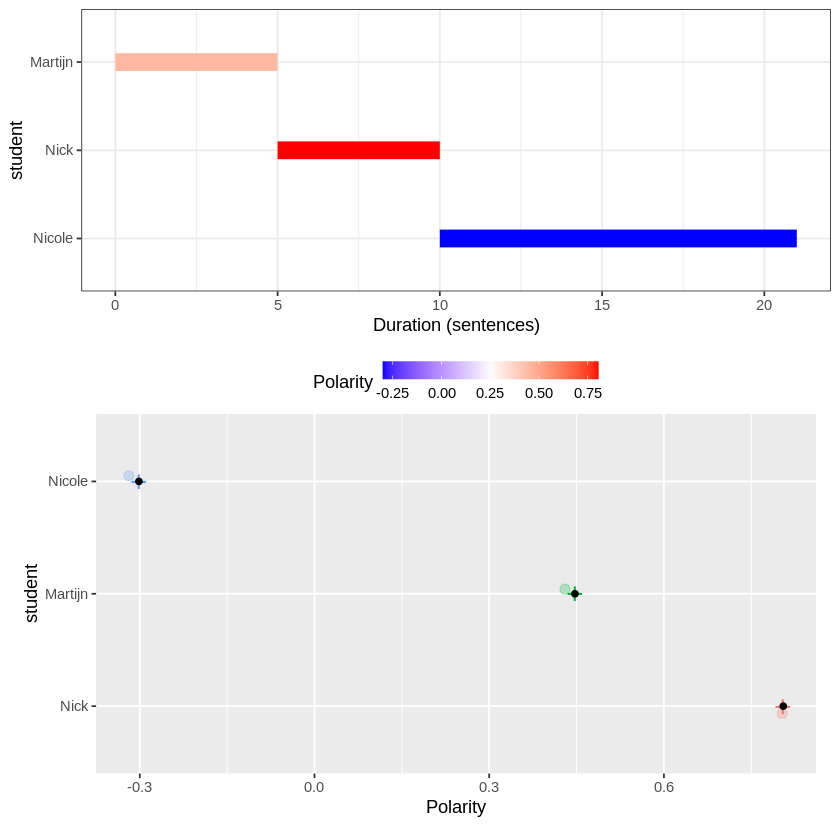

In [ ]:
# qdap plot
plot(student_pol)

***C'était un très bon morceau de code que vous venez d'écrire! « Extrêmement bon » est plus positif que « Très bon », qui est plus positif que « Bon », qui est plus positif que « Assez bon ».***

####**LOL, cette chanson est super bonne**

+ ***Même avec la loi de Zipf en action, vous devrez toujours ajuster les lexiques en fonction de la source du texte (par exemple, Twitter par rapport aux documents juridiques) ou des données démographiques de l'auteur (adolescent par rapport aux personnes âgées). Cet exercice montre les composants explicites de polarity() afin que vous puissiez le modifier si nécessaire.***

+ **Dans la chanson "Lol :)" de Trey Songz, il y a une parole "LOL smiley face, LOL smiley face". Dans la fonction basic polarity(), "LOL" n'est pas défini comme positif. Cependant, "LOL" signifie "Laugh Out Loud" et devrait être positif. Par conséquent, vous devez ajuster le lexique pour l'adapter au contexte du texte, qui inclut l'argot de la culture pop. Si votre analyse contient du texte provenant d'un canal spécifique ("LOL" de Twitter), d'un lieu ("Wicked Good" de Boston) ou d'un groupe d'âge ("malade" des adolescents), vous devrez probablement ajuster le lexique.**

+ *Dans cet exercice, vous n'ajustez pas le lexique de subjectivité ou les dictionnaires qdap contenant des décalages de valence. Au lieu de cela, vous examinez les objets de bloc de données de mots existants afin de pouvoir les modifier dans l'exercice suivant.*

+ *Nous avons créé un texte contenant deux extraits des paroles de "Crazy in Love" de Beyoncé pour l'exercice.*

####**Instructions**
+ 1) 
  + Imprimez key.pol pour voir une partie des mots et des valeurs de subjectivité.
  + Examinez les mots de négation prédéfinis pour imprimer tous les termes de négation.
  + Imprimez maintenant les amplification.words pour voir les mots qui ajoutent des valeurs au lexique.
  + Cochez deamplification.words pour imprimer les mots qui réduisent les valeurs du lexique.
  + Appelez le texte pour voir la conversation.

+ 2)
  + Calculez la polarity() comme suit.
  
  + Définissez text.var sur text$words.

  + Définissez grouping.var sur text$speaker.

  + Définissez polarity.frame sur key.pol.
  + Définissez les négateurs sur negation.words.
  + Réglez les amplificateurs sur amplification.words.
  + Définissez les désamplificateurs sur deamplification.words.

In [ ]:
# Examine the key.pol
key.pol

In [ ]:
# Negators
print(negation.words)

 [1] "ain't"     "aren't"    "can't"     "couldn't"  "didn't"    "doesn't"  
 [7] "don't"     "hasn't"    "isn't"     "mightn't"  "mustn't"   "neither"  
[13] "never"     "no"        "nobody"    "nor"       "not"       "shan't"   
[19] "shouldn't" "wasn't"    "weren't"   "won't"     "wouldn't" 


In [ ]:
# Amplifiers
print(amplification.words)

 [1] "acute"         "acutely"       "certain"       "certainly"    
 [5] "colossal"      "colossally"    "deep"          "deeply"       
 [9] "definite"      "definitely"    "enormous"      "enormously"   
[13] "extreme"       "extremely"     "great"         "greatly"      
[17] "heavily"       "heavy"         "high"          "highly"       
[21] "huge"          "hugely"        "immense"       "immensely"    
[25] "incalculable"  "incalculably"  "massive"       "massively"    
[29] "more"          "particular"    "particularly"  "purpose"      
[33] "purposely"     "quite"         "real"          "really"       
[37] "serious"       "seriously"     "severe"        "severely"     
[41] "significant"   "significantly" "sure"          "surely"       
[45] "true"          "truly"         "vast"          "vastly"       
[49] "very"         


In [ ]:
# De-amplifiers
print(deamplification.words)

 [1] "barely"       "faintly"      "few"          "hardly"       "little"      
 [6] "only"         "rarely"       "seldom"       "slightly"     "sparsely"    
[11] "sporadically" "very few"     "very little" 


In [ ]:
text=tribble(~speaker,~words,"beyonce","I know I dont understand Just how your love can do what no one else can","jay_z","They cant figure him out they like hey, is he insane")

In [ ]:
# Examine
text

speaker,words
<chr>,<chr>
beyonce,I know I dont understand Just how your love can do what no one else can
jay_z,"They cant figure him out they like hey, is he insane"


In [ ]:
# Complete the polarity parameters
polarity(
  text.var       = text$words,
  grouping.var   = text$speaker,
  polarity.frame = key.pol,
  negators       = negation.words,
  amplifiers     = amplification.words,
  deamplifiers   = deamplification.words 
)

speaker,wc,polarity,pos.words,neg.words,text.var
<chr>,<int>,<dbl>,<list>,<list>,<chr>
beyonce,16,0.25,love,-,I know I dont understand Just how your love can do what no one else can
jay_z,11,0.00,like,insane,"They cant figure him out they like hey, is he insane"
speaker,total.sentences,total.words,ave.polarity,sd.polarity,stan.mean.polarity
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
beyonce,1,16,0.25,NA,NA
jay_z,1,11,0.00,NA,NA


***Polarisant puissant ! La fonction polarity() est très flexible et vous permet de remplacer le score attribué à chaque mot.***

####**Stressé!**

+ **Ici, vous ajusterez les mots négatifs pour tenir compte du texte spécifique. Vous comparerez ensuite les scores de polarité () de base et personnalisés.**

+ **Une chanson populaire de Twenty One Pilots s'appelle "Stressed Out". Si vous scannez les paroles de la chanson, vous remarquerez que la chanson parle de nostalgie juvénile. Dans l'ensemble, la plupart des gens diraient que la polarité est négative. À plusieurs reprises, les paroles mentionnent le stress, les peurs et les faux-semblants.**

+ Comparons les paroles des chansons en utilisant le lexique de subjectivité par défaut et également un lexique personnalisé.

+ *Pour commencer, vous devez vérifier que le lexique de subjectivité key.pol ne contient pas déjà le terme que vous souhaitez ajouter. Une façon de vérifier est avec grep(). La fonction grep() renvoie la ligne contenant les caractères correspondant à un modèle de recherche. Voici un exemple utilisé lors de l'indexation.*

      data_frame[grep("search_pattern", data_frame$column), ]


+ ***Après avoir vérifié que l'argot ou le nouveau mot n'est pas déjà dans le lexique key.pol, vous devez l'ajouter. Le code ci-dessous utilise sentiment_frame() pour construire le nouveau lexique. Dans le code, sentiment_frame() accepte le vecteur de mot positif d'origine, positive.words. Ensuite, les mots négatifs originaux sont concaténés en "smh" et "kappa", tous deux considérés comme de l'argot négatif. Bien que vous puissiez déclarer les poids positifs et négatifs, la valeur par défaut est 1 et -1, ils ne sont donc pas inclus ci-dessous.***

      custom_pol <- sentiment_frame(positive.words, c(negative.words, "hate", "pain"))

+ *Vous êtes maintenant prêt à appliquer la polarité et elle référencera le lexique de subjectivité personnalisé !*

####**Instructions**

+ Nous avons créé stress_out qui contient les paroles de la chanson « Stressed Out », de Twenty One Pilots.

+ Utilisez polarity() sur stress_out pour voir le score par défaut.

+ Vérifiez key.pol pour tous les mots contenant "stress". 

+ Utilisez grep() pour indexer le bloc de données en recherchant dans la colonne $x$.

+ Créez custom_pol en tant que nouveau cadre de données de sentiment.

+ Appelez sentiment_frame() et passez positive.words comme premier argument sans concaténer de nouveaux termes.

+ Ensuite, utilisez c() pour combiner negative.words avec les nouveaux termes "stressed" et "turn back".

+ Réappliquez polarity() à stress_out avec le paramètre supplémentaire polarity.frame = custom_pol pour comparer la manière dont les nouveaux mots modifient la partition en une représentation plus précise de la chanson.

In [ ]:
stressed_out="I wish I found some better sounds no ones ever heard\nI wish I had a better voice that sang some better words\nI wish I found some chords in an order that is new\nI wish I didnt have to rhyme every time I sang\nI was told when I get older all my fears would shrink\nBut now Im insecure and I care what people think\nMy names Blurryface and I care what you think\nMy names Blurryface and I care what you think\nWish we could turn back time, to the good old days\nWhen our momma sang us to sleep but now were stressed out\nWish we could turn back time to the good old days\nWhen our momma sang us to sleep but now were stressed out\nWere stressed out\nSometimes a certain smell will take me back to when I was young\nHow come Im never able to identify where its coming from\nId make a candle out of it if I ever found it\nTry to sell it never sell out of it Id probably only sell one\nItd be to my brother, cause we have the same nose\nSame clothes homegrown a stones throw from a creek we used to roam\nBut it would remind us of when nothing really mattered\nOut of student loans and tree-house homes we all would take the latter\nMy names Blurryface and I care what you think\nMy names Blurryface and I care what you think\nWish we could turn back time, to the good old days\nWhen our momma sang us to sleep but now were stressed out\nWish we could turn back time, to the good old days\nWhen our momma sang us to sleep but now were stressed out\nWe used to play pretend, give each other different names\nWe would build a rocket ship and then wed fly it far away\nUsed to dream of outer space but now theyre laughing at our face #\nSaying, Wake up you need to make money\nYeah\nWe used to play pretend give each other different names\nWe would build a rocket ship and then wed fly it far away\nUsed to dream of outer space but now theyre laughing at our face\nSaying, Wake up, you need to make money\nYeah\nWish we could turn back time, to the good old days\nWhen our momma sang us to sleep but now were stressed out\nWish we could turn back time, to the good old days\nWhen our momma sang us to sleep but now were stressed out\nUsed to play pretend, used to play pretend bunny\nWe used to play pretend wake up, you need the money\nUsed to play pretend used to play pretend bunny\nWe used to play pretend, wake up, you need the money\nWe used to play pretend give each other different names\nWe would build a rocket ship and then wed fly it far away\nUsed to dream of outer space but now theyre laughing at our face\nSaying, Wake up, you need to make money\nYeah"

In [ ]:
# stressed_out has been pre-defined
print(stressed_out)

[1] "I wish I found some better sounds no ones ever heard\nI wish I had a better voice that sang some better words\nI wish I found some chords in an order that is new\nI wish I didnt have to rhyme every time I sang\nI was told when I get older all my fears would shrink\nBut now Im insecure and I care what people think\nMy names Blurryface and I care what you think\nMy names Blurryface and I care what you think\nWish we could turn back time, to the good old days\nWhen our momma sang us to sleep but now were stressed out\nWish we could turn back time to the good old days\nWhen our momma sang us to sleep but now were stressed out\nWere stressed out\nSometimes a certain smell will take me back to when I was young\nHow come Im never able to identify where its coming from\nId make a candle out of it if I ever found it\nTry to sell it never sell out of it Id probably only sell one\nItd be to my brother, cause we have the same nose\nSame clothes homegrown a stones throw from a creek we used to

In [ ]:
# Basic lexicon score
print(polarity(stressed_out))

  all total.sentences total.words ave.polarity sd.polarity stan.mean.polarity
1 all               1         518       -0.255          NA                 NA


In [ ]:
# Check the subjectivity lexicon
key.pol[grep("stress", x)]

x,y
<chr>,<dbl>
distress,-1
distressed,-1
distressing,-1
distressingly,-1
mistress,-1
stress,-1
stresses,-1
stressful,-1
stressfully,-1


In [ ]:
# New lexicon
custom_pol <- sentiment_frame(positive.words, c(negative.words, "stressed", "turn back"))

# Compare new score
print(polarity(stressed_out, polarity.frame = custom_pol))

  all total.sentences total.words ave.polarity sd.polarity stan.mean.polarity
1 all               1         518       -0.826          NA                 NA


***Bon travail! Il est important de prendre en compte les caractéristiques spécifiques du texte que vous analysez afin de vous assurer que vos résultats sont exacts.***

###**La roue de l’émotion de Plutchik, polarité vs sentiment**

####**1. La roue de l’émotion de Plutchik, polarité vs sentiment**

+ **Bienvenue! À ce stade, vous avez une bonne maîtrise de la polarité. Rappelez-vous, la polarité est les aspects positifs ou négatifs du texte. Cependant, les émotions humaines sont plus diverses. Par exemple, si vous êtes heurté par un bus, vous êtes probablement surpris de manière négative et si vous gagnez à la loterie, vous êtes probablement surpris de manière positive.**

####**2. En réalité, le sentiment est plus complexe que +/-**

+ **En réalité, le sentiment est plus complexe que simplement positif ou négatif. En fait, considérez le nombre d’emoji sur votre smartphone. Beaucoup d’entre eux se consacrent à exprimer des émotions sous une forme ou une autre... même le caca heureux. Il existe de multiples cadres émotionnels issus de nombreuses disciplines telles que la linguistique, la sociologie et la psychologie.**

####**3. La roue de l’émotion de Plutchik**

+ **Un cadre populaire s’appelle la roue de l’émotion de Plutchik. Ce cadre utilise une visualisation composée de huit émotions principales, notamment la joie, la confiance, la peur, la surprise, la tristesse, le dégoût, la colère et l’anticipation**. 

+ **Selon Plutchik, ces émotions primaires ont été apprises tout au long de l’évolution. Dans son esprit, toutes les autres émotions sont dérivées des huit de base apprises au cours des millénaires.** 

+ Par exemple, le remords est un mélange de dégoût et de tristesse. 

+ Dans la roue elle-même, chaque émotion a un opposé en face d’elle et des émotions similaires sont adjacentes. 

+ De plus, l’intensité des émotions augmente lorsque vous vous déplacez vers le centre de la roue et diminue également lorsque vous vous déplacez vers l’extérieur. 

+ Le remords est donc en fait une forme très diminuée de dégoût et de tristesse. 

+ De même, l’extase est une forme aiguë de joie. Bien sûr, ce n’est qu’un cadre et, par coïncidence, relativement simple.

####**4. Un cadre émotionnel plus complexe**

+ Voici un autre cadre de Kanjoya, une société spécialisée dans l’analyse des sentiments. 

+ Vous pouvez voir le nombre d’émotions et leurs relations sont beaucoup plus diversifiées. 

+ Ils ont recueilli ces données à partir de l’experienceproject-dot-com. 

+ En suivant les histoires de leurs utilisateurs et leur déclaration émotionnelle explicite lors de l’écriture, Kanjoya a observé le parcours des gens de déprimés à calmes, à fatigués, puis heureux au fil du temps. 

+ Donc, si jamais vous êtes déprimé, vous ne devriez pas vous attendre à devenir simplement heureux. Cela prend du temps et c’est un voyage émotionnel. 

+ Les utilisateurs experienceproject-dot-com démontrent ce comportement.

####**5. Sentiment avec des données bien rangées**

+ Dans ce chapitre, vous irez au-delà du positif et du négatif de la polarité pour explorer les huit émotions de base de la Roue des émotions de Plutchik basées sur l’évolution, et d’autres façons de quantifier l’intensité émotionnelle.

####**6. Entraînons-nous!**
+ Essayons maintenant quelques exemples!

###**EXERCICES**

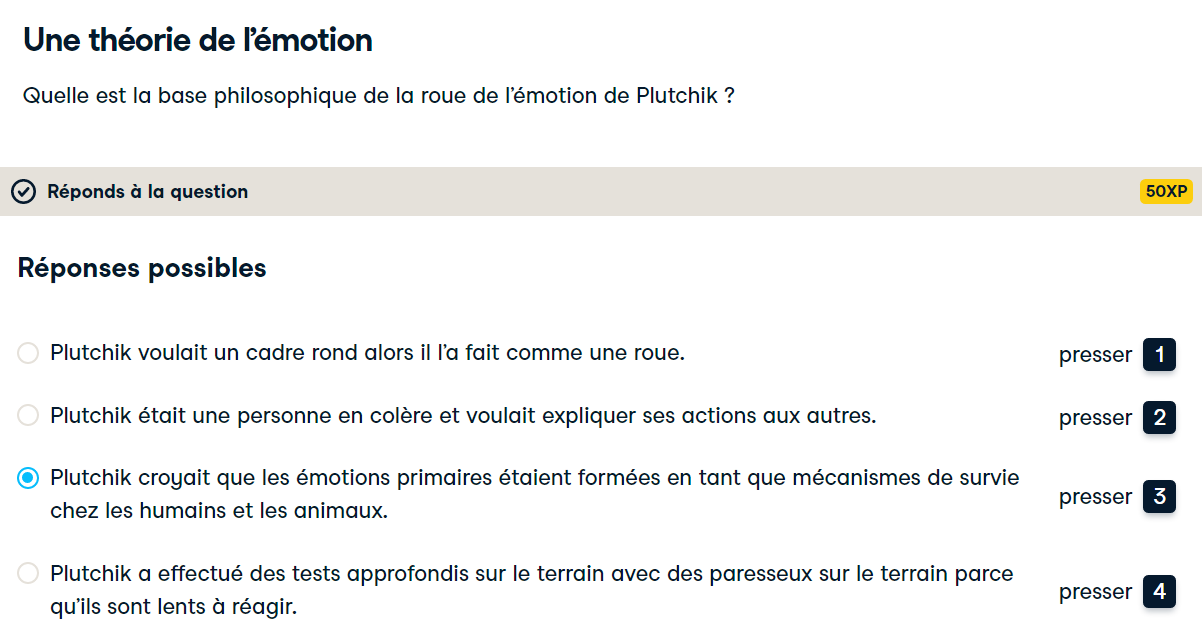

***Oui! Pour survivre à l’état sauvage, il est important de maintenir une peur saine des crocodiles.***

####**DTM vs matrice tidytext**

+ **[Le tidyverse](#https://www.tidyverse.org/) est une collection de packages R qui partagent des philosophies communes et sont conçus pour fonctionner ensemble. Ce chapitre couvre quelques fonctions bien rangées pour manipuler les données. Dans cet exercice, vous allez comparer un DTM à un bloc de données de texte rangé appelé tibble.**

+ **Dans le tidyverse, chaque observation est une seule ligne dans un bloc de données. Cela rend le travail dans différents packages beaucoup plus facile puisque la structure de données fondamentale est la même. Certaines parties de ce cours empruntent beaucoup au package [tidytext](#https://www.rdocumentation.org/packages/tidytext/versions/0.4.1) qui utilise cette organisation des données.**

+ **Par exemple, vous connaissez peut-être déjà l'opérateur %>% du package magritr. Cela transmet un objet sur son côté gauche comme premier argument de la fonction sur son côté droit.**

+ ***Dans l'exemple ci-dessous, vous transférez l'objet de données à function1(). Remarquez comment les parenthèses sont vides. Celui-ci est à son tour transmis à function2(). Dans la dernière fonction, vous n'avez pas besoin d'ajouter l'objet de données car il a été transmis à partir de la sortie de function1(). Cependant, vous ajoutez un paramètre fictif, some_parameter à TRUE. Ces tuyaux vers l'avant créent finalement l'objet.***

        object <- data %>% 
              function1() %>%
                function2(some_parameter = TRUE)

+ ou pour modifier une variable
      object <- data %>%
        mutate(Var1 = as.factor(Var1))

+ Vous utiliserez également la fonction [pivot_wider()](#https://www.rdocumentation.org/packages/tidyr/versions/1.2.1/topics/pivot_wider) de [tidyr](#https://www.rdocumentation.org/packages/tidyr/versions/1.3.0) pour organiser les données, chaque ligne étant une ligne du livre et les valeurs positives et négatives en colonnes.

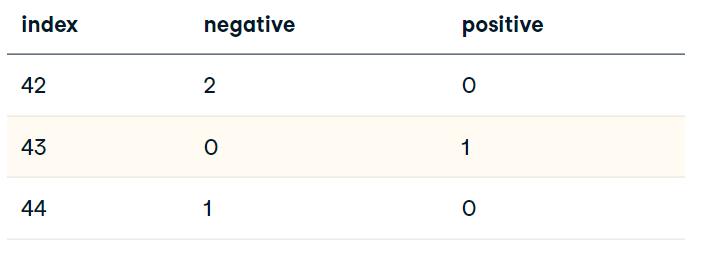


+ Pour changer un DTM au format tidy, utilisez tidy() du package [broom](#https://www.rdocumentation.org/packages/broom/versions/1.0.3).

+ *Cet exercice utilise le texte de la tragédie grecque, Agamemnon. Agamemnon est une histoire d'infidélité conjugale et de meurtre. Vous pouvez télécharger une [copie](#https://www.gutenberg.org/cache/epub/14417/pg14417.txt) ici.*

####**Instructions**

+ Nous avons déjà créé un DTM propre appelé ag_dtm pour cet exercice.

+ Créez ag_dtm_m en appliquant as.matrix() à ag_dtm.
+ À l'aide de crochets, [ and ], indexez ag_dtm_m à la ligne 2206.
+ Appliquez tidy() à ag_dtm. Appelez le nouvel objet ag_tidy.
+ Examinez ag_tidy aux lignes [831:835, ] pour comparer le format tidy. Vous verrez un mot commun de la partie examinée de ag_dtm_m à l'étape 2.

In [ ]:
library(tidytext)
file="https://raw.githubusercontent.com/ThanhDatIU/datacamp/main/pg14417.txt"

ag=read_lines(file, skip = 0, n_max = -1L)
ag_source <- VectorSource(ag)
ag_corpus <- VCorpus(ag_source)
ag_text=clean_corpus(ag_corpus)

# Create tf_dtm
ag_dtm <- DocumentTermMatrix(ag_text)

In [ ]:
ag_dtm 

<<DocumentTermMatrix (documents: 2683, terms: 2916)>>
Non-/sparse entries: 8985/7814643
Sparsity           : 100%
Maximal term length: 18
Weighting          : term frequency (tf)

In [ ]:
# As matrix
ag_dtm_m <- as.matrix(ag_dtm)

dim(ag_dtm_m)

[1] 2683 2916

In [ ]:
# Examine line 2206 and columns 245:250
print(ag_dtm_m[2206, 245:250])

       birds birdthroated        birth         bite       bitter        black 
           0            0            0            0            0            0 


In [ ]:
# Tidy up the DTM
ag_tidy <- tidy(ag_dtm)

# Examine tidy with a word you saw
print(ag_tidy[831:835, ])

####**Obtenir des lexiques de sentiments**
+ **Jusqu'à présent, vous avez utilisé un seul lexique. Nous allons maintenant passer à trois, chacun mesurant le sentiment de différentes manières.**

+ ***Le package [tidytext](#https://www.rdocumentation.org/packages/tidytext/versions/0.4.1) contient une fonction appelée [get_sentiments](#https://www.rdocumentation.org/packages/tidytext/versions/0.2.2/topics/get_sentiments) qui, avec le package [textdata], vous permet de télécharger et d'interagir avec des lexiques bien documentés. Voici une petite section du lexique loughran.***

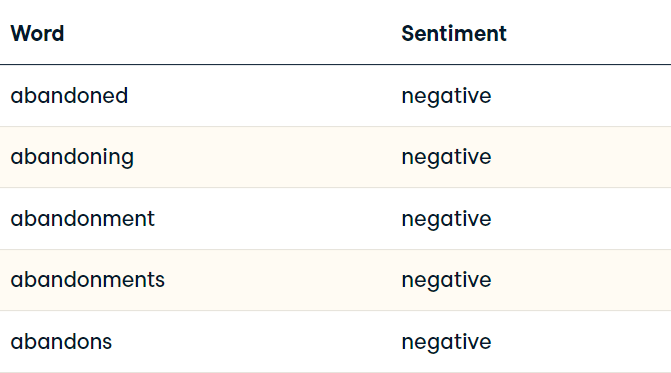

+ *Ce lexique contient 4150 termes avec les informations correspondantes. Nous explorerons d'autres lexiques, mais la structure et la méthode pour les obtenir sont similaires.*

+ *Utilisons tidytext avec textdata pour explorer les étiquettes de mots d'autres lexiques !*

####**Instructions**
+ Utilisez get_sentiments() pour obtenir le lexique "afinn", en l'affectant à afinn_lex.
+ Passez en revue le nombre total () de valeur dans afinn_lex.

+ Refaire la même chose, cette fois avec le lexique "nrc". C'est,
  + obtenir les sentiments, en les attribuant à nrc_lex, puis
  + compter la colonne de sentiment, en l'attribuant à nrc_counts.

+ créer un ggplot étiquetant l'axe des $y$ comme $n$ contre l'axe des $x$ du sentiment.
+ Ajoutez une couche col en utilisant geom_col(). (Ceci est comme geom_bar(), mais utilisé lorsque vous avez déjà résumé avec count().)

In [ ]:
remotes::install_github("juliasilge/tidytext")
remotes::install_github("EmilHvitfeldt/textdata")
install.packages('stringr')
install.packages('syuzhet')
install.packages("ggthemes")
install.packages('reshape2')

In [ ]:
library(remotes)
library(reshape2)
library(syuzhet)
library(tidytext)
library(ggthemes)
library(tidyr)
library(textdata)

In [ ]:

#get_sentiments("bing")
#get_sentiments("afinn")

In [ ]:
library(textdata)
afinn_lex=read.csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vS4tUUP2pJ1A6crxDKSY6Be7Rp2QlZjase7ubLcPUXcnwE7xHKkXGuV3V8WpxsJFQpOEDuFpxb2qfbh/pub?gid=1069070907&single=true&output=csv")

In [ ]:
# Count AFINN scores
afinn_lex %>% 
  count(value)

value,n
<int>,<int>
-5,16
-4,43
-3,264
-2,966
-1,309
0,1
1,208
2,448
3,172


In [ ]:
# Subset to nrc
#nrc_lex <- get_sentiments("nrc")
# Subset to nrc
nrc_lex <- read.csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRci0CCoGxbcZrBd_PR5kcgSt9jqYICsgHxBj40hbUuSxr4XUKPmvV1EssEy9EnvC5eD9LH12w2wnWI/pub?gid=1381586899&single=true&output=csv")


# Make the nrc counts object
nrc_counts <- nrc_lex %>% 
  count(sentiment)

In [ ]:
nrc_counts

sentiment,n
<chr>,<int>
anger,1246
anticipation,837
disgust,1056
fear,1474
joy,687
negative,3318
positive,2308
sadness,1187
surprise,532


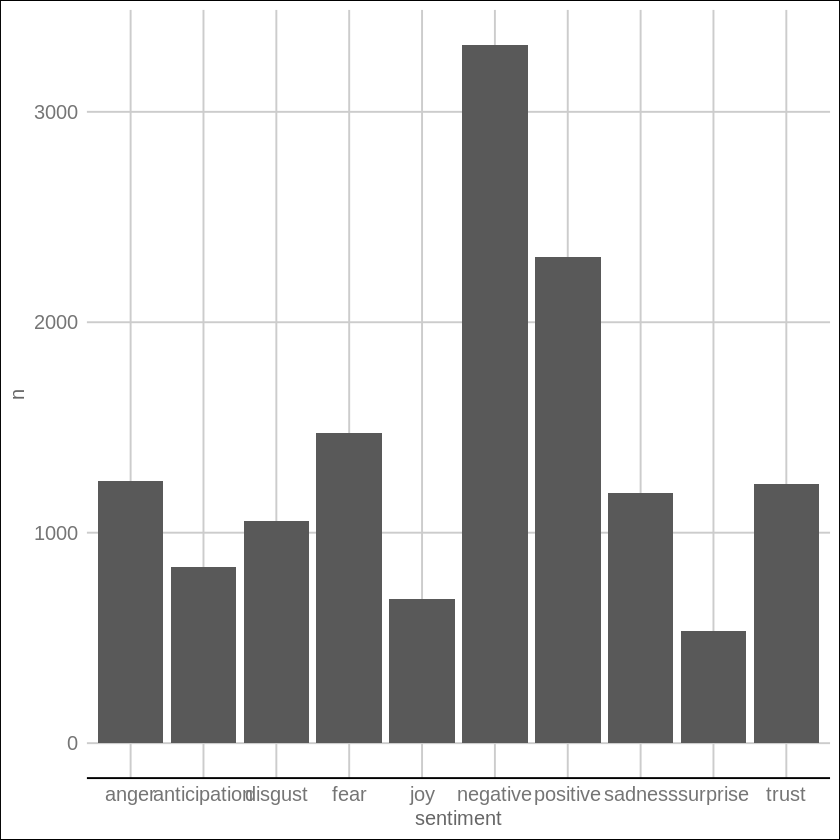

In [ ]:
# From previous step
#nrc_counts <- get_sentiments("nrc") %>% 
#  count(sentiment)

# Plot n vs. sentiment
ggplot(nrc_counts, aes(x = sentiment, y = n)) +
  # Add a col layer
  geom_col() +
  theme_gdocs()

***Belle exploration du lexique ! Les mots négatifs sont le type le plus courant dans le lexique du CNRC.***

###**Lexique Bing avec jointure interne**


####**1. Lexique Bing avec jointure interne**

+ ***La base de l’analyse des sentiments tidytext est une jointure interne. Cette fonction vous permet de comparer les mots de votre texte avec une liste connue de mots dans le lexique de la subjectivité.***

####**2. Jointures de table**

+ **La fonction inner_join() provient du paquet dplyr, mais les jointures sont également souvent associées à des bases de données relationnelles comme SQL.**

+  **Ne vous laissez pas submerger, la famille des fonctions de jointure sont des fonctions génériques qui acceptent deux tables**. 

+ **Appelons-les $x$ et $y$. Les diagrammes de Venn ici vous montrent les différentes fonctions dplyr à l’exception de la semi-jointure qui est similaire à une jointure interne mais un peu plus compliquée. Pour en savoir plus sur les jointures, essayez le cours dplyr !**

####**3. Jointures de table**

+ Pour que les jointures fonctionnent, vous devez spécifier le paramètre « by ». 

+ Il s’agit d’une colonne que les tables ont en commun, telle qu’un ID client ou un jour de la semaine. 

+ Si les noms sont différents, vous pouvez toujours utiliser le paramètre by pour déclarer les valeurs partagées. Ceci est indiqué juste en dessous du tableau des fonctions.

####**4. Comparaison des jointures internes et anti-jointures**

+ Dans ces diagrammes de Venn, vous pouvez voir à la fois **une jointure interne et une autre fonction appelée anti-jointure à des fins de comparaison**. 

+ Pour que ces jointures fonctionnent, vous avez besoin de votre texte sous forme de tableau ou de format ordonné où chaque jeton de mot est une seule ligne. 

+ Ensuite, les fonctions de jointure renverront les lignes en commun ou avec des lignes spécifiques supprimées en fonction de la jointure spécifique utilisée. 

+ Une fois organisée en un tibble où chaque mot est une ligne distincte, la jointure interne est utilisée pour trouver des mots en commun. 

+ **Tout comme la fonction de polarité de qdap, la jointure interne peut être utilisée pour trouver les mots polarisés à partir d’un lexique subjectif**. 

+ **Contrairement à la polarité, la jointure interne ne crée pas le groupe de contextes et ne tient pas compte des décalages de valence**. 

+ Dans cet exemple, la table $x$ serait votre texte tel qu’un livre et la table y serait le lexique de la subjectivité. 

+ En utilisant la jointure interne et en passant les tables avec une colonne partagée, le fragment de termes communs est renvoyé. 

+ À titre de comparaison, pour supprimer des mots d’un texte dans le format ordonné, vous pouvez utiliser un anti-jointure. 

+ **Ceci est similaire à l’utilisation de la fonction removeWords() du package tm**. 

+ Rappelez-vous que la suppression de termes peut être utile dans l’analyse de texte, car de nombreux termes ne sont pas informatifs. 

+ Souvent, ces termes sont appelés mots vides et incluent des mots comme « le » et « est ». 

+ Dans cet exemple, vous passez votre tableau de texte et le tableau des mots vides. 

+ L’anti-jointure ne renvoie que les lignes de la table de texte qui n’ont pas de mot vide. Bien que nous n’utilisions pas d’anti-jointure dans ce cours, c’est une excellente comparaison avec la jointure interne que vous ferez beaucoup!

####**5. Commencer par positif/négatif**

+ Les prochains exercices, vous effectuerez une jointure intérieure entre certains textes de livres et le lexique « bing ». 

+ Le lexique bing contient des mots classés comme « positifs » ou « négatifs ». 

+ Vous finirez par compter les termes positifs et négatifs pour arriver à un score de polarité en ligne avec le score de polarité de qdap. 

+ Une fois que vous maîtrisez la jointure intérieure avec la jointure positive et négative, vous pouvez passer à l’articulation intérieure avec plus d’états émotionnels et même d’intensité émotionnelle. 

+ Nous commençons par le positif et le négatif afin que vous puissiez vous concentrer sur la mécanique de jointure interne.

####**6. Entraînons-nous!**
+ Amusez-vous avec les exercices!

###**EXERCICES**

####**Polarité de rangement Bing : exemple simple**

+ ***Maintenant que vous comprenez les bases d'une jointure interne, appliquons cela au lexique "Bing". Gardez à l'esprit que la fonction inner_join() provient de dplyr et que l'objet lexique est obtenu à l'aide de la fonction get_sentiments() de tidytext'.***

+ **Le lexique Bing étiquette les mots comme positifs ou négatifs. Les trois exercices suivants vous permettent d'interagir avec ce lexique spécifique. Pour utiliser get_sentiments(), passez une chaîne telle que "afinn", "bing", "nrc" ou "loughran" pour télécharger le lexique spécifique.**

+ Le workflow de jointure interne :

  + Obtenez le lexique correct en utilisant get_sentiments().
  + Passez le lexique et les données textuelles rangées à inner_join().
  + Pour que inner_join() fonctionne, il doit y avoir un nom de colonne partagé. 
  
+ S'il n'y a pas de noms de colonnes partagés, déclarez-les avec un paramètre supplémentaire, égal à c avec des noms de colonnes comme ci-dessous.
      object <- x %>%
          inner_join(y, by = c("column_from_x" = "column_from_y"))


+ *Effectuez une agrégation et une analyse sur l'intersection du tableau.*

####**Instructions**

+ Nous avons chargé ag_txt contenant les 100 premières lignes d'Agamemnon et ag_tidy qui est la version propre.

+ Pour comparaison, utilisez polarity() sur ag_txt.
+ Obtenez le lexique "bing" en passant cette chaîne à get_sentiments().
+ Effectuez un inner_join() avec ag_tidy et bing.
+ Les colonnes de mots sont appelées "term" dans ag_tidy & "word" dans le lexique, donc déclarez l'argument by.
+ Appelez le nouvel objet ag_bing_words.
+ Affichez ag_bing_words et regardez quelques-uns des mots qui se trouvent dans le résultat.
+ Passez ag_bing_words à count() du sentiment à l'aide de l'opérateur pipe, %>%. 
+ Comparez le score de polarité() au rapport du nombre de sentiments.

In [ ]:
ag_txt=ag

In [ ]:
# Qdap polarity
polarity(ag_txt)

In [ ]:
# Get Bing lexicon
bing <- get_sentiments("bing")

# Join text to lexicon
ag_bing_words <- inner_join(ag_tidy, bing, by = c("term" = "word"), multiple = "all")

# Examine
head(ag_bing_words)

In [ ]:
# Get counts by sentiment
ag_bing_words %>%
  count(sentiment)

####**Bing tidy polarity : compter et faire pivoter la baleine blanche**

+ **Dans cet exercice, vous appliquerez un autre inner_join() en utilisant le lexique "bing".**

+ **Ensuite, vous manipulerez les résultats avec count() de dplyr et pivot_wider() de tidyr pour en savoir plus sur le texte.**

+ ***La fonction pivot_wider() répartit les données sur plusieurs colonnes. Dans ce cas, le sentiment et les valeurs n correspondantes représentent la fréquence des termes positifs ou négatifs pour chaque ligne. L'utilisation de pivot_wider() modifie les données afin que chaque ligne ait maintenant des valeurs positives et négatives, même si c'est 0.***

####**Instructions**

+ Dans cet exercice, votre session R a m_dick_tidy qui contient le livre Moby Dick et bing, contenant le lexique similaire à l'exercice précédent.

+ Effectuez un inner_join() sur m_dick_tidy et bing.
+ Comme précédemment, joignez la colonne "terme" dans m_dick_tidy à la colonne "mot" dans le lexique.
+ Appelez le nouvel objet moby_lex_words.
+ Créez un index de colonne, égal à as.numeric() appliqué au document. Cela se produit dans mutate() dans le tidyverse.
+ Créez moby_count en transmettant moby_lex_words à count(), en transmettant le sentiment, l'index.
+ Générez moby_wide en redirigeant moby_count vers pivot_wider() où names_from est égal à la colonne sentiment, values_from est égal à la colonne n et les valeurs sont remplies avec values_fill = 0.
+ arrange est le tube suivant utilisé pour ordonner les lignes par valeurs d'index

In [ ]:
file="https://raw.githubusercontent.com/ThanhDatIU/datacamp/main/moby10b.txt"
m_dick_tidy=read_lines(file, skip = 0)
dick_tidy_source <- VectorSource(m_dick_tidy)
dick_corpus <- VCorpus(dick_tidy_source)
dick_text=clean_corpus(dick_corpus)

# Create tf_dtm
dick_dtm <- DocumentTermMatrix(dick_text)
# As matrix
dick_dtm_m <- as.matrix(dick_dtm)

m_dick_tidy=tidy(dick_dtm)

In [ ]:
# Inner join
moby_lex_words <- inner_join(m_dick_tidy, bing, by = c("term" = "word"), multiple = "all")

moby_lex_words <- moby_lex_words %>%
  # Set index to numeric document
  mutate(index = as.numeric(document))

moby_count <- moby_lex_words %>%
  # Count by sentiment, index
  count(sentiment, index)

# Examine the counts
moby_count


In [ ]:
moby_wide <- moby_count %>%
  # Pivot the sentiments
  pivot_wider(names_from = sentiment, values_from = n, values_fill = 0) %>% 
  arrange(index)

# Review the pivoted data
moby_wide

In [ ]:
moby_spread <- moby_count %>%
  # Spread sentiments
  spread(sentiment, n, fill = 0)

# Review the spread data
moby_spread

####**Bing tidy polarity : Appelez-moi Ishmael (avec ggplot2) !**

+ ***Le dernier exercice de lexique Bing ! Dans cet exercice, vous utiliserez l'opérateur pipe (%>%) pour créer une chronologie du sentiment dans Moby Dick. À la fin, vous créerez également un visuel simple en suivant la structure de code ci-dessous. Le chapitre suivant va plus en profondeur pour les visuels.***

      ggplot(pivoted_data, aes(index_column, polarity_column)) +
      geom_smooth(se = FALSE)

####**Instructions**
+ 1) 

  + Inner joindre moby au lexique bing.
  + Appelez inner_join() pour joindre les tibbles.
  + Joindre par la colonne de termes dans le texte et la colonne de mots dans le lexique.
  + Compter par sentiment et index.
  + Remodeler pour que chaque sentiment ait sa propre colonne.
  + Appelez pivot_wider().
  + La colonne names_from (à diviser en plusieurs colonnes) est le sentiment.
  + La colonne values_from (contenant les comptages) est n.
  + Spécifiez également values_fill = 0 pour remplir les valeurs manquantes avec un zéro.
  + Utilisez mutate() pour ajouter la colonne de polarité. 
  + Définissez-le comme la différence entre les colonnes positives et négatives.
  + organiser est utilisé pour ordonner les lignes avant l'examen dans le %>% final

+ 2) 
  + À l'aide de moby_polarity, tracez la polarité en fonction de l'index.
  + Ajoutez une couche de tendance lisse en appelant geom_smooth() sans arguments.

In [ ]:
moby=m_dick_tidy

In [ ]:
moby_polarity <- moby %>%
  # Inner join to lexicon
  inner_join(bing, by = c("term" = "word"), multiple = "all") %>%
  mutate(index=row_number()) %>%
  # Count the sentiment scores
  count(sentiment, index) %>% 
  # Pivot the sentiment into positive and negative columns
  pivot_wider(names_from = sentiment, values_from = n, values_fill = 0) %>%
  # Add polarity column
  mutate(polarity = positive - negative) %>% arrange(index)

# Examine a portion 
moby_polarity[190:195,]

Warning message in inner_join(., bing, by = c(term = "word")):
“Each row in `x` is expected to match at most 1 row in `y`.
ℹ Row 31430 of `x` matches multiple rows.
ℹ If multiple matches are expected, set `multiple = "all"` to silence this
  warning.”
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


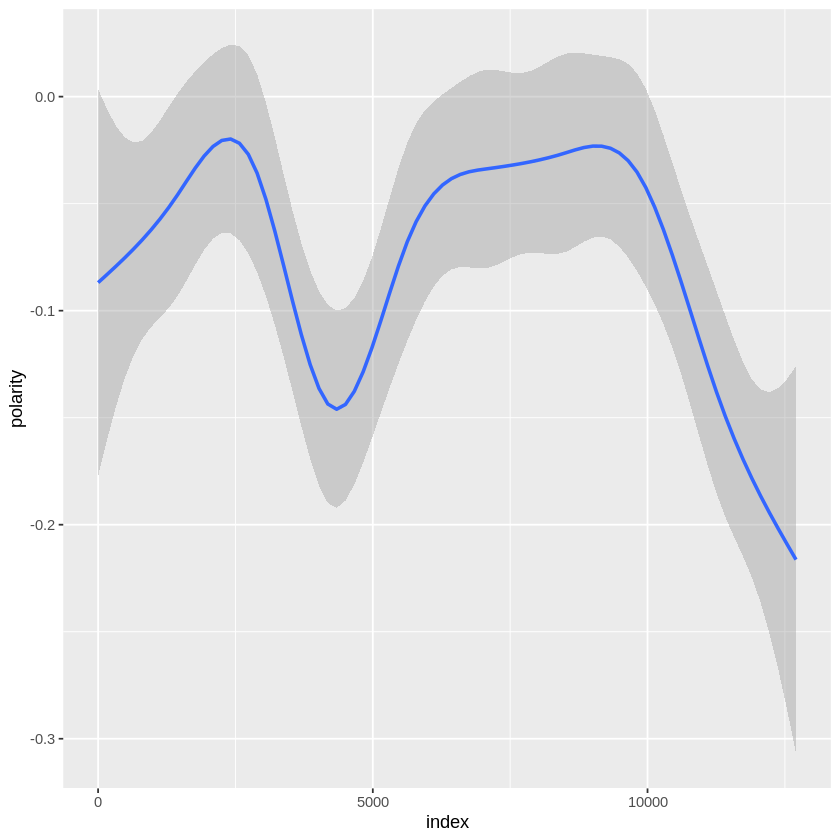

In [ ]:
# From previous step
moby_polarity <- moby %>%
  inner_join(bing, by = c("term" = "word"), multiple = "all") %>% mutate(index=row_number()) %>%
  count(sentiment, index) %>% 
  spread(sentiment, n, fill = 0) %>%
  mutate(polarity = positive - negative)
  
# Plot polarity vs. index
ggplot(moby_polarity, aes(index, polarity)) + 
  # Add a smooth trend curve
  geom_smooth()  

###**1. Jointures internes de l’AFINN et du NRC**

####**1. Jointures internes de l’AFINN et du NRC**

+ **Nous passons maintenant à l’exécution de jointures internes avec les lexiques subjectifs de l’AFINN et du NRC.**

####**2. AFINN**

+ Le lexique AFINN contient des mots étiquetés par Finn Årup Nielsen, un chercheur danois. 

+ Plutôt que positif ou négatif, les mots de subjectivité sont maintenant étiquetés avec des valeurs numériques comprises entre moins cinq et cinq. 

+ Gardez à l’esprit qu’il n’y a pas de mots neutres ou sans valeur nulle, seulement moins un à moins cinq et un à cinq.

####**3. Le NRC**

+ En revanche, le lexique du CNRC a été créé par Saif Mohammed avec des étiquettes réalisées à l’aide d’une plateforme d’externalisation ouverte. 

+ Le lexique du NRC comporte des mots dans dix classes, positives et négatives, ainsi que dans les huit classes primaires de Plutchik.

####**4. Huckleberry Finn**

+ En utilisant le lexique AFINN, vous effectuerez une jointure intérieure avec un livre intitulé Les aventures de Huckleberry Finn. 

+ C’est un classique américain et largement considéré comme un récit assez humoristique d’un jeune garçon, Huck, à la recherche de liberté et d’aventure. 

+ Le livre a été arrangé dans un format ordonné de sorte que chaque mot est une ligne. La colonne document représente la ligne du livre sur lequel le mot a été trouvé.

####**5. Huck Finn rejoint l’AFINN**
+ Au fur et à mesure que vous effectuez la jointure interne avec les mots et le lexique AFINN, les valeurs correspondantes entre moins cinq et cinq seront conservées.

####**6. Utilisation de summarize()**

+ Vous apprendrez également la fonction d’agrégation dans cette section. 

+ Une fois que les mots ont été notés avec AFINN et la jointure interne, vous additionnerez les valeurs par ligne de livre. 

+ Par exemple, supposons qu’une ligne contienne deux mots marqués. 

+ Le premier est évalué comme négatif trois et le second comme négatif. 

+ Ainsi, le score total sera négatif deux. Dans cet exemple, la ligne vingt-deux contient des mots négatifs comme « juge » et « a pris ».

+ Dans cette section, vous ajouterez simplement les valeurs correspondantes par le groupe qui est la colonne « document » représentant la ligne du livre.

####**7. Utilisation de filter()**
+ Ensuite, vous apprendrez la fonction filter(). 

+ Cela vous permet d’explorer les résultats de manière granulaire afin que vous puissiez comprendre ce que vous avez accompli. 

+ La fonction filter() est similaire à subset(). Dans le tidyverse, il est préféré car il a une syntaxe plus simple.

+  Cela fonctionne en passant d’abord l’objet de données, puis la condition que vous souhaitez filtrer.

####**8. Plutchik et le NRC**

+ Dans l’exercice suivant, vous passez au lexique du NRC. 

+ Rappelez-vous que le lexique du NRC contient des mots positifs/négatifs et huit émotions primaires. 

+ Plus précisément, les émotions comprennent la joie, la confiance, la peur, la surprise, la tristesse, le dégoût, la colère et l’anticipation.

####**9. Le merveilleux magicien du NRC**


+ Dans ce chapitre, vous rejoindrez le lexique du NRC avec un livre Le Magicien d’Oz. 

+ C’est l’histoire d’une fille emmenée dans un royaume magique plein de moments heureux et dramatiques alors qu’elle travaille pour rentrer chez elle. 

+ Cette section du chapitre deux est destinée à vous présenter les différents lexiques et à effectuer les jointures internes à quelques reprises. 

+ Dans le chapitre trois, vous ferez des visuels basés sur les trois lexiques, Bing, AFINN et NRC. 

+ Ainsi, vous aurez la chance de faire beaucoup plus de jointures intérieures tout en créant des visuels plus intéressants.

#####**10. Opérateur %in%**

+ Dans l’exercice d’Oz, nous introduisons l’opérateur de match. 

+ Il s’agit d’une fonction de correspondance qui renvoie une valeur True ou False si des valeurs sont partagées. 

+ Dans cet exemple, vous avez $x$ comme texte, minage et python et $y$ comme texte, tm, qdap, R et minage. 

+ Si vous cochez « est $x$ dans $y$? » alors la correspondance renvoie True, True et False car le texte et l’exploration de données sont dans $X$ et $y$, mais python ne l’est pas. Si vous inversez et cochez $y$ dans $x$, vous obtenez True, False, False, False et True. 

+ Pour être franc, je mélange toujours l’ordre de $x$ dans $y$ ou vice versa, alors quand vous codez, assurez-vous de vérifier!

####**11. Entraînons-nous!**
+ Allez-y!

###**EXERCICES**

####**AFINN : Je suis ta Huckleberry**

+ ***Passons maintenant au lexique AFINN. Le lexique AFINN a des valeurs numériques de 5 à -5, pas seulement positives ou négatives. Contrairement au sentiment du lexique Bing, la colonne de score de sentiment du lexique AFINN est appelée valeur.***

+ **Comme précédemment, vous appliquez inner_join() puis count(). Ensuite, pour additionner les scores de chaque ligne, nous utilisons les fonctions group_by() et resume() de dplyr. La fonction group_by() prend une trame de données existante et la convertit en une trame de données groupée où les opérations sont effectuées "par groupe". Ensuite, la fonction resume() vous permet de calculer une valeur pour chaque groupe de votre bloc de données à l'aide d'une fonction qui agrège les données, comme sum() ou mean(). Donc, dans notre cas, nous pouvons faire quelque chose comme**

      data_frame %>% 
        group_by(book_line) %>% 
          summarize(total_value = sum(book_line))

+ *Dans la version soignée de Huckleberry Finn, la ligne 9703 contient les mots "best", "ever", "fun", "life" et "spirit". "meilleur" et "amusant" ont des scores AFINN de 3 et 4 respectivement. Après agrégation, la ligne 9703 aura un score total de 7.*

+ **Dans le tidyverse, filter() est préféré à subset() car il combine la fonctionnalité de subset() avec une syntaxe plus simple. Voici un exemple qui filtre()s data_frame où une valeur dans la colonne1 est égale à 24. Notez que le nom de la colonne n'est pas entre guillemets.**

      filter(data_frame, column1 == 24)

+ *L'objet afinn contient le lexique AFINN. L'objet huck est une version soignée des aventures de Huckleberry Finn de Mark Twain pour analyse.*

+ **La ligne 5400 est Tous les mocassins avaient l'air heureux ; Je pensais qu'ils avaient l'habitude de s'amuser en dehors de Boggs. Les mots vides et la ponctuation ont déjà été supprimés de l'ensemble de données.**

####**Consignes**
+ 1) 
  + Exécutez le code pour regarder la ligne 5400 et voir les scores de sentiment de certains mots.
  + inner_join() huck au lexique afinn.
  + N'oubliez pas que huck est déjà canalisé dans la fonction, alors ajoutez simplement le lexique.
  + Joindre par la colonne de termes dans le texte et la colonne de mots dans le lexique.
  + Utilisez count() avec value et line pour compter/compter les observations par groupe.
  + Affectez le résultat à huck_afinn.


+ 2) 

  + Obtenez le score de sentiment total en transmettant huck_afinn à group_by() et en passant la ligne sans guillemets.
  + Créez huck_afinn_agg à l'aide de resume(), en définissant total_value égal à sum() de value * n.

  + Utilisez filter() sur huck_afinn_agg et line == 5400 pour revoir une seule ligne.

+ 3)

  + Obtenez le score de sentiment total en transmettant huck_afinn à group_by() et en passant la ligne sans guillemets.
  + Créez huck_afinn_agg à l'aide de resume(), en définissant total_value égal à sum() de value * n.
  + Utilisez filter() sur huck_afinn_agg et line == 5400 pour revoir une seule ligne.

In [ ]:
df=readRDS("/content/all_books.rds") 



huck=df %>% filter(book=="huck_finn") %>% mutate(line=document) %>% select(term,count,line)

In [ ]:
# See abbreviated line 5400
huck %>% filter(line == 5400)

term,count,line
<chr>,<dbl>,<chr>
all,1,5400
fun,1,5400
glad,1,5400
loafers,1,5400
looked,1,5400
reckoned,1,5400
used,1,5400


In [ ]:
afinn=afinn_lex
# What are the scores of the sentiment words?
afinn %>% filter(word %in% c("fun", "glad"))

word,value
<chr>,<int>
fun,4
glad,3


In [ ]:
huck_afinn <- huck %>% 
  # Inner Join to AFINN lexicon
  inner_join(afinn, by = c("term" = "word")) %>%
  # Count by value and line
  count(value, line)

In [ ]:
# From previous step
huck_afinn <- huck %>% 
  inner_join(afinn, by = c("term" = "word")) %>%
  count(value, line)
  
huck_afinn_agg <- huck_afinn %>% 
  # Group by line
  group_by(line) %>%
  # Sum values times n (by line)
  summarize(total_value = sum(value * n))
  
huck_afinn_agg %>% 
  # Filter for line 5400
  filter(line == 5400)

line,total_value
<chr>,<int>
5400,7


`geom_smooth()` using formula = 'y ~ x'


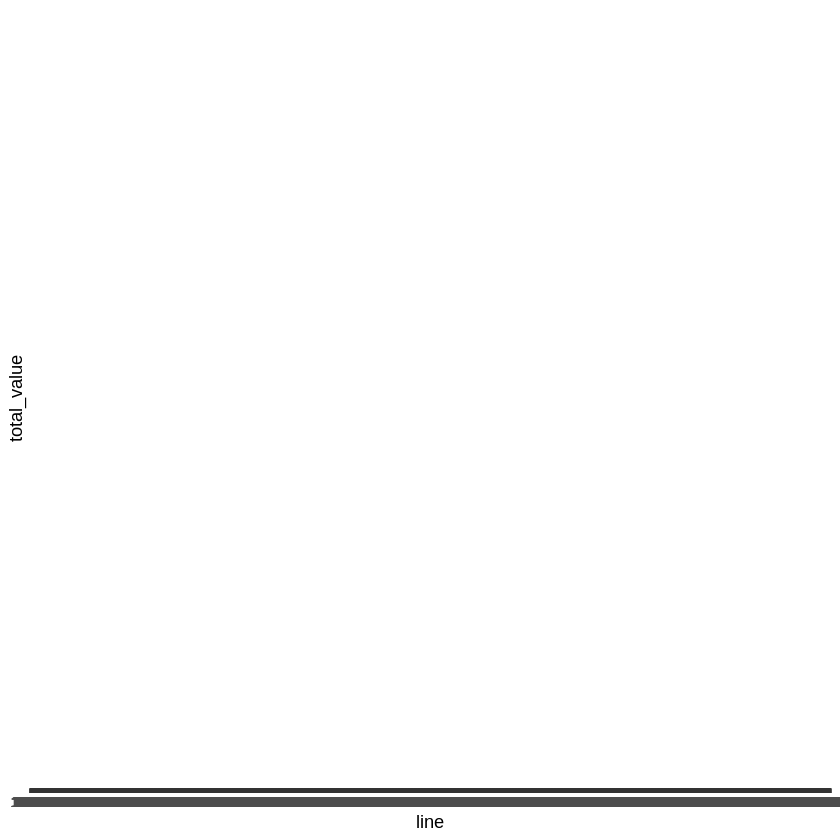

In [ ]:
# From previous steps
huck_afinn_agg <- huck %>% 
  inner_join(afinn, by = c("term" = "word")) %>%
  count(value, line) %>% 
  group_by(line) %>%
  summarize(total_value = sum(value * n))
  
# Plot total_value vs. line
ggplot(huck_afinn_agg, aes(line, total_value)) + 
  # Add a smooth trend curve
  geom_smooth(se = FALSE,method='loess') 

####**Le merveilleux magicien du NRC**

+ ***Enfin et surtout, vous travaillez avec le lexique NRC qui étiquette les mots dans plusieurs états émotionnels. Vous souvenez-vous de la roue des émotions de Plutchik ? Le lexique du NRC étiquette les mots selon les 8 émotions de Plutchik plus positif/négatif.***

+ **Dans cet exercice, il y a un nouvel opérateur, %in%, qui fait correspondre un vecteur à un autre. Dans le code ci-dessous %in% renverra FALSE, FALSE, TRUE. En effet, dans some_vec, 1 et 2 ne sont pas trouvés dans some_other_vector mais 3 est trouvé et renvoie TRUE. Le %in% est utile pour trouver des correspondances.**

      some_vec <- c(1, 2, 3)
      some_other_vector <- c(3, "a", "b")
      some_vec %in% some_other_vector

+ **Un autre nouvel opérateur est !. Pour les conditions logiques, ajouter ! inversera le résultat. Dans l'exemple ci-dessus, FAUX, FAUX, VRAI deviendra VRAI, VRAI, FAUX. L'utiliser de concert avec %in% inversera la réponse et est utile pour supprimer les éléments correspondants.**

      !some_vec %in% some_other_vector

+ *Nous avons créé oz qui est la version soignée du Magicien d'Oz avec nrc contenant le lexique "NRC" avec des colonnes renommées.*

####**Consignes**

+ 1)

  + Jointure interne oz au lexique nrc.
  + Appelez inner_join() pour joindre les tibbles.
  + Joindre par la colonne de termes dans le texte et la colonne de mots dans le lexique.
  + Filtrez uniquement les émotions de Pluchik et supprimez les mots positifs ou négatifs dans le lexique.
  + Utilisez filter() pour conserver les lignes où le sentiment n'est pas "positif" ou "négatif".
  + Regroupez par sentiment.
  + Appelez group_by(), en transmettant le sentiment sans guillemets.
  + Obtenez le nombre total de chaque sentiment.
  + Appelez summary(), en définissant total_count égal à sum() de count.
  + Affectez le résultat à oz_plutchik.

+ 2)

  + Créez un graphique à barres avec ggplot().
  + Passez oz_plutchik à l'argument data.
  + Spécifiez ensuite l'esthétique $x$ et $y$, en appelant aes() et en passant sentiment et total_count sans guillemets.
  + Ajoutez une colonne geom avec geom_col(). 
  + (C'est la même chose que geom_bar(), mais ne résume pas les données, puisque vous l'avez déjà fait.)

In [ ]:
oz_txt=readLines("https://raw.githubusercontent.com/kwartler/text_mining/master/Wizard_Of_Oz.txt")
oz_source=VectorSource(oz_txt)
oz_corpus <- VCorpus(oz_source)
clean_text=clean_corpus(oz_corpus)
tf_dtm <- DocumentTermMatrix(clean_text)
nrc=nrc_lex
oz=tidy(tf_dtm)

In [ ]:
oz_plutchik <- oz %>% 
  # Join to nrc lexicon by term = word
  inner_join(nrc, by = c("term" = "word"), multiple = "all") %>% 
  # Only consider Plutchik sentiments
  filter(!sentiment %in% c("positive", "negative")) %>%
  # Group by sentiment
  group_by(sentiment) %>% 
  # Get total count by sentiment
  summarize(total_count = sum(count))

head(oz_plutchik)

Warning message in inner_join(., nrc, by = c(term = "word")):
“Each row in `x` is expected to match at most 1 row in `y`.
ℹ Row 2 of `x` matches multiple rows.
ℹ If multiple matches are expected, set `multiple = "all"` to silence this
  warning.”


sentiment,total_count
<chr>,<dbl>
anger,609
anticipation,830
disgust,484
fear,1255
joy,833
sadness,599


Warning message in inner_join(., nrc, by = c(term = "word")):
“Each row in `x` is expected to match at most 1 row in `y`.
ℹ Row 2 of `x` matches multiple rows.
ℹ If multiple matches are expected, set `multiple = "all"` to silence this
  warning.”


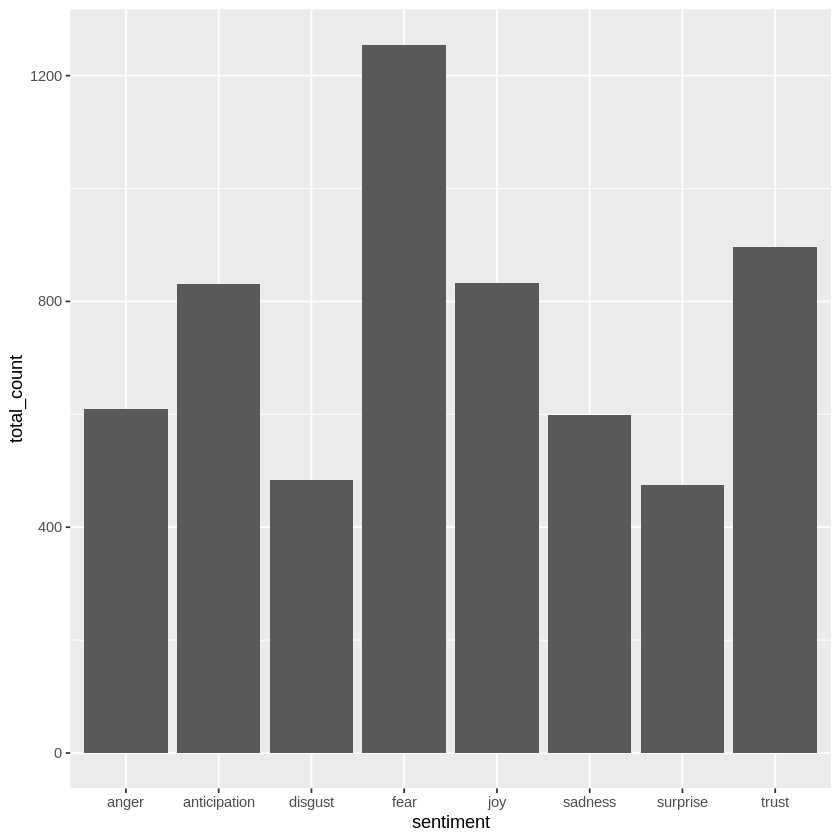

In [ ]:
# From previous step
oz_plutchik <- oz %>% 
  inner_join(nrc, by = c("term" = "word")) %>% 
  filter(!sentiment %in% c("positive", "negative"), multiple = "all") %>%
  group_by(sentiment) %>% 
  summarize(total_count = sum(count))
  
# Plot total_count vs. sentiment
ggplot(oz_plutchik, aes(x = sentiment, y = total_count)) +
  # Add a column geom
  geom_col()

###**Astuce de salon ou utile?**

####**1. Astuce de salon ou utile?**

+ ***Bienvenue. Dans le chapitre 3, vous commencerez à faire des visualisations basées sur l’analyse des sentiments. Dans de nombreuses organisations, une partie de la réussite d’un projet de science des données repose sur un récit ou une lecture. En conséquence, il y a des moments où une bonne visualisation peut aider à éduquer les décideurs.***

####**2. Des visuels intéressants**

+ Lorsque je fais une analyse des sentiments, j’ai deux conseils. 

+ Tout d’abord, évitez d’utiliser beaucoup de nuages de mots. Les gens les adorent mais ce sont des clichés. 

+ Pour mémoire, vous ferez un nuage de mots ou deux dans ce chapitre! Je préfère de loin utiliser des graphiques à barres qui peuvent être tout aussi informatifs pour afficher les fréquences. 

+ Deuxièmement, assurez-vous d’éviter l’analyse des sentiments qui ne porte aucune idée. 

+ Par exemple, dans l’un de mes rôles de direction, un fournisseur potentiel a présenté une analyse des sentiments pour les enquêtes de satisfaction client. 

+ Ce fournisseur a souligné les enquêtes avec des scores de polarité médiocres. 

+ Le sondage lui-même comportait une simple question oui ou non quant à savoir si l’expérience était positive ou non. 

+ Alors, pourquoi ai-je eu besoin d’un fournisseur pour réaffirmer dans l’analyse des sentiments ce que le client me dit déjà? 

+ Au lieu de cela, vous devriez vous concentrer sur des idées ou des affirmations, et utiliser des visualisations appropriées pour raconter le récit. 

+ Contrairement au fournisseur, choisissez des méthodes et des visuels qui tiennent compte de l’ensemble du problème commercial. 

+ Le vendeur a ignoré la première question, plus simple. 

+ Par coïncidence, au cours de ce chapitre, vous ferez l’un des visuels du vendeur sans dépenser le quart de million de dollars demandé.

####**3. Suivre le sentiment au fil du temps**

+ Dans cette section, vous suivrez le sentiment au fil du temps. 

+ Ce type de visualisation est souvent utilisé en marketing. 

+ Disons que votre marque a eu un score de polarité zéro point cinq mois après mois dans les mentions Twitter. 

+ Vous décidez de commencer à faire du marketing sur Twitter avec des tweets sponsorisés amusants et espérez que votre marque est perçue comme plus engageante à partir des publicités amusantes. 

+ Au fur et à mesure que la campagne publicitaire se déroule, vous pouvez suivre le sentiment pour voir l’impact de l’annonce sur la perception de votre marque sur Twitter. 

+ Ici, vous notez chronologiquement un livre pour voir s’il a une fin heureuse ou triste.

####**4. Analyse simple des fréquences**

+ Ensuite, vous créez un ggplot pour voir quels mots sont le plus souvent positifs ou négatifs. 

+ Dans beaucoup de mes projets d’exploration de texte, une simple analyse de fréquence peut aider mes résultats. J’aime donc intégrer l’analyse fréquentielle à mon EDA, l’analyse exploratoire de données, lors d’un projet d’exploration de texte. 

+ Souvent, je fais un visuel comme vous le ferez dans cette section pour m’aider à consommer l’information rapidement. 

+ Dans ce cas, un visuel de fréquence basé sur les sentiments aide à comprendre la diversité lexicale du texte polarisé. 

+ Par exemple, si vous étiez chef de produit pour une application et que les critiques mentionnaient à plusieurs reprises « étrange » parmi d’autres mots négatifs, vous voudrez peut-être revoir l’interface utilisateur parce que les gens peuvent la trouver étrange ou peu intuitive. 

+ Dans l’exercice de cette section, votre visuel est basé sur Moby Dick, généralement considéré comme une tragédie. 

+ Dans ce cas, le visuel démontre simplement Herman Melville, la diversité de mots polarisée de l’auteur. 

+ Néanmoins, le visuel peut être construit à l’aide de n’importe quel texte intérieur joint au lexique bing et vous devriez explorer son utilisation sur votre propre texte.

####**5. Entraînons-nous!**

###**EXERCICES**

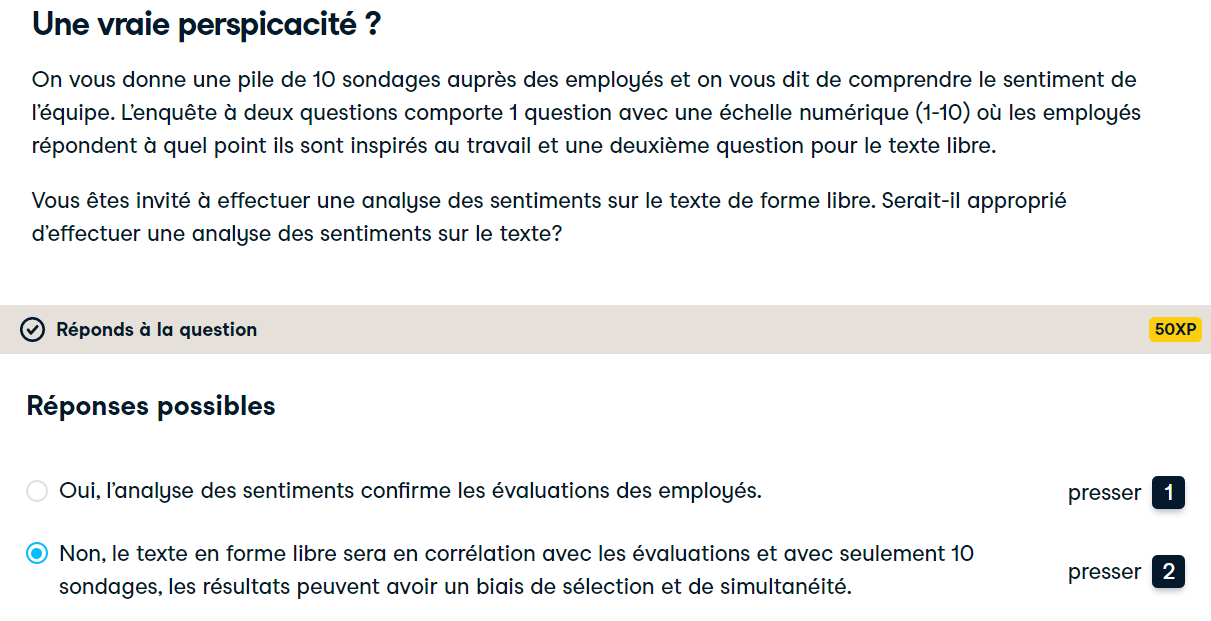

***Oui. Dans ce cas, il est peu probable que l’analyse des sentiments vous dise grand-chose que vous ne savez pas déjà à partir des scores numériques.***

####**Fin malheureuse ? Polarité chronologique**

+ ***Parfois, vous souhaitez suivre le sentiment au fil du temps. Par exemple, pendant une campagne publicitaire, vous pouvez suivre le sentiment de la marque pour voir l'effet de la campagne. Vous en avez vu quelques exemples à la fin du dernier chapitre.***

+ **Dans cet exercice, vous allez récapituler le flux de travail pour explorer les sentiments au fil du temps à l'aide du roman Moby Dick. On devrait s'attendre à ce que les moments heureux dans le livre aient plus de mots positifs que négatifs. Inversement, les moments sombres et les fins tristes devraient utiliser un langage plus négatif. Vous verrez également quelques astuces pour rendre votre série temporelle de sentiments plus attrayante visuellement.**

+ Rappelons que le workflow est :

  + 1) Inner joindre le texte au lexique par mot.
  + 2) Comptez les sentiments par ligne.
  + 3) Remodelez les données afin que chaque sentiment ait sa propre colonne.
  + 4) (Selon le lexique) Calculez la polarité en tant que score positif moins score négatif.
  + 5) Tracez la série chronologique de polarité.


+ ***Cet exercice devrait vous sembler familier : il étend la polarité ordonnée de Bing : appelez-moi Ismaël (avec ggplot2) !.***

####**Instructions**

+ 1)
  + inner_join() la version ordonnée préchargée de Moby Dick, moby, dans le lexique bing.
  + Joindre par la colonne "terme" dans le texte et la colonne "mot" dans le lexique.
  + Compter par sentiment et index.
  + Remodeler pour que chaque sentiment ait sa propre colonne en utilisant pivot_wider() avec :
    + names_from = sentiment faisant référence à la colonne de sentiment
    + values_from = n gain de valeurs à partir de n colonne
    + values_fill = 0 pour remplir NA comme 0

  + En utilisant mutate() ajoutez deux colonnes : polarity et line_number.
  + Définissez une polarité égale au score positif moins le score négatif.
  + Définissez line_number égal au numéro de ligne à l'aide de la fonction row_number().

+ 2)
  + Créez une série chronologique de sentiments avec ggplot().
  + Transmettez moby_polarity à l'argument data.
  + Appelez aes() et transmettez le numéro de ligne et la polarité sans les guillemets.
  + Ajoutez une courbe lissée avec geom_smooth().
  + Ajoutez une ligne horizontale rouge à zéro en appelant geom_hline(), avec les paramètres 0 et "red".
  + Ajoutez un titre avec ggtitle() défini sur "Moby Dick Chronological Polarity".

In [ ]:
moby_polarity <- moby %>%
  # Inner join to the lexicon
  inner_join(bing, by = c("term" = "word"), multiple = "all") %>% 
    mutate(index=row_number()) %>%
  # Count by sentiment, index
  count(sentiment, index) %>%
  # Spread sentiments
  spread(sentiment, n, fill = 0) %>%
  mutate(
    # Add polarity field
    polarity = positive - negative,
    # Add line number field
    line_number = row_number()
  )

In [ ]:
head(moby_polarity)

index,negative,positive,polarity,line_number
<int>,<dbl>,<dbl>,<dbl>,<int>
1,1,0,-1,1
2,1,0,-1,2
3,0,1,1,3
4,0,1,1,4
5,0,1,1,5
6,1,0,-1,6


`geom_smooth()` using formula = 'y ~ s(x, bs = "cs")'


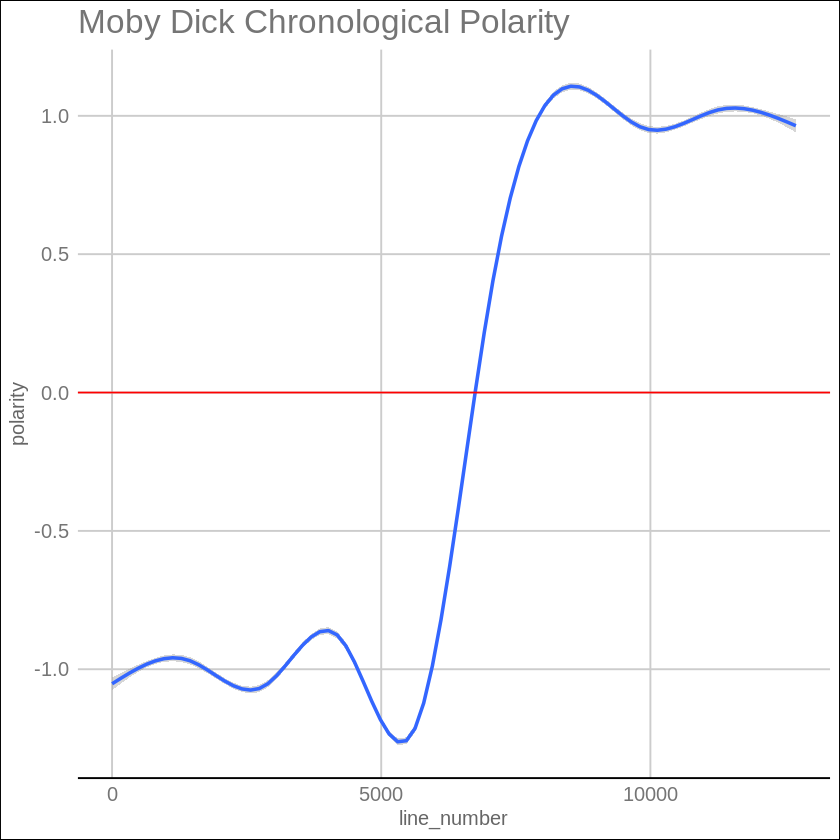

In [ ]:
# From previous step
moby_polarity <- moby %>%
  inner_join(bing, by = c("term" = "word"), multiple = "all") %>%
  mutate(index=row_number()) %>%
  count(sentiment, index) %>%
  pivot_wider(names_from = sentiment, values_from = n, values_fill = 0) %>%
  mutate(
    polarity = positive - negative,
    line_number = row_number()
  )
  
# Plot polarity vs. line_number
ggplot(moby_polarity, aes(line_number, polarity)) + 
  # Add a smooth trend curve
  geom_smooth(method = 'gam') +
  # Add a horizontal line at y = 0
  geom_hline(yintercept = 0, color = "red") +
  # Add a plot title
  ggtitle("Moby Dick Chronological Polarity") +
  theme_gdocs()

####**Impact des mots, analyse des fréquences**

+ ***L'analyse de fréquence est l'un des moyens les plus simples d'explorer les données. Bien qu'elle ne soit pas difficile, dans l'analyse des sentiments, cette méthode simple peut être étonnamment éclairante. Plus précisément, vous allez construire un barplot. Dans cet exercice, vous travaillez à nouveau avec moby et bing pour construire votre visuel.***

+ *Pour obtenir les barres ordonnées du plus bas au plus haut, vous utiliserez une astuce avec des facteurs. reorder() vous permet de modifier l'ordre des niveaux de facteur en fonction d'une autre variable de notation. Dans ce cas, vous réorganiserez le terme de la variable factorielle en fonction de la polarité de la variable de notation.*

####**Instructions**

+ 1) 
  + Créez moby_tidy_sentiment.
  + Utilisez count() avec term, sentiment et wt = count.
  + Canal vers pivot_wider() avec names_from = sentiment, values_from = n et values_fill = 0
  + Pipe pour muter(). Appelez la nouvelle polarité variable ; calculé comme positif moins négatif.
  + Appelez moby_tidy_sentiment pour l'examiner et le comparer à l'exercice précédent.

+ 2)
  + Utilisez filter() sur moby_tidy_sentiment pour conserver les lignes où la polarité absolue est supérieure ou égale à 50. abs() vous donne des valeurs absolues.
  + mutate() un nouveau vecteur pos_or_neg avec une fonction ifelse() vérifiant si polarité > 0 puis déclarez le document "positif" sinon déclarez-le "négatif".

+ 3) 
  + En utilisant moby_tidy_pol, tracer la polarité en fonction du terme, réordonné par polarité (reorder(term, polarity)), rempli par pos_or_neg.
  + Dans element_text(), faites pivoter le texte de l'axe des x de 90 degrés en définissant angle = 90 et en décalant la justification verticale avec vjust = -0.1.

In [ ]:
moby_tidy_sentiment <- moby %>% 
  # Inner join to bing lexicon by term = word
  inner_join(bing, by = c("term" = "word"), multiple = "all") %>% 
  mutate(index=row_number()) %>%
  # Count by term and sentiment, weighted by count
  count(term, sentiment, wt = count) %>%
  # Pivot sentiment, using n as values
  pivot_wider(names_from = sentiment, values_from = n, values_fill = 0) %>%
  # Mutate to add a polarity column
  mutate(polarity = positive - negative)

# Review
head(moby_tidy_sentiment)

term,negative,positive,polarity
<chr>,<dbl>,<dbl>,<dbl>
abominable,3,0,-3
abominate,1,0,-1
abomination,1,0,-1
abound,0,3,3
abruptly,2,0,-2
absence,5,0,-5


In [ ]:
# From previous step
moby_tidy_sentiment <- moby %>% 
  inner_join(bing, by = c("term" = "word"), multiple = "all") %>% 
  mutate(index=row_number()) %>%
  count(term, sentiment, wt = count) %>%
  pivot_wider(names_from = sentiment, values_from = n, values_fill = 0) %>%
  mutate(polarity = positive - negative)

moby_tidy_pol <- moby_tidy_sentiment %>% 
  # Filter for absolute polarity at least 50 
  filter(abs(polarity) >= 50) %>% 
  # Add positive/negative status
  mutate(
    pos_or_neg = ifelse(polarity>0, "positive", "negative")
  )

In [ ]:
head(moby_tidy_pol)

term,negative,positive,polarity,pos_or_neg
<chr>,<dbl>,<dbl>,<dbl>,<chr>
best,0,64,64,positive
better,0,62,62,positive
dark,55,0,-55,negative
dead,90,0,-90,negative
death,75,0,-75,negative
dick,76,0,-76,negative


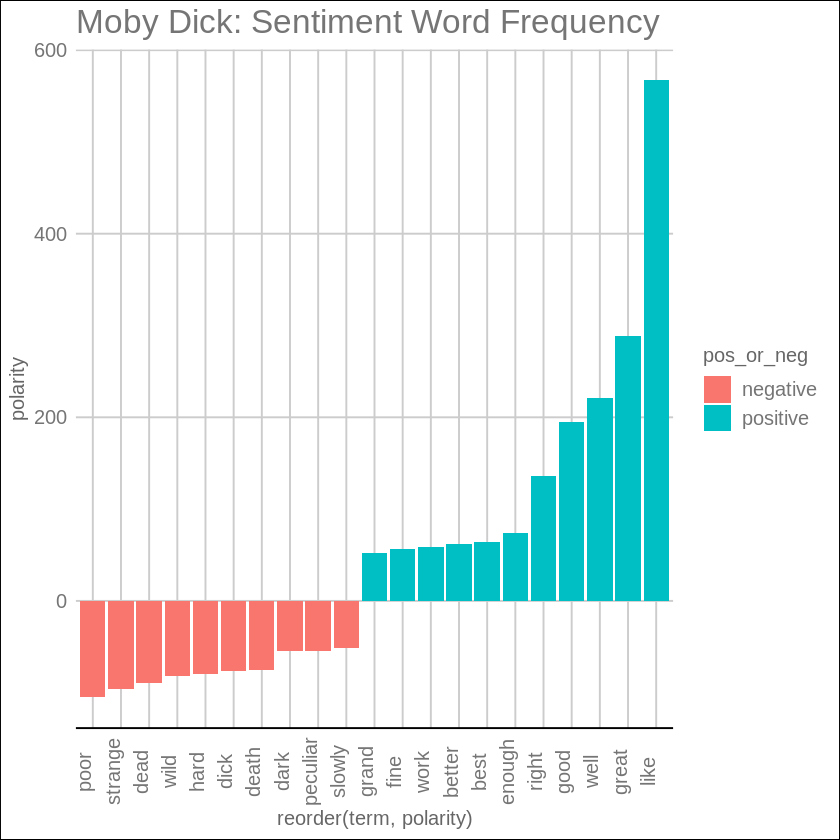

In [ ]:
# From previous steps
moby_tidy_pol <- moby %>% 
  inner_join(bing, by = c("term" = "word"), multiple = "all") %>% 
  mutate(index=row_number()) %>%
  count(term, sentiment, wt = count) %>%
  spread(sentiment, n, fill = 0) %>%
  mutate(polarity = positive - negative) %>% 
  filter(abs(polarity) >= 50) %>% 
  mutate(
    pos_or_neg = ifelse(polarity > 0, "positive", "negative")
  )
  
# Plot polarity vs. (term reordered by polarity), filled by pos_or_neg
ggplot(moby_tidy_pol, aes(reorder(term, polarity), polarity, fill = pos_or_neg)) +
  geom_col() + 
  ggtitle("Moby Dick: Sentiment Word Frequency") + 
  theme_gdocs() +
  # Rotate text and vertically justify
  theme(axis.text.x = element_text(angle = 90, vjust = -0.1))

###**Introspection à l’aide de l’analyse des sentiments**

####**1. Introspection à l’aide de l’analyse des sentiments**

+ ***Si vous avez suivi le cours d’introduction à l’exploration de texte, vous avez couvert les nuages de comparaison. Ces visuels montrent des fréquences de mots différentes. Pour l’analyse des sentiments, vous pouvez utiliser les valeurs ou les émotions pour sous-définir un seul corpus à utiliser dans un nuage de comparaison. Et oui, je vous conseillais d’éviter les nuages de mots mais c’est parti !***

####**2. Polarité du QDAP pour les corpus de sous-ensembles**

+ Le premier nuage de comparaison est basé sur la polarité de qdap. 

+ En utilisant les scores de polarité, divisez le corpus en sous-sections positives et négatives. 

+ À cette fin, les sous-sections représentent des documents positifs ou négatifs complets pour le nuage de comparaison. 

+ Ce visuel peut être utile pour explorer le sentiment basé sur les fonctionnalités. 

+ Par exemple, si vous analysez les critiques de restaurants, les critiques positives peuvent indiquer « bon » et la section négative « impoli » Ainsi, la nourriture est bonne mais le personnel est impoli car seules les personnes peuvent être impolies!

####**3. Comparaison des mots fréquents dans le cadre de Plutchik**
+ Dans l’exercice suivant, vous allez au-delà des sous-sections basées sur le positif et le négatif. Vous rejoindrez le lexique du NRC et le texte de Moby Dick. 

+ Rappelez-vous que le lexique du NRC comporte 8 émotions primaires et positives ou négatives. En conséquence, les mots du livre seront disséqués en plusieurs sous-sections au lieu de simplement positives ou négatives.

###**4. Où est Waldo? Où n’est pas Waldo?**

+ Dans un autre exercice, vous voudrez laisser tomber les mots positifs et négatifs et vous concentrer uniquement sur les 8 émotions primaires. 

+ Vous utiliserez grepl avec le point d’exclamation, le negator et l’expression régulière ou l’opérateur. 

+ Les fonctions Grep utilisent des expressions régulières pour rechercher des modèles de caractères. 

+ Par exemple, vous pouvez utiliser grep() en recherchant « Waldo » dans $x$. 

+ grep() retournera un 3 signifiant que « Waldo » a été trouvé au troisième endroit. 

+ **De même, grepl() renverra un résultat logique. Avec grepl(), seul le troisième résultat est VRAI et tous les autres sont FAUX. L’ajout d’une exclamation avec grepl() basculera TRUE ou FALSE. Votre exercice utilise un grepl avec point d’exclamation pour annuler le résultat.**

####**5. Ajout d’un opérateur « ou »**

+ **Si vous recherchez Waldo ou « Nicole », vous utilisez l’opérateur ou. Le ou est représenté par une ligne droite située au-dessus de la touche Entrée de votre clavier. Maintenant, grepl() recherchera l’un ou l’autre avec son retour TRUE ou FALSE. Votre exercice utilise grepl() avec une négation comme point d’exclamation et recherche avec une instruction ou Positive ou Negative.**

####**6. Comparaisons empilées pour le mélange de polarité**

+ **Vous voudrez peut-être explorer le mélange d’un document en termes de polarité ou de sentiment.** 

+ **Vous allez donc créer un graphique à barres empilées d’émotions pour comprendre dans quelle mesure un document est composé de termes positifs ou négatifs. Cela peut être utile pour comparer la composition des sentiments de plusieurs documents.**

####**7. Entraînons-nous!**

###**EXERCICES**

####**Diviser pour mieux régner : Utiliser la polarité pour un nuage de comparaison**

+ ***Maintenant que vous avez vu comment la polarité peut être utilisée pour diviser un corpus, allons-y ! Ce code vous guidera à travers la division d'un corpus basé sur le sentiment afin que vous puissiez examiner les informations dans des sous-ensembles plutôt que de manière holistique.***

+ Votre session R a oz_pol qui a été créé en appliquant polarity() à "The Wonderful Wizard of Oz".

+ **Par souci de simplicité, nous avons créé une fonction personnalisée simple appelée pol_subsections() qui divisera le corpus par score de polarité. Tout d'abord, la fonction accepte une trame de données, chaque ligne étant une phrase ou un document du corpus. Le bloc de données est sous-ensemble partout où les valeurs de polarité sont supérieures ou inférieures à 0. Enfin, les phrases positives et négatives, polarités non nulles, sont collées avec un effondrement des paramètres afin que les termes soient regroupés en un seul corpus. Enfin, les deux documents sont concaténés en un seul vecteur de deux documents distincts.**

      pol_subsections <- function(df) {
        x.pos <- subset(df$text, df$polarity > 0)
        x.neg <- subset(df$text, df$polarity < 0)
        x.pos <- paste(x.pos, collapse = " ")
        x.neg <- paste(x.neg, collapse = " ")
        all.terms <- c(x.pos, x.neg)
        return(all.terms)
      }

+ À ce stade, vous avez omis les phrases neutres et souhaitez vous concentrer sur l'organisation du texte restant. Dans cet exercice, nous utilisons à nouveau l'opérateur %>% pour transférer des objets vers des fonctions. Après un simple nettoyage, utilisez [comparative.cloud()](#https://www.rdocumentation.org/packages/wordcloud/versions/2.6/topics/comparison.cloud) pour créer le visuel.

####**Instructions**

+ 1)

  + Extrayez les bits dont vous avez besoin de oz_pol.
  + Appelez [select()](#https://www.rdocumentation.org/packages/dplyr/versions/0.7.8/topics/select), en déclarant le texte de la première colonne comme text.var qui est le texte brut. 
  + La polarité de la deuxième colonne doit faire référence à la polarité des scores de polarité.
  + Appliquez maintenant pol_subsections() à oz_df. 
  + Appelez le nouvel objet all_terms.
  + Pour créer all_corpus, appliquez VectorSource() à all_terms puis %>% à VCorpus().


+ 2)

  + Créez une matrice term-document, all_tdm, en utilisant [TermDocumentMatrix()](#https://www.rdocumentation.org/packages/tm/versions/0.7-8/topics/TermDocumentMatrix) sur all_corpus.
  + Ajoutez dans les paramètres 
    + control = list(removePunctuation = TRUE, stopwords = stopwords(kind = "en"))).
  + Puis %>% à 
    + as.matrix() 
    + et %>% 
    + à nouveau à set_colnames(c("positive", "negative")).

+ 3)
  + Appliquez comparison.cloud() à all_tdm avec les paramètres max.words = 50 et colors = c("darkgreen","darkred").

In [ ]:
oz_pol=polarity(oz_txt)

In [ ]:
oz_df <- oz_pol$all %>%
  # Select text.var as text and polarity
  select(text = text.var, polarity = polarity)

In [ ]:
pol_subsections <- function(df) {
  x.pos <- subset(df$text, df$polarity > 0)
  x.neg <- subset(df$text, df$polarity < 0)
  x.pos <- paste(x.pos, collapse = " ")
  x.neg <- paste(x.neg, collapse = " ")
  all.terms <- c(x.pos, x.neg)
  return(all.terms)
}

In [ ]:
# Apply custom function pol_subsections()
all_terms <- pol_subsections(oz_df)

all_corpus <- all_terms %>%
  # Source from a vector
  VectorSource() %>% 
  # Make a volatile corpus 
  VCorpus()

In [ ]:
# From previous step
all_corpus <- oz_pol$all %>%
  select(text = text.var, polarity = polarity) %>% 
  pol_subsections() %>%
  VectorSource() %>% 
  VCorpus()
  
all_tdm <- TermDocumentMatrix(
  # Create TDM from corpus
  all_corpus,
  control = list(
    # Yes, remove the punctuation
    removePunctuation = TRUE,
    # Use English stopwords
    stopwords = stopwords(kind = "en")
  )
) %>%
  # Convert to matrix
  as.matrix() %>%
  # Set column names
  set_colnames(c("positive", "negative"))

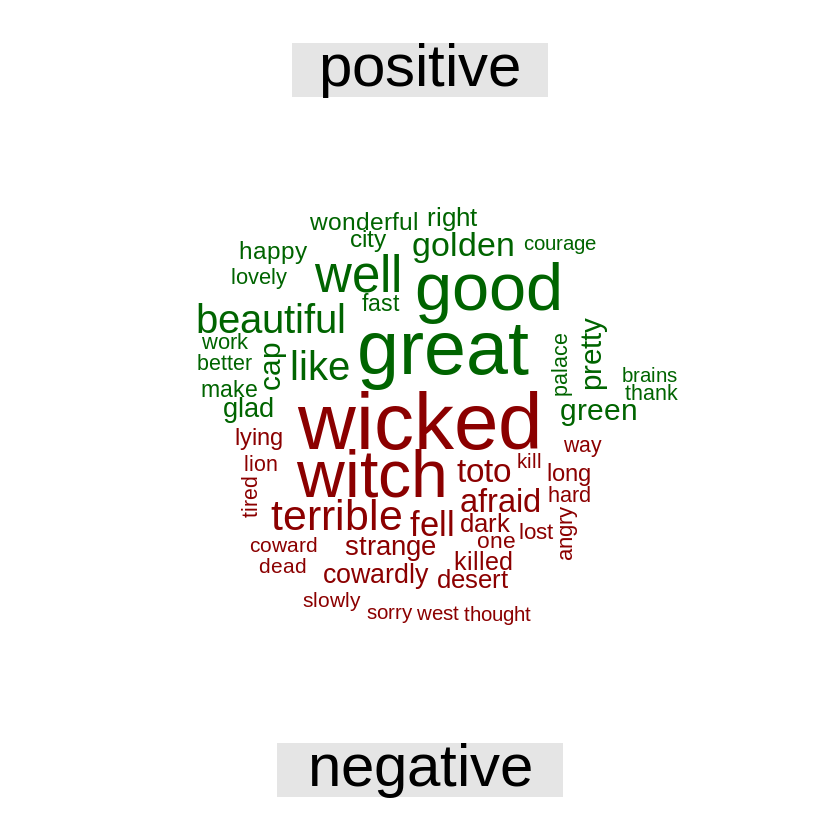

In [ ]:
# From previous steps
all_tdm <- oz_pol$all %>%
  select(text = text.var, polarity = polarity) %>% 
  pol_subsections() %>%
  VectorSource() %>% 
  VCorpus() %>% 
  TermDocumentMatrix(
    control = list(
      removePunctuation = TRUE,
      stopwords = stopwords(kind = "en")
    )
  ) %>%
  as.matrix() %>%
  set_colnames(c("positive", "negative"))
  
comparison.cloud(
  # Create plot from the all_tdm matrix
  all_tdm,
  # Limit to 50 words
  max.words = 50,
  # Use darkgreen and darkred colors
  colors = c("darkgreen", "darkred")
)

In [ ]:
all_tdm=readRDS("/content/all_tdm.rds")
all_tdm <- TermDocumentMatrix(
  # Create TDM from corpus
  all_corpus,
  control = list(
    # Yes, remove the punctuation
    removePunctuation = TRUE,
    # Use English stopwords
    stopwords = stopwords(kind = "en")
  )
) %>%
  # Convert to matrix
  as.matrix() %>%
  # Set column names
  set_colnames(c("positive", "negative"))

In [ ]:
head(all_tdm)

,positive,negative
able,1,2
abounding,1,0
abundance,1,0
accident,0,1
accidents,0,1
account,1,0


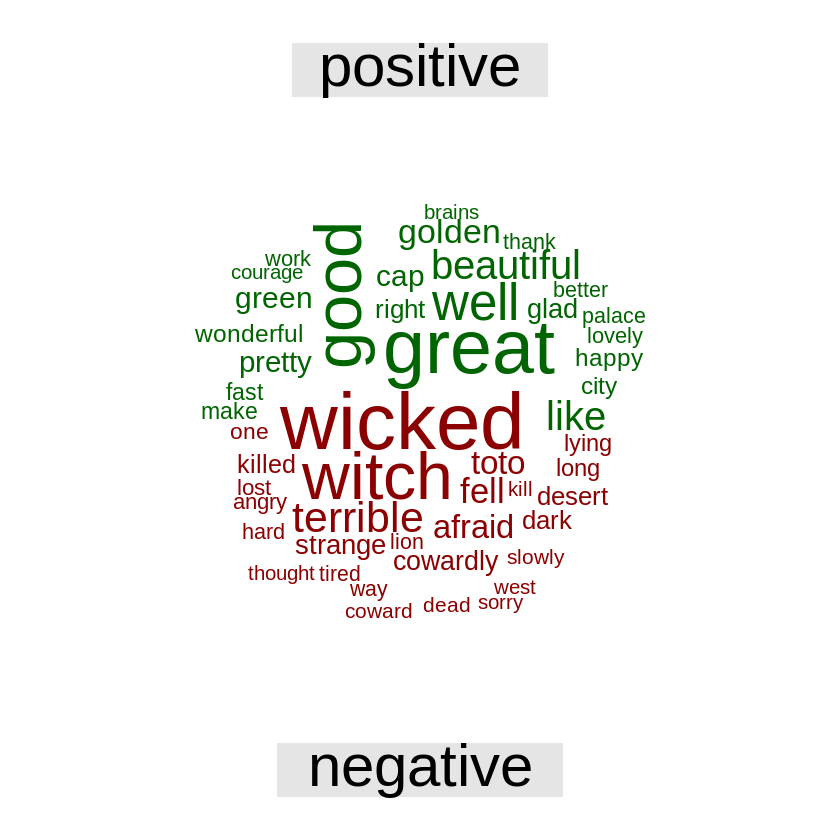

In [ ]:
library(wordcloud)
comparison.cloud(
  # Create plot from the all_tdm matrix
  all_tdm,
  # Limit to 50 words
  max.words = 50,
  # Use darkgreen and darkred colors
  colors = c("darkgreen", "darkred")
)

***Travail fantastique! Les nuages de mots sont un excellent moyen d'obtenir un aperçu de vos données.***

####**Introspection émotionnelle**

+ ***Dans cet exercice, vous allez au-delà des sous-ensembles sur le langage positif et négatif. Au lieu de cela, vous subdiviserez le texte en fonction de chacune des 8 émotions de la roue émotionnelle de Plutchik pour construire un visuel. Avec cette approche, vous obtiendrez plus de clarté dans l'utilisation des mots en mappant sur une émotion spécifique au lieu de simplement positive ou négative.***

+ **En utilisant le lexique de subjectivité de tidytext, "nrc", vous effectuez un inner_join() avec votre texte. Le lexique "nrc" a les 8 émotions plus les classes de termes positifs et négatifs. Vous devrez donc supprimer les mots positifs et négatifs après avoir effectué votre inner_join(). Une façon de le faire est d'utiliser la négation, !, et grepl().**

+ **La fonction "Global Regular Expression Print Logical", grepl(), renverra un vrai ou un faux si un modèle de chaîne est identifié dans chaque ligne. Dans cet exercice, vous chercherez un résultat positif OU négatif à l'aide de | opérateur, représentant "ou" comme indiqué ci-dessous. Souvent, cette ligne droite se trouve au-dessus de la touche Entrée d'un clavier. Depuis le ! la négation précède grepl(), le T ou le F est commuté de sorte que le "positif|négatif" soit supprimé au lieu d'être conservé.**

    Objet <- tibble %>%
      filter(!grepl("positif|négatif", nom_colonne))

+ **Ensuite, vous appliquez count() sur les mots identifiés avec pivot_wider() pour organiser le bloc de données.**

+ ***comparer.cloud() nécessite que son entrée ait des noms de ligne, vous devrez donc la convertir en base-R data.frame, en appelant data.frame() avec l'argument row.names.***

####**Instructions**
+ 1)
  + inner_join() moby à nrc.
  + En utilisant filter() avec une négation (!) et grepl() recherchez "positif|négatif". La colonne à rechercher s'appelle sentiment.
  + Utilisez count() pour compter par sentiment et terme.
  + Remodelez le cadre de données avec pivot_wider(), en passant names_from = sentiment, values_from = n et values_fill = 0.
  + Convertissez en bloc de données simple avec data.frame(), transformant la colonne de termes en noms de lignes.
  + Examinez moby_tidy en utilisant head().

+ 2)
  + À l'aide de moby_tidy, dessinez un compare.cloud().
  + Limitez-vous à 50 mots.
  + Augmentez la taille du titre à 1,5.

In [ ]:
moby_tidy <- moby %>%
  # Inner join to nrc lexicon
  inner_join(nrc, by = c("term" = "word"), multiple = "all") %>% 
  # Drop positive or negative
  filter(!grepl("positive|negative", sentiment)) %>% 
  # Count by sentiment and term
  count(sentiment, term) %>% 
  # Pivot sentiment, using n for values
  pivot_wider(names_from = sentiment, values_from = n, values_fill = 0) %>%
  # Convert to data.frame, making term the row names
  data.frame(row.names = "term")

# Examine
head(moby_tidy)

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
abandoned,7,0,0,7,0,7,0,0
abandonment,2,0,0,2,0,2,2,0
abhorrent,1,0,1,1,0,0,0,0
abomination,1,0,1,1,0,0,0,0
accursed,10,0,0,10,0,10,0,0
adverse,1,0,1,1,0,1,0,0


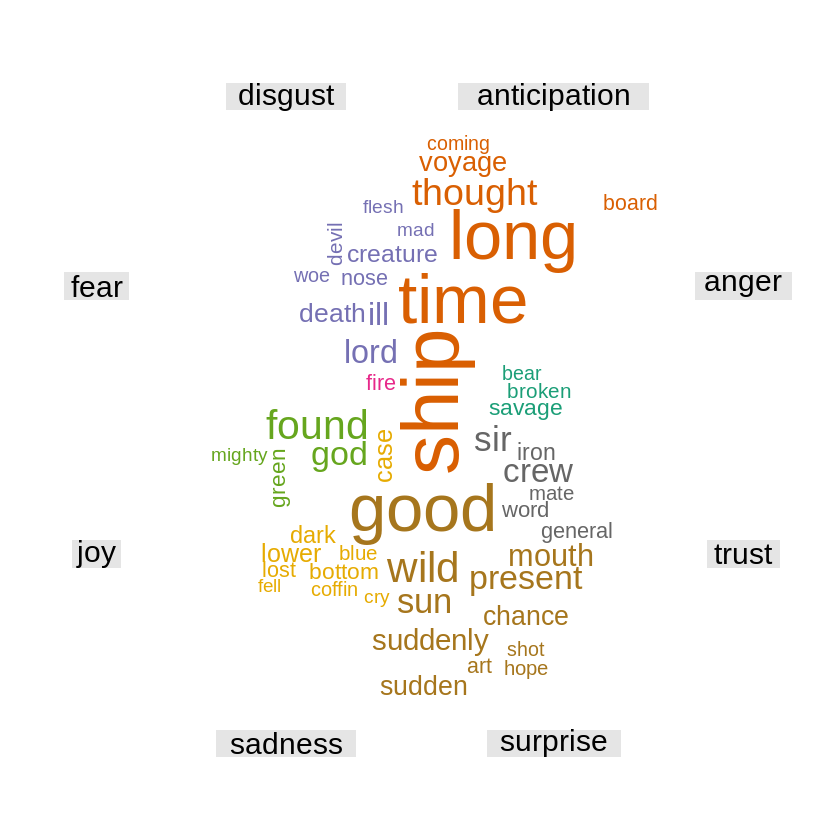

In [ ]:
moby_tidy <- m_dick_tidy %>% 
  mutate(document=as.numeric(document)) %>%
  inner_join(nrc, by = c("term" = "word"), multiple = "all") %>% 
  filter(!grepl("positive|negative", sentiment)) %>% 
  count(sentiment, term) %>% 
  pivot_wider(names_from = sentiment, values_from = n, values_fill = 0) %>%
  data.frame(row.names = "term")

# Plot comparison cloud
comparison.cloud(moby_tidy, max.words = 50, title.size = 1.5)

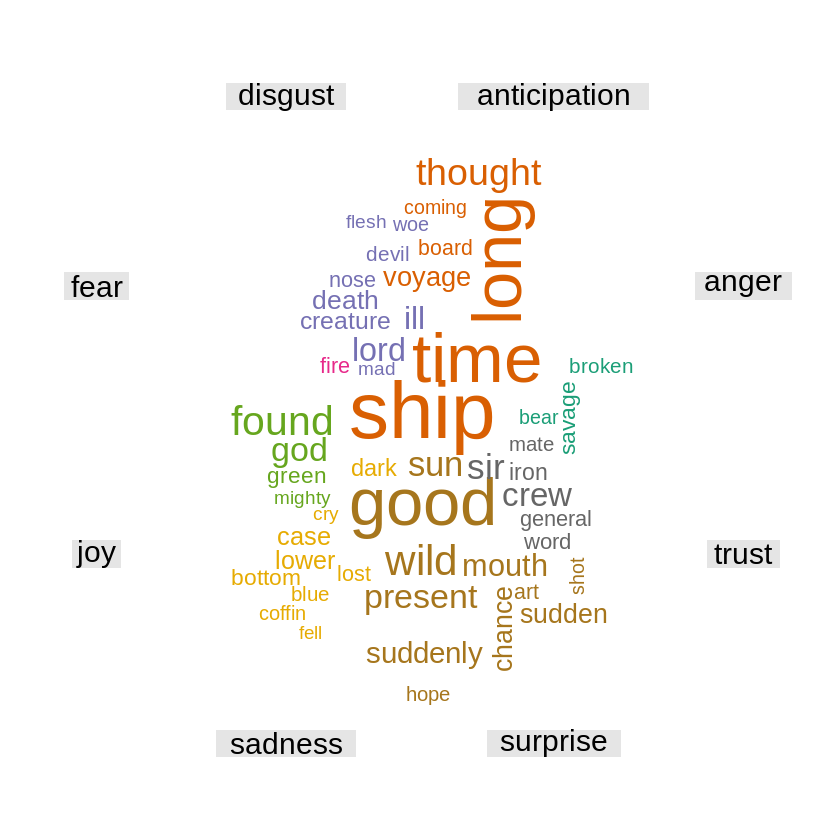

In [ ]:
# From previous step
moby_tidy <- moby %>%
  inner_join(nrc, by = c("term" = "word"), multiple = "all") %>% 
  filter(!grepl("positive|negative", sentiment)) %>% 
  count(sentiment, term) %>% 
  pivot_wider(names_from = sentiment, values_from = n, values_fill = 0) %>%
  data.frame(row.names = "term")

# Plot comparison cloud
comparison.cloud(moby_tidy, max.words = 50, title.size = 1.5)

####**Comparer et contraster le graphique à barres empilées**

+ ***Une autre façon de découper votre texte consiste à comprendre dans quelle mesure le ou les documents sont composés de mots positifs ou négatifs. Par exemple, une critique de restaurant peut avoir des aspects positifs tels que "la nourriture était bonne" mais continuer ensuite d'ajouter "le restaurant était sale, le personnel était désagréable et le parking était horrible". Par conséquent, vous voudrez peut-être comprendre quelle part d'un document est consacrée au langage positif par rapport au langage négatif. Dans cet exemple, il aurait un pourcentage négatif plus élevé que positif.***

+ **Une méthode pour ce faire consiste à compter () les mots positifs et négatifs, puis à diviser par le nombre de mots de subjectivité identifiés. Dans l'exemple de critique de restaurant, "bon" compterait comme 1 terme positif et "sale", "impoli" et "horrible" compteraient comme 3 termes négatifs. Un simple calcul vous amènerait à croire que la critique du restaurant est positive à 25% et négative à 75% puisqu'il y avait 4 termes de subjectivité.**

+ **Commencez par exécuter inner_join() sur une trame de données ordonnée unifiée contenant 4 livres, Agamemnon, Oz, Huck Finn et Moby Dick. Tout comme dans l'exercice précédent, vous utiliserez filter() et grepl().**

+ *Pour effectuer le count(), vous devez regrouper les données par livre, puis par sentiment. Par exemple, tous les mots positifs pour Agamemnon doivent être regroupés puis comptés afin que les mots positifs de tous les livres ne soient pas mélangés. Heureusement, vous pouvez passer plusieurs variables directement dans count().*

####**Instructions**

+ 3)

  + Jointure interne all_books au lexique, nrc.
  + Filtrez pour conserver les lignes où le sentiment contient "positif" ou "négatif". 
  + Autrement dit, utilisez grepl() sur la colonne de sentiment, en vérifiant sans la négation afin que "positif|négatif" soit conservé.
  + Comptez par livre et par sentiment.

+ 2)
  + Regroupez books_sent_count par livre.
  + Mutate pour ajouter une colonne nommée percent_positive. 
  + Cela devrait être calculé comme 100 fois n divisé par la somme de n.

+ 3)
  + À l'aide de book_pos, tracez percent_positive vs. book, en utilisant le sentiment comme couleur de remplissage.
  + Ajoutez une couche de colonnes avec geom_col().

In [ ]:
all_books=readRDS("/content/all_books.rds")

In [ ]:
# Review tail of all_books
tail(all_books)

term,document,count,author,book
<chr>,<chr>,<dbl>,<chr>,<chr>
ebooks,19117,1,twain,innocents_abroad
email,19117,1,twain,innocents_abroad
hear,19117,1,twain,innocents_abroad
new,19117,1,twain,innocents_abroad
newsletter,19117,1,twain,innocents_abroad
subscribe,19117,1,twain,innocents_abroad


In [ ]:
# Count by book & sentiment
books_sent_count <- all_books %>%
  # Inner join to nrc lexicon
  inner_join(nrc, by = c("term" = "word"), multiple = "all") %>% 
  # Keep only positive or negative
  filter(grepl("positive|negative", sentiment)) %>% 
  # Count by book and by sentiment
  count(book, sentiment)
  
# Review entire object
books_sent_count

book,sentiment,n
<chr>,<chr>,<int>
bartleby,negative,531
bartleby,positive,854
confidence_man,negative,3456
confidence_man,positive,5738
ct_yankee,negative,3985
ct_yankee,positive,6053
hamlet,negative,1666
hamlet,positive,2205
huck_finn,negative,2401


In [ ]:
# From previous step
books_sent_count <- all_books %>%
  inner_join(nrc, by = c("term" = "word"), multiple = "all") %>% 
  filter(grepl("positive|negative", sentiment)) %>% 
  count(book, sentiment)
  
book_pos <- books_sent_count %>%
  # Group by book
  group_by(book) %>% 
  # Mutate to add % positive column 
  mutate(percent_positive = 100 * n / sum(n) )

In [ ]:
head(book_pos)

book,sentiment,n,percent_positive
<chr>,<chr>,<int>,<dbl>
bartleby,negative,531,38.33935
bartleby,positive,854,61.66065
confidence_man,negative,3456,37.58973
confidence_man,positive,5738,62.41027
ct_yankee,negative,3985,39.69914
ct_yankee,positive,6053,60.30086


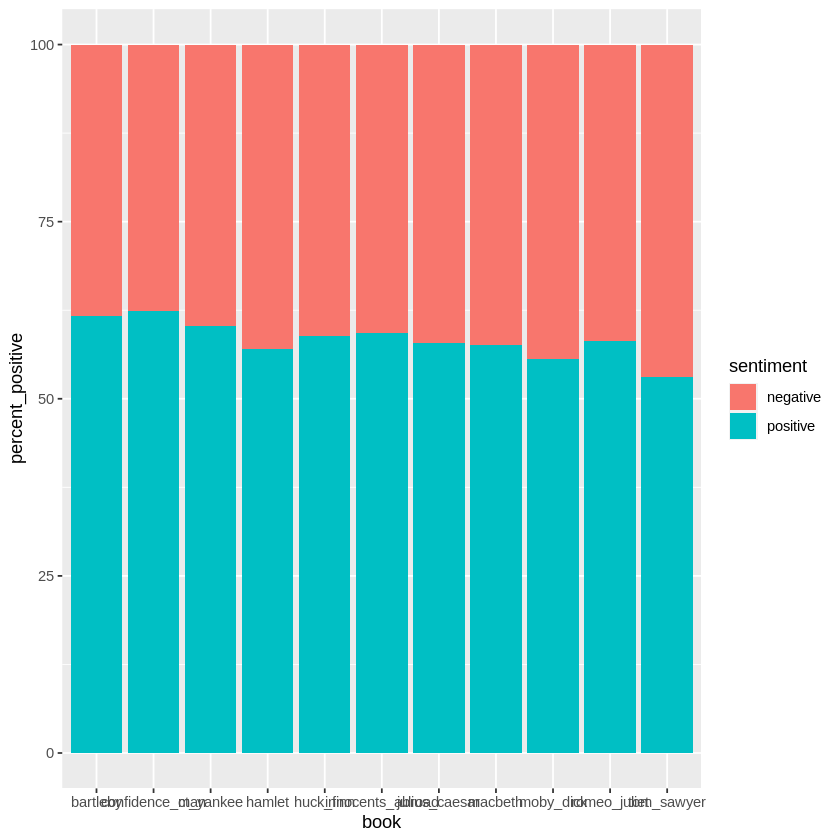

In [ ]:
# From previous steps
book_pos <- all_books %>%
  inner_join(nrc, by = c("term" = "word"), multiple = "all") %>% 
  filter(grepl("positive|negative", sentiment)) %>% 
  count(book, sentiment) %>%
  group_by(book) %>% 
  mutate(percent_positive = 100 * n / sum(n))
  
# Plot percent_positive vs. book, filled by sentiment
ggplot(book_pos, aes(book, percent_positive, fill = sentiment)) +  
  # Add a col layer
  geom_col()

####**Interprétation d’une densité de noyau, de diagrammes en boîte et de cartes radar**

####**1. Interprétation d’une densité de noyau, de diagrammes en boîte et de cartes radar**
+ Ceci est la dernière section du chapitre 3.

####**2. Plus de visualisations**

+ Dans cette section, vous faites 4 visuels. Le premier est un diagramme de densité du noyau. Ceux-ci sont bons pour comprendre les distributions. 

+ En fait, les diagrammes de densité de noyau sont comme des histogrammes, mais vous n’avez pas à vous soucier de choisir une taille de bac appropriée. 

+ Deuxièmement, vous examinez un diagramme en boîte pour comparer plusieurs distributions de sentiments à la fois. 

+ Troisièmement, vous utiliserez la bibliothèque de radarchart javascript pour créer un visuel similaire à Wheel of Emotion de Plutchik. 

+ Vous terminerez ce chapitre en créant un treemap visualisant plusieurs dimensions simultanément.

####**3. Graphiques de densité du noyau vs histogramme**

+ Un diagramme de densité de noyau est utilisé pour comprendre la distribution d’une valeur. 

+ Vous pensez peut-être à vous-même... N’avons-nous pas d’histogrammes pour cela? Pourquoi s’embêter ? 

+ Eh bien, un diagramme de densité du noyau peut être considéré comme un histogramme lissé. 

+ Bien sûr, les histogrammes sont excellents, mais ils sont biaisés car les valeurs doivent être regroupées en groupes.

####**4. Graphiques de densité du noyau vs histogramme**

+ Considérez cette distribution. Un histogramme avec 10 bacs semble correct, mais un histogramme avec peu de bacs commence à déformer ce que vous savez sur la distribution globale. 

+ En revanche, le diagramme de densité du noyau n’a pas de bacs. 

+ Ce graphique estime la fonction de densité de probabilité qui semble intimidante mais est simple. 

+ La surface totale sous la courbe est 1. La probabilité qu’une valeur soit comprise entre x1 et x2 est l’aire sous la courbe entre ces deux points. 

+ Comme il s’agit d’une probabilité continue au lieu de valeurs discrètes, la courbe est lissée et non classée. 

+ En conséquence, le visuel n’est pas biaisé de cette façon.

####**5. Tracé en boîte**

+ Un défi avec les diagrammes de densité est que l’examen simultané de plusieurs distributions peut être difficile. 

+ Une autre façon d’examiner une distribution consiste à utiliser un diagramme en boîte, parfois appelé diagramme en boîte et moustaches. 

+ La comparaison de plusieurs distributions peut être plus facile avec les boxplots car ils sont compacts. 

+ Un moyen facile de comparer plusieurs distributions est d’utiliser un boxplot. 

+ Pensez à un diagramme de boîte comme une distribution latérale normale. 

+ La ligne sombre au milieu représente la valeur médiane de la distribution. 

+ La boîte s’étend de chaque côté et se termine au quartile suivant au-dessus et au-dessous de la médiane. 

+ Ainsi, 50% des données sont capturées dans la boîte elle-même. 

+ Un autre quartile dans chaque direction s’étend de la boîte et est représenté par des lignes ou des moustaches. 

+ Dans de nombreux diagrammes de boîtes, tous les points après les moustaches représentent des valeurs aberrantes, ce qui signifie qu’ils ne sont pas dans les quartiles.

####**6. Roue radar de l’émotion**


+ En regardant le cadre émotionnel de Plutchik, vous pouvez imiter quelque chose de similaire avec un tableau radar. 

+ Un graphique radar, parfois appelé graphique en araignée, permet au public de comparer succinctement plusieurs valeurs. 

+ Dans ce cas, Plutchik a 8 émotions primaires. 

+ Faire un graphique à barres avec 8 barres différentes pourrait devenir encombré, surtout si vous compariez 2 documents... Cela signifierait que vous avez 16 bars! 

+ Au lieu de cela, dans une carte radar, vous avez une seule ligne autour de 8 axes. 

+ Dans cet exercice, vous comparez Huck Finn et Moby Dick à travers les 8 émotions principales. Avec un tableau radar, vous serez en mesure de savoir rapidement lequel a le plus de mots de confiance ou de colère.

####**7. Treemaps**

+ Enfin, terminons avec une arborescence. Dans un treemap, le public peut facilement consommer plusieurs dimensions. 

+ Il y a 3 dimensions dans un treemap qui sont réglables. L’un est la taille du point de données. J’aime utiliser le nombre de mots dans un document pour indiquer la taille. 

+ Cela aide à comprendre l’effort des auteurs, plus il y a de mots, plus l’effort est important. 

+ Une autre dimension, la couleur, démontre la polarité. 

+ Enfin, les cases de la treemap sont regroupées dans une troisième dimension. 

+ Supposons que vous ayez une collection de publications Facebook, de tweets et de descriptions Pinterest. 

+ Un treemap peut examiner toutes ces sources textuelles tout en conservant le groupe. Un long message Facebook négatif serait dans le groupe Facebook, serait plus grand que les autres cases du groupe et serait rouge puisqu’il est négatif.

####**8. Entraînons-nous!**

####**Diagramme de densité de noyau**

+ ***Maintenant que vous avez découvert un diagramme de densité de noyau, vous pouvez en créer un ! N'oubliez pas que c'est comme un histogramme lissé mais qu'il n'est pas affecté par la binwidth. Cet exercice vous aidera à construire un diagramme de densité de noyau à partir des valeurs de sentiment.***

+ **Dans cet exercice, vous allez tracer 2 densités de noyaux. Un pour Agamemnon et un autre pour Le Magicien d'Oz. Pour les deux, vous effectuerez un inner_join() avec le lexique "afinn". Rappelez-vous que le lexique "afinn" a des termes notés de -5 à 5. Une fois dans un format bien rangé, les deux livres retiendront les mots et les scores correspondants pour le lexique.**

+ **Après cela, vous devez lier les résultats dans un cadre de données plus grand à l'aide de bind_rows() et créer un tracé avec ggplot2.**

+ **À partir du visuel, vous pourrez comprendre quel livre utilise un langage plus positif ou négatif. Il y a clairement un chevauchement lorsque des choses négatives arrivent à Dorothy, mais vous pouvez en déduire que la densité du noyau démontre une plus grande probabilité de langage positif dans le Magicien d'Oz par rapport à Agamemnon.**

+ *Nous avons respectivement chargé ag et oz comme versions ordonnées d'Agamemnon et du Magicien d'Oz, et créé afinn comme sous-ensemble du lexique "afinn" de tidytext.*

####**Instructions**
+ 1) 
  + Jointure interne ag au lexique, afinn, affectation à ag_afinn.
  + Faites de même pour Le Magicien d'Oz. C'est le même code, mais en commençant par le jeu de données oz et en l'attribuant à oz_afinn.
  + Utilisez bind_rows() pour combiner ag_afinn à oz_afinn. 
  + Définissez l'argument .id sur "book" pour créer une nouvelle colonne avec le nom de chaque livre.

+ 2)
  + En utilisant all_df, tracer la valeur, en utilisant book comme couleur de remplissage.
  + Réglez la transparence alpha sur 0,3.

In [ ]:
afinn=read.csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vS4tUUP2pJ1A6crxDKSY6Be7Rp2QlZjase7ubLcPUXcnwE7xHKkXGuV3V8WpxsJFQpOEDuFpxb2qfbh/pub?gid=0&single=true&output=csv")
ag=ag_tidy

In [ ]:
ag_afinn <- ag %>% 
  # Inner join to afinn lexicon
  inner_join(afinn, by = c("term" = "word"))

head(ag_afinn)

document,term,count,value
<chr>,<chr>,<dbl>,<int>
7,waste,1,-1
8,god,1,1
11,lonely,1,-2
13,fire,1,-2
13,great,1,3
13,heavenly,1,4


In [ ]:
oz_afinn <- oz %>% 
  # Inner join to afinn lexicon
  inner_join(afinn, by = c("term" = "word")) 

head(oz_afinn)

document,term,count,value
<chr>,<chr>,<dbl>,<int>
1,wonderful,1,4
15,saved,1,2
17,rescue,1,2
18,cowardly,1,-2
19,great,1,3
24,wicked,1,-2


In [ ]:
# Combine
all_df <- bind_rows(agamemnon = ag_afinn, oz = oz_afinn, .id = "book")

head(all_df)

book,document,term,count,value
<chr>,<chr>,<chr>,<dbl>,<int>
agamemnon,7,waste,1,-1
agamemnon,8,god,1,1
agamemnon,11,lonely,1,-2
agamemnon,13,fire,1,-2
agamemnon,13,great,1,3
agamemnon,13,heavenly,1,4


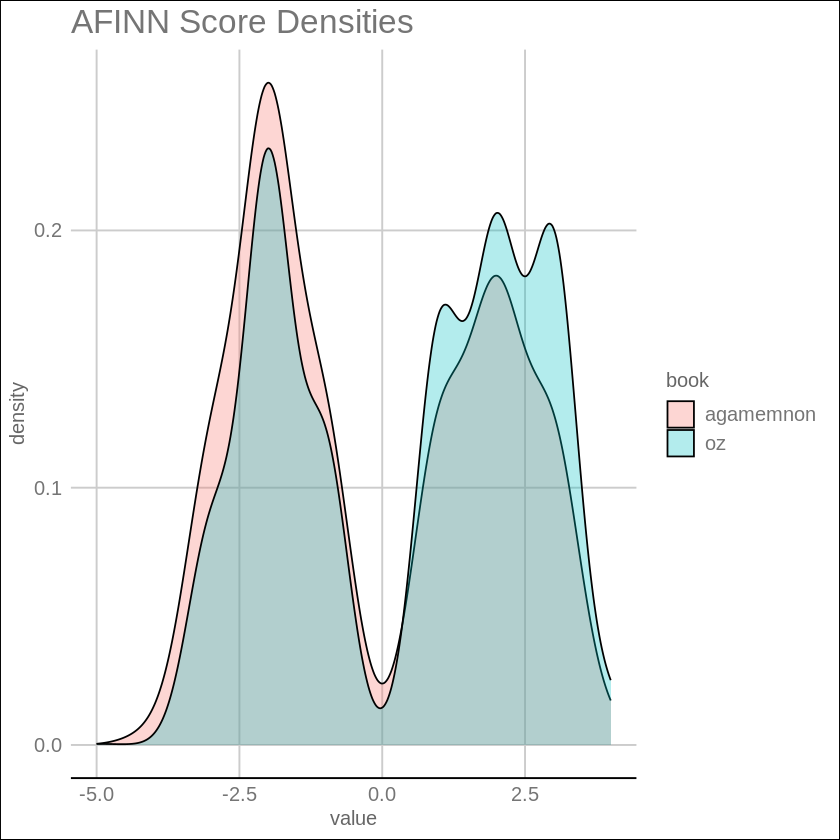

In [ ]:
# From previous step
all_df <- bind_rows(
  agamemnon = ag %>% inner_join(afinn, by = c("term" = "word")), 
  oz = oz %>% inner_join(afinn, by = c("term" = "word")),
  .id = "book"
)

# Plot value, filled by book
ggplot(all_df, aes(value, fill = book)) + 
  # Set transparency to 0.3
  geom_density(alpha = 0.3) + 
  theme_gdocs() +
  ggtitle("AFINN Score Densities")

####**Boîte à moustaches**

+ ***Un moyen simple de comparer plusieurs distributions consiste à utiliser une boîte à moustaches. Ce code vous aidera à construire plusieurs boîtes à moustaches pour créer un visuel compact.***

+ **Dans cet exercice, l'objet all_book_polarity est déjà chargé. Le bloc de données contient deux colonnes, livre et polarité. Il comprend tous les livres auxquels la fonction polarity() de qdap est appliquée. Voici les 3 premières rangées du grand objet.**

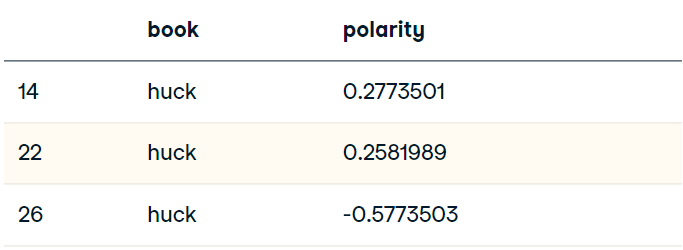

+ **Cet exercice présente tapply() qui vous permet d'appliquer des fonctions sur un tableau irrégulier. Vous saisissez un vecteur de valeurs, puis un vecteur de facteurs. Pour chaque facteur, combinaison de valeurs, le troisième paramètre, une fonction comme min(), est appliqué. Par exemple, voici du code avec tapply() utilisé sur deux vecteurs.**

      f1 <- as.factor(c("Group1", "Group2", "Group1", "Group2"))
      stat1 <- c(1, 2, 1, 2)
      tapply(stat1, f1, sum)

*Le résultat est un tableau où Group1 a une valeur de 2 (1+1) et Group2 a une valeur de 4 (2+2).*

####**Instructions**

+ Puisqu'il est déjà chargé, examinez all_book_polarity avec str().

+ En utilisant tapply(), 

  + transmettez all_book_polarity$polarity,

  + all_book_polarity$book 

  + et la fonction summary(). 
  
+ Cela imprimera les statistiques récapitulatives des 4 livres en fonction de leurs scores de polarité(). 

+ Vous vous attendriez à voir Oz et Huck Finn avoir des moyennes plus élevées qu'Agamemnon ou Moby Dick. 

+ Portez une attention particulière à la médiane.
Créez une boîte à moustaches avec ggplot() en passant all_book_polarity.


+ L'esthétique doit être aes(x = livre, y = polarité).


+ En utilisant un + ajoutez le geom_boxplot() avec col = "darkred". 

+ Portez une attention particulière à la ligne sombre dans chaque case représentant la médiane.


+ Ajoutez ensuite une autre couche appelée geom_jitter() pour ajouter des points pour chacun des mots.

In [ ]:
all_book_polarity=readRDS("/content/all_book_polarity.rds")

In [ ]:
# Examine
str(all_book_polarity)

'data.frame':	14437 obs. of  2 variables:
 $ book    : Factor w/ 4 levels "huck","agamemnon",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ polarity: num  0.277 0.258 -0.577 0.25 0.516 ...


In [ ]:
# Summary by document
tapply(all_book_polarity$polarity, all_book_polarity$book, summary)

$huck
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.38695 -0.25820  0.23570  0.04156  0.26726  1.60357 

$agamemnon
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.4667 -0.3780 -0.3333 -0.1266  0.3333  1.2247 

$moby
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.13333 -0.28868 -0.25000 -0.02524  0.28868  1.84752 

$oz
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.2728 -0.2774  0.2582  0.0454  0.2887  1.1877 


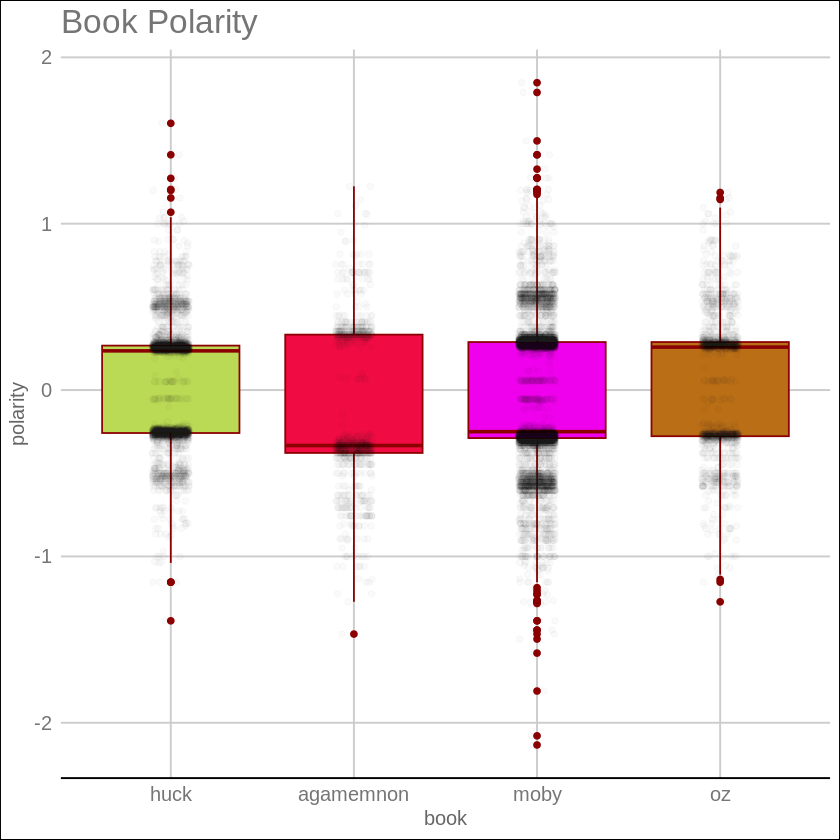

In [ ]:
# Box plot
ggplot(all_book_polarity, aes(x = book, y = polarity)) +
  geom_boxplot(fill = c("#bada55", "#F00B42", "#F001ED", "#BA6E15"), col = "darkred") +
  geom_jitter(position = position_jitter(width = 0.1, height = 0), alpha = 0.02) +
  theme_gdocs() +
  ggtitle("Book Polarity")

####**Carte radar**

+ ***Vous souvenez-vous de [la roue des émotions de Plutchik](#https://en.wikipedia.org/wiki/Robert_Plutchik#/media/File:Plutchik-wheel.svg) ? Le lexique NRC contient les 8 émotions correspondant au premier anneau de la roue. Auparavant, vous avez créé un compare.cloud() en fonction des 8 émotions principales. Vous allez maintenant créer un graphique en radar similaire à la roue de cet exercice.***

+ **Un graphique en radar est une représentation bidimensionnelle de données multidimensionnelles (au moins 3). Dans ce cas, le décompte des différentes émotions pour un livre est représenté dans le tableau. À l'aide d'un graphique en radar, vous pouvez passer en revue les 8 émotions simultanément.**

+ **Comme précédemment, nous avons chargé le lexique "nrc" en tant que nrc et moby_huck qui est une version combinée soignée de Moby Dick et Huck Finn.**

+ **Dans cet exercice, vous utilisez à nouveau un grepl() inversé pour supprimer les classes émotionnelles "positives|négatives" du graphique. Pour rappel, voici un exemple :**

      object <- tibble %>%
        filter(!grepl("positive|negative", column_name))

+ Cet exercice réintroduit pivot_wider() qui réorganise les mots émotionnels comptabilisés. En guise de rappel, considérez ces données brutes appelées datacamp.

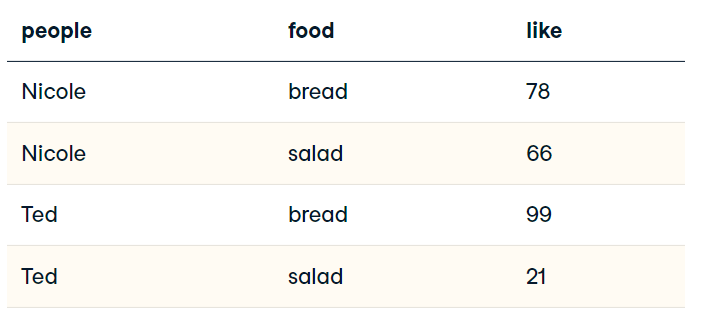

+ Si vous avez appliqué pivot_wider() comme dans 
      datacamp %>% pivot_wider(names_from = people, values_from = like) les données ressemblent à ceci.

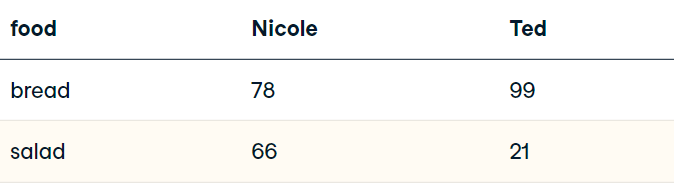

####**Instructions**

+ 1)
  + Passez en revue les lignes 945 à 950 de moby_huck en utilisant des crochets.

  + Créez des partitions en dirigeant moby_huck vers [inner_join()].(https://www.rdocumentation.org/packages/dplyr/topics/join) avec nrc. 

  + Spécifiez le paramètre by comme étant "term = "word".

  + Écrasez les scores en les redirigeant vers filter(). Dans filter(), annulez grepl() en utilisant le modèle "positif|négatif" appliqué à la colonne de sentiment.

  + Appliquez un autre%>% en utilisant pivot_wider() avec names_from = book, values_from = n, values_fill = 0.

+ 2)
  + Appelez chartJSRadar() sur les scores qui est un [htmlwidget](#http://www.htmlwidgets.org/showcase_dygraphs.html) du package radarchart.

In [ ]:
moby_huck=df %>% filter(book=="moby_dick")
# Review tail of moby_huck
tail(moby_huck)

term,document,count,author,book
<chr>,<chr>,<dbl>,<chr>,<chr>
ebooks,21574,1,melville,moby_dick
email,21574,1,melville,moby_dick
hear,21574,1,melville,moby_dick
new,21574,1,melville,moby_dick
newsletter,21574,1,melville,moby_dick
subscribe,21574,1,melville,moby_dick


In [ ]:
# Review tail of moby_huck
moby_huck[945:950,]

term,document,count,author,book
<chr>,<chr>,<dbl>,<chr>,<chr>
shabby,178,1,melville,moby_dick
voyage,178,1,melville,moby_dick
whaling,178,1,melville,moby_dick
high,179,1,melville,moby_dick
magnificent,179,1,melville,moby_dick
parts,179,1,melville,moby_dick


In [ ]:
# Perform join
scores <- moby_huck %>% 
  # Inner join to lexicon
  inner_join(nrc, by = c("term" = "word"), multiple = "all")

# Filter, count and spread the data 
scores %>% 
  # Drop positive or negative sentiments
  filter(!grepl("positive|negative", sentiment)) %>% 
  # Count by book and sentiment
  count(book, sentiment) %>% 
  # Pivot book, using n as values
  pivot_wider(names_from = book, values_from = n, values_fill = 0)

sentiment,moby_dick
<chr>,<int>
anger,2811
anticipation,4426
disgust,1996
fear,4177
joy,2781
sadness,3306
surprise,2074
trust,4784


In [ ]:
devtools::install_github("MangoTheCat/radarchart")
install.packages("treemap")

In [ ]:
# From the previous steps
scores <- moby_huck %>% 
  inner_join(nrc, by = c("term" = "word"), multiple = "all") %>% 
  filter(!grepl("positive|negative", sentiment)) %>% 
  count(book, sentiment) %>% 
  pivot_wider(names_from = book, values_from = n, values_fill = 0)

In [ ]:
# JavaScript radar chart
library(radarchart)
chartJSRadar(scores)

HTML widgets cannot be represented in plain text (need html)

####**Treemaps pour des groupes de documents**

+ ***Vous vous retrouverez souvent à travailler avec des documents en groupes, tels que l'auteur, le produit ou la société. Cet exercice permet de se familiariser avec le texte tout en conservant les groupes dans un visuel compact. Par exemple, avec les avis clients regroupés par produit, vous pouvez explorer plusieurs dimensions des avis clients en même temps. Vous pouvez d'abord calculer la polarité () des avis. Une autre dimension peut être la longueur. La longueur du document peut démontrer l'intensité émotionnelle. Si un client laisse un court "super chaussures!" on pourrait en déduire qu'ils sont en fait moins enthousiastes par rapport à une critique positive plus longue. Vous pouvez également regrouper les avis par type de produit, comme les chaussures pour femmes, hommes et enfants. Une arborescence vous permet d'examiner toutes ces dimensions.***

+ **Pour l'analyse de texte, dans un treemap, chaque case individuelle représente un document tel qu'un tweet. Les documents sont regroupés d'une manière telle que l'auteur. La taille de chaque case est déterminée par une valeur numérique telle qu'un nombre de mots ou de lettres. Les couleurs individuelles sont déterminées par un score de sentiment.**

+ *Après avoir organisé le tibble, vous utilisez la bibliothèque treemap contenant la fonction treemap() pour créer le visuel. L'exemple de code ci-dessous déclare les données, les variables de regroupement, la taille, la couleur et d'autres aspects esthétiques.*

        treemap(
          data_frame,
          index = c("group", "individual_document"),
          vSize = "doc_length",
          vColor = "avg_score",
          type = "value",
          title = "Sentiment Scores by Doc",
          palette = c("red", "white", "green")
        )


+ *L'objet all_books préchargé contient un corpus combiné au format ordonné avec 4 livres de Shakespeare, 3 Melville et 4 Twain. Sur la base de la carte arborescente, vous devriez être en mesure de dire qui écrit des livres plus longs, et la polarité de l'auteur dans son ensemble et pour des livres individuels.*

####**Consignes** 
+ 1)

  + Calculez la longueur de chaque livre dans un nouvel objet appelé book_length en utilisant count() avec la colonne book.

+ 2)

  + Jointure interne all_books au lexique, afinn.
  + Regrouper par auteur et livre.
  + Utilisez resume() pour calculer la valeur_moyenne en tant que moyenne() de la valeur.
  + Jointure interne à nouveau, cette fois à book_length. 
  + Inscrivez-vous par la colonne des livres.


+ 3)

  + Dessinez une arborescence en définissant les arguments suivants.
  + Utilisez le book_tree de l'étape précédente.
  + Spécifiez les colonnes d'index d'agrégation comme "auteur" et "livre".
  + Spécifiez la colonne de taille de sommet, vSize, comme "n".
  + Spécifiez la colonne de couleur de sommet, vColor, en tant que "mean_value".
  + Spécifiez un mappage direct de vColor vers la palette en définissant type="value".



In [ ]:
book_length <- all_books %>%
  # Count number of words per book
  count(book)
  
# Examine the results
book_length

book,n
<chr>,<int>
bartleby,8871
confidence_man,48834
ct_yankee,58229
hamlet,18725
huck_finn,55198
innocents_abroad,99031
julius_caesar,13165
macbeth,12240
moby_dick,109996


In [ ]:
book_tree <- all_books %>% 
  # Inner join to afinn lexicon
  inner_join(afinn, by = c("term" = "word")) %>% 
  # Group by author, book
  group_by(author, book) %>%
  # Calculate mean book value
  summarize(mean_value = mean(value)) %>% 
  # Inner join by book
  inner_join(book_length, by = "book")

# Examine the results
book_tree

`summarise()` has grouped output by 'author'. You can override using the
`.groups` argument.


author,book,mean_value,n
<chr>,<chr>,<dbl>,<int>
melville,bartleby,0.09617918,8871
melville,confidence_man,0.48369767,48834
melville,moby_dick,0.14427077,109996
shakespeare,hamlet,0.07786484,18725
shakespeare,julius_caesar,0.06035768,13165
shakespeare,macbeth,0.20620843,12240
shakespeare,romeo_juliet,0.15112705,16870
twain,ct_yankee,0.18942149,58229
twain,huck_finn,0.07272727,55198


In [ ]:
library(treemap)

`summarise()` has grouped output by 'author'. You can override using the
`.groups` argument.


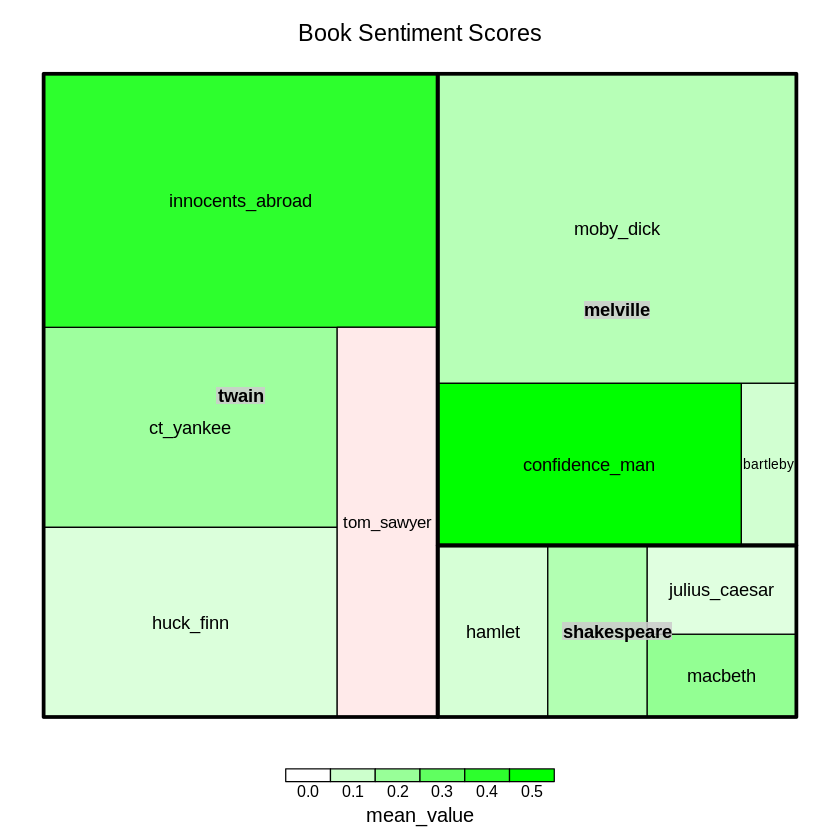

In [ ]:
# From previous steps
book_length <- all_books %>%
  count(book)
book_tree <- all_books %>% 
  inner_join(afinn, by = c("term" = "word")) %>% 
  group_by(author, book) %>%
  summarize(mean_value = mean(value)) %>% 
  inner_join(book_length, by = "book")

treemap(
  # Use the book tree
  book_tree,
  # Index by author and book
  index = c("author", "book"),
  # Use n as vertex size
  vSize = "n",
  # Color vertices by mean_value
  vColor = "mean_value",
  # Draw a value type
  type = "value",
  title = "Book Sentiment Scores",
  palette = c("red", "white", "green")
)

###**Mise à jour sur le flux de travail d’exploration de texte**


####**1. Mise à jour sur le flux de travail d’exploration de texte**

+ ***Le dernier chapitre ! Merci de vous y être tenu jusqu’à présent!***

####**2. Jusqu’à présent ...**

+ Dans le chapitre 1, vous avez appris la fonction polarité() de qdap, un lexique de subjectivité de base et des décalages de valence. 

+ Ensuite, vous avez appris un peu sur le tidyverse en faisant des jointures intérieures avec 3 lexiques subjectifs. 

+ Dans le dernier chapitre, vous avez fait beaucoup plus d’analyse des sentiments, mais vous avez ajouté une couche de code pour créer des visuels.

####**3. Étude de cas**

+ Dans ce dernier chapitre, vous appliquez vos nouvelles compétences à une étude de cas réelle. 

+ Plus précisément, vous avez un appartement chic à Boston et vous envisagez de le louer sur une plate-forme de partage populaire. 

+ Avant de le faire, vous voulez savoir ce qui fait une bonne expérience de location.

####**4. Le flux de travail d’exploration de texte**

+ Vous souvenez-vous du flux de travail d’exploration de texte du cours sac de mots? 

+ Vous y avez appris cette carte mentale démontrant comment l’exploration de texte est le processus de passage d’un état non organisé à un état organisé. 

+ Les analyses de sentiment que vous avez apprises dans ce cours sont des techniques alignées sur l’extraction de fonctionnalités dans ce flux de travail.

####**5. 6 étapes définies**
+ Plus concrètement, le flux de travail d’exploration de texte comprend six étapes. 

+ **La première consiste à définir le problème et les objectifs spécifiques du projet**. 

  + Sans cela, vous pourriez vous décevoir ou décevoir vos parties prenantes. 

+ **Deuxièmement, identifiez le texte à analyser**. 

  + Il y a tellement de texte dont vous avez besoin pour encadrer clairement votre source et vous assurer que vous comprenez la façon dont la langue y est utilisée. 

  + Par exemple, les documents juridiques utilisent des termes différents de Twitter, ce qui est tout à fait différent des pages Wikipédia et ainsi de suite. 

+ **Troisièmement, organisez le texte. Dans le cours d’exploration de texte précédent, vous utilisiez un TDM ou un DTM.** 

  + Dans ce cours, vous avez analysé les vecteurs, les TDM et ajouté l’objet de données ordonné appelé tibble. 

+ **Quatrièmement, vous extrayez des caractéristiques du texte.**

  + C’est l’étape dans laquelle vous examinez le sentiment et la polarité du texte. 

  + Les mots identifiés à partir des lexiques de subjectivité et des scores de polarité sont des caractéristiques que vous avez apprises à partir des données. 

+ **Cinquièmement, vous analysez les artefacts de données tels que les visuels, les valeurs de fréquence ou les statistiques récapitulatives des entités extraites**. 

+ **Enfin, reliez l’ensemble du processus à l’énoncé du problème d’origine. Suivre ces étapes améliorera vos chances de réussite d’un projet d’exploration de texte, y compris l’analyse des sentiments.**

####**6. Étape 1 : Définissez votre problème**

+ ***La première étape consiste à définir votre énoncé de problème ou les informations que vous espérez obtenir du projet d’exploration de texte. Dans le prochain exercice, on vous demandera d’identifier un énoncé de problème approprié. Gardez à l’esprit que vous voulez en savoir plus sur les propriétés locatives pour voir comment votre appartement se compare.***

####**7. Étape 2 : Identifiez votre texte**

+ ***L’étape 2 consiste à identifier vos sources textuelles. Vous pouvez utiliser n’importe quel texte libre qui, selon vous, peut vous aider à répondre à votre énoncé de problème. Cependant, nous avons chargé un millier de locations de propriétés pour vous. Tout ce que vous avez à faire est de les charger et de les examiner. Le dernier exercice de cette section vous permet d’effectuer rapidement un score de polarité sur les avis de location et de faire un tracé. Cela peut vous aider à comprendre les généralités sur le texte que vous allez analyser plus en détail.***

####**8. Entraînons-nous!**

###**EXRCICES**


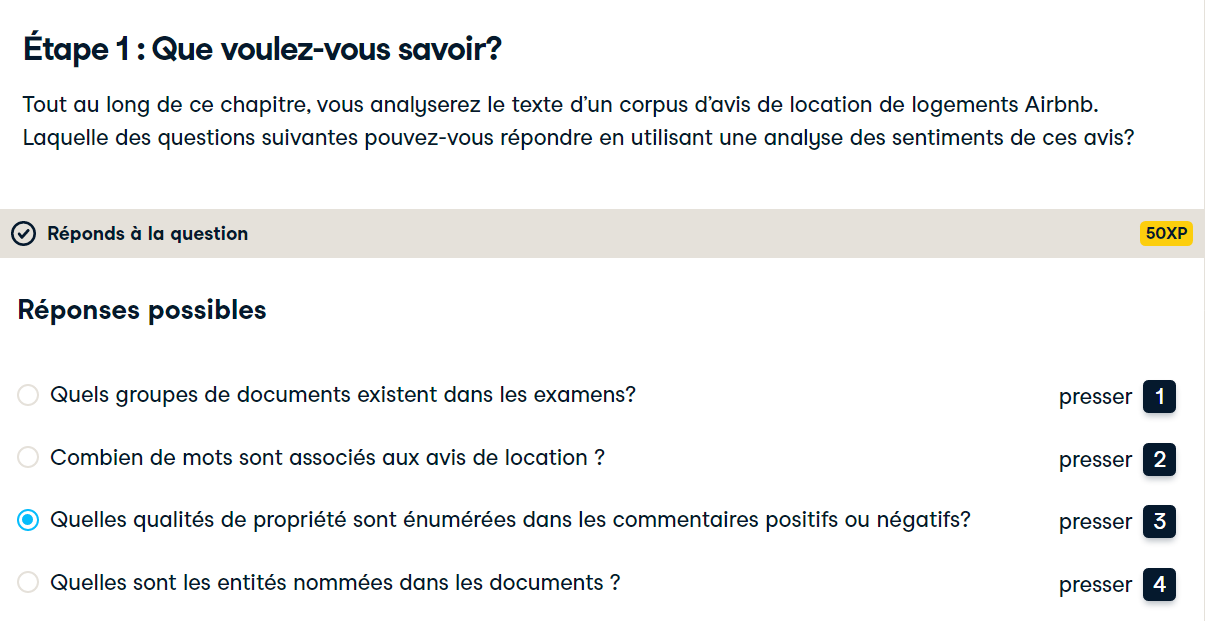

***Votre réponse est positivement incroyable! L’analyse des sentiments est axée sur les textes positifs et négatifs.***

####**Étape 2 : Identifiez les sources de texte**

+ ***Dans ce court exercice, vous chargerez et examinerez un petit corpus d'avis de location de propriétés dans les environs de Boston. J'espère que vous connaissez déjà read.csv() qui vous permet de charger un fichier séparé par des virgules. Dans cet exercice, vous devrez également spécifier stringsAsFactors = FALSE lors du chargement du corpus. Cela garantit que les avis sont des vecteurs de caractères et non des facteurs. Cela peut sembler banal, mais le but de ce chapitre est de vous permettre d'effectuer un flux de travail complet du début à la fin, alors commençons par l'ingestion de données !***

+ ***Ensuite, vous appliquez simplement str() pour revoir la structure du bloc de données. C'est une fonction pratique pour afficher de manière compacte les valeurs initiales et les types de classe pour les vecteurs.***

+ ***Enfin, vous appliquerez dim() pour imprimer les dimensions du bloc de données. Pour un data frame, votre console imprimera le nombre de lignes et le nombre de colonnes.***

+ *D'autres fonctions telles que head(), tail() ou summary() sont souvent utilisées pour l'exploration de données, mais dans ce cas, nous gardons l'examen court afin que vous puissiez passer à l'analyse amusante des sentiments !*

####**Instructions**

+ Les avis de location de propriétés à Boston sont stockés dans un fichier CSV localisé par la variable prédéfinie bos_reviews_file.

+ Chargez les avis sur la propriété à partir de bos_reviews_file avec read.csv(). 

  + Appelez l'objet bos_reviews. 
  + Assurez-vous de transmettre le paramètre stringsAsFactors = FALSE afin que les commentaires ne soient pas des facteurs uniques.


+ Examinez la structure du bloc de données à l'aide de la fonction de base str() appliquée à bos_reviews.

+ Découvrez le nombre de révisions avec lesquelles vous travaillez en appelant dim() sur bos_reviews.

In [ ]:
help

In [ ]:
# bos_reviews_file has been pre-defined
bos_reviews_file = "/content/bos_reviews.rds"
#bos_reviews_file = load(bos_reviews_file)
# load raw text
bos_reviews <- readRDS(bos_reviews_file) #, stringsAsFactors = FALSE

In [ ]:
# Structure
str(bos_reviews)

'data.frame':	1000 obs. of  2 variables:
 $ id      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ comments: chr  "My daughter and I had a wonderful stay with Maura. She kept in close touch with us throughout the day as we wer"| __truncated__ "We stay at Elizabeth's place for 3 nights in October 2014.\nThe apartment is really a great place to stay. \nLo"| __truncated__ "If you're staying in South Boston, this is a terrific place to camp out. The apartment and bedroom are lovely, "| __truncated__ "Derian and Brian were great and prompt with their communications with us. The room was as described; it was a s"| __truncated__ ...


In [ ]:
# Dimensions
dim(bos_reviews)

[1] 1000    2

***Hourra! Maintenant que vous avez importé les données, commençons par l'analyse des sentiments.***

####**Examinez rapidement la polarité de base**

+ **Lors du démarrage d'un projet de sentiment, parfois une polarité rapide () vous aidera à définir des attentes ou à en savoir plus sur le problème. Dans cet exercice (pour gagner du temps), vous appliquerez polarity() à une partie du vecteur de commentaires pendant que le plus grand objet polarity est chargé en arrière-plan.**

+ **En utilisant un diagramme de densité du noyau, vous devriez remarquer que les avis ne sont pas centrés sur 0**. 

+ **Souvent, il y a deux causes à ce sentiment "inflation des notes"**. 
  + ***Premièrement, les normes sociales peuvent amener les répondants à être agréables plutôt que neutres.*** 
    + Ceci, bien sûr, est spécifique au canal. 
    + Des chaînes particulièrement sournoises comme les sports électroniques ou les publications sur les réseaux sociaux peuvent fausser le négatif et conduire à la « déflation ». Ces canaux ont des attentes différentes. 
    
  + ***Une deuxième raison possible pourrait être "le sentiment basé sur les fonctionnalités"***. 
    + Dans certaines critiques, un auteur peut écrire "le lit était confortable et agréable mais la cuisine était sale et dégoûtante". 
    + Le sentiment de ce type d'avis englobe plusieurs fonctionnalités simultanément et peut donc fausser un score moyen.

+ *Dans un exercice ultérieur, vous ajusterez cette « inflation des notes », mais explorez ici les révisions sans aucun changement.*

####**Instructions**

+ Créez practice_pol en utilisant polarity() sur les six premières révisions comme dans bos_reviews$comments[1:6]

  + Examinez l'objet de polarité renvoyé en appelant practice_pol.

+ Appelez summary() sur practice_pol$all$polarity 
  - cela accédera à la polarité globale pour les 6 commentaires.

+ Nous avons également chargé un objet de polarité plus grand pour les 1000 commentaires. 
+ Ce nouvel objet s'appelle bos_pol. 
+ Appliquez maintenant summary() à l'élément de liste correct qui renvoie tous les scores de polarité de bos_pol.
+ L'exemple de code a un barplot et un graphique de densité de noyau presque prêts à être imprimés. 
+ Vous devez saisir le bloc de données représentant tous les scores. Astuce : dans l'étape précédente, la polarité représente une colonne de cette trame de données.

In [ ]:
help(readRDS)

In [ ]:
# Practice apply polarity to first 6 reviews
practice_pol <- polarity(bos_reviews$comments[1:6])

In [ ]:
# Review the object
print(practice_pol) 

  all total.sentences total.words ave.polarity sd.polarity stan.mean.polarity
1 all               6         390        0.747       0.398              1.875


In [ ]:
# Check out the practice polarity
summary(practice_pol$all$polarity)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.2500  0.5009  0.6594  0.7466  1.0779  1.2455 

In [ ]:
bos_pol = readRDS("/content/bos_pol.rds")

# Summary for all reviews
summary(bos_pol$all$polarity)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
-0.9712  0.6047  0.8921  0.9022  1.2063  3.7510       1 

In [ ]:
library(ggplot2)

Warning message:
“Removed 1 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_density()`).”


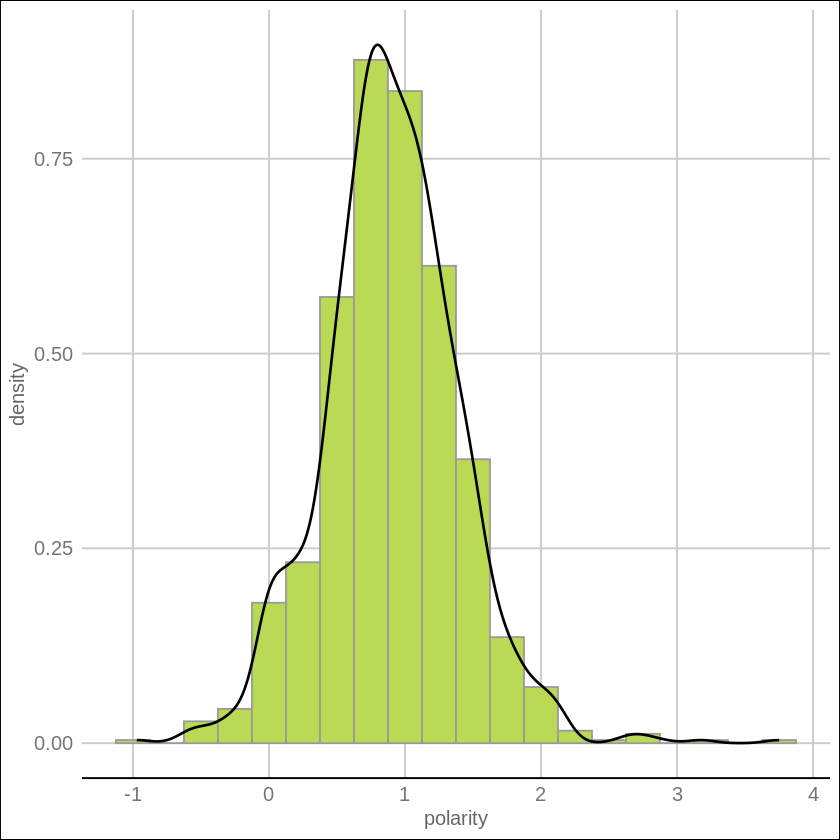

In [ ]:
# Plot Boston polarity all element
ggplot(bos_pol$all, aes(x = polarity, y = after_stat(density))) +  #..density..
  geom_histogram(binwidth = 0.25, fill = "#bada55", colour = "grey60") +
  geom_density(size = 0.75) +
  theme_gdocs() 

***Sortez de la porte et vous l'écrasez! Rapide et facile, la polarité peut vous aider à vous familiariser avec vos données.***

###**Étape 3: Organiser (et nettoyer) le texte**

####**1. Étape 3: Organiser (et nettoyer) le texte**

+ ***Dans ce cours, vous avez appliqué des fonctions à la fois à la matrice de document de terme et au format tibble de texte ordonné. Ainsi, à l’étape 3 du flux de travail d’exploration de texte, organisation et nettoyage, vous allez créer les deux types de données et effectuer un score de polarité simple sur chacun. Lorsque je fais de l’analyse des sentiments, le score de polarité est quelque chose avec lequel je commence presque toujours lorsque je me familiarise avec les données.***

####**2. Allez-y!**
+ **Dans le premier exercice,vous appliquerez la fonction de polarité de qdap et l’ajouterez sous forme de colonne au vecteur de texte des avis de location**. 

+ **Ensuite, vous sous-définirez le texte en critiques positives ou négatives**. 

+ **Ces sous-sections seront regroupées en 2 grands documents identiques à ceux du chapitre 3**. 

+ **Vous clôturerez le premier exercice en créant une matrice de documents terminologiques avec un prétraitement minimal.**

####**3. Plus d’organisation**

+ **Le deuxième exercice, vous allez créer le format de données texte ordonné.** 

+ **Plus précisément, vous appliquerez la fonction unnest_tokens() aux avis de location de Boston**. 

+ **Comme il s’agit d’un exercice ordonné, vous utiliserez l’opérateur de tuyau pour transférer des objets à chaque fonction**. 

+ **Vous ajouterez également une colonne avec mutate() et séquencerez le long pour capturer l’ordre des mots**. 

+ **Selon votre analyse, il peut s’agir d’informations que vous souhaitez conserver, donc j’ajoute presque toujours cette colonne lors d’une analyse de texte ordonnée**. 

+ **Le deuxième exercice se termine par la suppression des mots vides via un anti-jointure. Cela devrait être vieux chapeau maintenant!**

####**4. Score de polarité de texte ordonné**

+ **L’étape 3 se terminera par une simple notation de polarité à l’aide du cadre de données de sentiments de texte ordonné**. 

+ **Pour commencer, vous appellerez les données du package. Sous-ensemble suivant les données ordonnées des lexiques à Bing.** 

+ **Ensuite, en utilisant une partie de l’exemple de code, vous allez remplir le code pour effectuer la jointure interne et enfin muter une nouvelle colonne où la différence entre positif et négatif est calculée**. 

+ **En fin de compte, vous aurez un objet basé sur la polarité qdap et les scores de polarité ordonnés en utilisant une jointure interne pour la comparaison dans un autre objet**. 

+ Bien qu’ils ne soient pas les mêmes, vous découvrirez peut-être qu’ils sont alignés dans une direction.

####**5. Entraînons-nous!**
+ Bonne chance dans les exercices!

###**EXERCICES**

####**Créer des corpus basés sur la polarité**


+ ***Dans cet exercice, vous effectuerez l'étape 3 du workflow d'exploration de texte. Bien que qdap ne soit pas un package bien rangé, vous allez muter() une nouvelle colonne basée sur la liste de polarité renvoyée représentant tous les scores de polarité (c'est un indice BTW). Dans le chapitre 3, nous avons utilisé une fonction personnalisée pol_subsections qui utilise uniquement les déclarations de base R. Cependant, en suivant les principes de l'ordre, cet exercice utilise filter() puis introduit pull(). La fonction pull() fonctionne comme fonctionne comme [[ pour extraire une seule variable.***

+ **Une fois séparés, vous regroupez tous les commentaires positifs et négatifs dans deux documents plus grands représentant tous les mots parmi les avis de location positifs et négatifs.**

+ ***Enfin, vous allez créer une matrice de documents à termes (TDM) pondérée par fréquence de document inverse (TFIDF). Étant donné que ce code d'exercice commence par une structure ordonnée, certaines des fonctions empruntées à tm sont utilisées avec l'opérateur %>% pour garder le style cohérent. Si les bases du package tm ne vous sont pas familières, consultez le cours Text Mining with Bag-of-Words in R. Au lieu de compter le nombre de fois qu'un mot est utilisé (fréquence), les valeurs du TDM sont pénalisées pour les termes surutilisés, ce qui aide à réduire les mots non informatifs.***

####**Instructions**

+ 1) 
  + Obtenez les commentaires positifs.
  + Mutate pour ajouter une colonne de polarité, égale à 

        bos_pol$all$polarity.

  + Filtrer pour conserver les lignes dont la polarité est supérieure à zéro.
  + Utilisez pull() pour extraire la colonne de commentaires. (Passez cette colonne sans guillemets.)
  + Réduire en une seule chaîne, séparée par des espaces à l'aide de paste(), en passant collapse = " ".

+ 2) 

  + Faites de même, cette fois avec des commentaires négatifs.
  + Mutate pour ajouter une colonne de polarité, égale à bos_pol$all$polarity.
  + Filtrer pour conserver les lignes dont la polarité est inférieure à zéro.
  + Extrayez la colonne des commentaires.
  + Réduire en une seule chaîne, séparée par des espaces.


+ 3)

  + Créez un corpus de commentaires positifs et négatifs.
  + Utilisez c() pour concaténer pos_terms et neg_terms.
  + Sourcez le texte en utilisant VectorSource() sans arguments.
  + Convertissez en un corpus volatil en appelant VCorpus(), encore une fois sans arguments.
+ 4)

  + Créez une matrice terme-document à partir de all_corpus.
  + Utilisez la pondération fréquentielle inverse de la fréquence des termes en définissant la pondération sur weightTfIdf.
  + Supprimez la ponctuation en définissant removePunctuation sur TRUE.
  + Utilisez les mots vides en anglais en définissant les mots vides sur mots vides(kind = "en").

In [ ]:
pos_terms <- bos_reviews %>%
  # Add polarity column
  mutate(polarity = bos_pol$all$polarity) %>%
  # Filter for positive polarity
  filter(polarity > 0) %>%
  # Extract comments column
  pull(comments) %>% 
  # Paste and collapse
  paste(collapse = " ")

In [ ]:
print(pos_terms)

[1] "My daughter and I had a wonderful stay with Maura. She kept in close touch with us throughout the day as we weren't arriving til later in the evening. The room was charming and the whole apartment was very warm and eclectic. She asked us what time we'd like breakfast and laid out a very nice spread. Right down the street from Jamaica Pond and very close to Center St. as well. All in all, great experience! We stay at Elizabeth's place for 3 nights in October 2014.\nThe apartment is really a great place to stay. \nLovely decorated and extremely well located. Very close to Back Bay station if you come by train, and close also to the subway and just a nice walk from the city center. \n\nI would say that is better that what you appreciate in the pictures\nAlso the bed is very confortable.\nSo really it was an optimal choice for us. If you're staying in South Boston, this is a terrific place to camp out. The apartment and bedroom are lovely, Ellie is an excellent host, and there is a lo

In [ ]:
neg_terms <- bos_reviews %>%
  # Add polarity column
  mutate(polarity = bos_pol$all$polarity) %>%
  # Filter for negative polarity
  filter(polarity < 0) %>%
  # Extract comments column
  pull(comments) %>% 
  # Paste and collapse
  paste(collapse = " ")

In [ ]:
print(neg_terms)

[1] "You get what you pay for and you don't pay much for this place. It is like a hostel, with several single rooms and shared bathroom. Clean, but not much else. Bed and table are shaky. Good if you're on a tight budget and just need a cheap place to crash for a night. They're strict about check-out times.  Alexandra's apartment is centrally located and very close to the Green Line which makes it convenient. Her apartment is newly renovated. Alexandra was easy to communicate via airbnb messaging (don't email her since she does not check it often). The room has a nice closet, towels and she even left new slippers for guests. The room is very dark at night and in the morning since the window faces another building. \n\nI do wish we would have realized ahead of time that the bed was a modified futon. The pad was thicker than your normal futon, but the back support was not all that great. My parents were actually supposed to stay here while visiting Boston and after one night we had to sw

In [ ]:
# Concatenate the terms
all_corpus <- c(pos_terms, neg_terms) %>% 
  # Source from a vector
  VectorSource() %>% 
  # Create a volatile corpus
  VCorpus()

In [ ]:
all_corpus

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 2

In [ ]:
#all_copus <- clean_corpus(all_corpus)

In [ ]:
all_tdm <- TermDocumentMatrix(
  # Use all_corpus
  all_corpus, 
  control = list(
    # Use TFIDF weighting
    weighting = weightTfIdf, 
    # Remove the punctuation
    removePunctuation = TRUE,
    # Use English stopwords
    stopwords = stopwords(kind = "en")
  )
)


# Examine the TDM
#all_tdm

####**Créez un Tibble de texte bien rangé !**

+ ***Depuis que vous avez appris les principes de rangement, ce code vous aide à organiser vos données dans un tibble afin que vous puissiez ensuite travailler dans le tidyverse !***

+ **Auparavant, vous avez appris que l'application de tidy() sur un objet TermDocumentMatrix() convertira le TDM en tibble. Dans cet exercice, vous allez créer les données de mots directement à partir de la colonne de révision appelée commentaires.**

+ Vous utilisez d'abord unnest_tokens() pour mettre le texte en minuscules et segmenter les avis en mots simples.

+ **Parfois, il est utile de saisir l'ordre des mots d'origine dans chaque groupe d'un corpus. Pour ce faire, utilisez mutate(). Dans mutate(), vous utiliserez seq_along() pour créer une séquence de nombres de 1 à la longueur de l'objet. Cela capturera l'ordre des mots tel qu'il a été écrit.**

+ *Dans le package tm, vous utiliseriez removeWords() pour supprimer les mots vides. Dans le tidyverse, vous devez d'abord charger le lexique des mots vides, puis appliquer un anti_join () entre le cadre de données de texte propre et les mots vides.*

####**Instructions**

+ Créez tidy_reviews en redirigeant (%>%) l'objet de révisions d'origine bos_reviews vers la fonction unnest_tokens(). 

+ Passez un nouveau nom de colonne, mot et déclarez la colonne de commentaires. N'oubliez pas que dans le tidyverse, vous n'avez pas besoin de $ ou de guillemets.


+ Créez une nouvelle variable de manière ordonnée ! 

+ Réécrivez tidy_reviews en redirigeant tidy_reviews vers group_by avec l'identifiant de la colonne. 

+ Puis %>% à nouveau pour muter(). Dans mutate, créez une nouvelle variable original_word_order égale à seq_along(word).

+ Imprimez le tibble, tidy_reviews.

+ Chargez les mots vides "SMART" prédéfinis dans votre session R avec data("stop_words").

+ Remplacez tidy_reviews en transmettant les tidy_reviews d'origine à anti_join() avec un %>%. Dans anti_join(), passez le lexique prédéterminé des stop_words.

In [ ]:
# Vector to tibble
tidy_reviews <- bos_reviews %>% 
  unnest_tokens(word, comments)

In [ ]:
# Group by and mutate
tidy_reviews <- tidy_reviews %>% 
  group_by(id) %>% 
  mutate(original_word_order = seq_along(word))

# Quick review
tidy_reviews

In [ ]:
# Load stopwords
data("stop_words")

# Perform anti-join
tidy_reviews_without_stopwords <- tidy_reviews %>% 
  anti_join(stop_words)

####**Comparez Tidy Sentiment à Qdap Polarity**

+ Ici, vous apprendrez que différentes méthodes de sentiment entraîneront des résultats différents. 

+ Souvent, vous aurez simplement besoin d'aligner les résultats de manière directionnelle, bien que les spécificités puissent être différentes. 

+ Dans le dernier exercice, vous avez créé tidy_reviews qui est une base de données d'avis de location sans mots vides. Plus tôt dans ce chapitre, vous avez calculé et tracé la fonction polarity() de base de qdap. Cela vous a montré que les critiques ont tendance à être positives.

+ Effectuons maintenant une analyse similaire à la manière de tidytext ! Rappelez-vous d'un chapitre précédent, vous effectuerez un inner_join() suivi de count() puis d'un pivot_wider().

+ Enfin, vous allez créer une nouvelle colonne en utilisant mutate() et en passant positif - négatif.

####**Instructions**

+ L'utilisation de la fonction get_sentiments() avec "bing" permet d'obtenir le lexique de subjectivité bing.
+ Appelez le lexique bing.
+ Puisque vous avez déjà écrit ce code au chapitre 2, entrez simplement dans l'objet lexique, bing, le nouveau nom de colonne (polarité) et son calcul dans mutate().
+ Appelez enfin summary() sur le nouvel objet pos_neg. + Bien que les valeurs soient différentes, après examen de la moyenne, la plupart des avis de location sont-ils également positifs par rapport à l'utilisation de la polarité() ? Voyez-vous "l'inflation des notes ?"

In [ ]:
# Get the correct lexicon
bing <- get_sentiments("bing")

# Calculate polarity for each review
pos_neg <- tidy_reviews %>% 
  inner_join(bing) %>%
  count(sentiment) %>%
  pivot_wider(names_from = sentiment, values_from = n, values_fill = 0) %>% 
  mutate(polarity = positive - negative)

# Check outcome
summary(pos_neg)

###**Révision du nuage de comparaison**

####**1. Révision du nuage de comparaison**

+ Maintenant que vos données sont organisées et quelle que soit la façon dont vous les coupez, la matrice de document de terme ou le tibble, vous savez que la polarité de l’avis de location est positive. 

+ Cela arrive souvent car il y a des pressions sociales lors de la rédaction d’un avis. 

+ Par exemple, les gens peuvent ne pas aimer un aspect d’un service, mais tout de même ajouter un langage positif parce qu’ils se sentent mal pour le représentant du centre d’appels ou les serveurs. 

+ Cette section tente d’explorer les aspects des bonnes locations tout en réduisant la polarité « inflation de grade ».

####**2. Effort de l’auteur**

+ Le premier exercice, vous explorerez la relation entre la polarité et l’effort de l’auteur. 

+ D’après votre expérience, je parie que vous écrivez des critiques plus longues lorsque vous vous extasez sur quelque chose comme ce cours DataCamp et inversement, vous êtes plus court lorsque vous écrivez une critique ho-hum d’un cours python. 

+ Il s’avère que cela se produit avec beaucoup de gens, plus vos sentiments sont forts, plus vous pouvez écrire et avec plus de langage signifie plus d’opportunités d’utilisation polarisée des mots. 

+ Rappelons que le tibble des avis a une colonne appelée ID. Étant donné que les données sont organisées comme un tibble, compter les instances de l’ID comptera le nombre total de mots pour la révision. Cela sera utilisé dans votre visuel pour faire un nuage de points démontrant la relation entre la polarité et l’effort de l’auteur.

####**3. Comparaisons**
+ Ensuite, vous allez exécuter ce nuage de comparaison simple que vous avez créé au chapitre 3. 

+ Pour commencer, vous l’appliquez aux critiques en fonction de la polarité telle qu’elle a été calculée. 

+ Rappelez-vous qu’avec le nuage de comparaison, les grands mots sont liés à la fréquence. De plus, un nuage de comparaison ne tracera que les termes qui ne sont pas partagés.

####**4. Révision du nuage de comparaison**
+ Dans le dernier exercice de cette section, vous allez refaire le nuage de comparaison mais vous allez d’abord appliquer la fonction échelle aux scores de polarité. 

+ Plus précisément, vous allez mettre à l’échelle le score de polarité à partir des valeurs de polarité de qdap. 

+ Si vous n’êtes pas familier, la fonction d’échelle standardise vos données. 

+ En utilisant les valeurs par défaut de l’échelle, la moyenne moyenne de la colonne est soustraite de tous les points de données, puis chaque point de données est divisé par l’écart type entre tous les points. 

+ Si vous vous souvenez de vos jours de statistiques, c’est un z-score. 

+ Dans ce cas, cela a pour effet de ramener la moyenne de polarité de son niveau gonflé à zéro. Comme il s’agit de la valeur utilisée pour sous-définir le corpus maintenant, vous aurez des révisions modifiées dans l’autre sous-section et le nuage de comparaison sera différent en conséquence.

####**5. Toujours plus d’analyse peut être faite!**


+ Gardez à l’esprit qu’il s’agit d’une courte étude de cas et qu’une analyse des sentiments beaucoup plus intéressante peut être effectuée sur les données. 

+ Portez une attention particulière aux grands mots dans les visuels pour répondre aux questions plus tard. 

+ Personnellement, je n’aime pas beaucoup les nuages de mots, mais en seulement quelques exercices courts, vous pourrez voir ce qui fait une bonne révision de location, il est donc indéniable de l’avantage d’utiliser la fréquence des mots avec la polarité comme point de départ pour une analyse des sentiments.

####**6. Entraînons-nous!**

####**Évaluation de l'effort de l'auteur**

+ ***Souvent, les auteurs utilisent plus de mots lorsqu'ils sont plus passionnés. Par exemple, un passager fou d'une compagnie aérienne laissera un avis plus long sur le pire service (le perçu). À l'inverse, un passager moins passionné peut ne pas se sentir obligé de passer beaucoup de temps à rédiger un avis. De longs avis peuvent gonfler le sentiment général, car les avis contiendront intrinsèquement un langage plus positif ou négatif à mesure que l'avis s'allonge. Cet exercice de codage permet d'examiner l'effort et le sentiment.***

+ *Dans cet exercice, vous allez visualiser la relation entre l'effort et le sentiment. Rappelez-vous que votre dossier d'avis de location contient un identifiant et qu'un mot est représenté dans chaque ligne. En conséquence, un simple count() de l'identifiant capturera le nombre de mots utilisés dans chaque avis. Ensuite, vous joindrez ce résumé aux données positives et négatives. En fin de compte, vous créerez un nuage de points qui visualisera la longueur de la révision de l'auteur et sa relation avec la polarité.*

####**Consignes**

+ Calculer une mesure de l'effort comme le nombre de id.

+ Jointure interne à la polarité de chaque avis, pos_neg.
Mutate pour ajouter une colonne pol. 

+ Utilisez ifelse() pour définir pol sur "Positive" si la polarité est supérieure ou égale à zéro, sinon "Negative".

+ En utilisant pos_neg_pol, tracez n en fonction de la polarité, coloré par pol.
+ Ajoutez une couche de points en utilisant geom_point().
+ Ajoutez une couche de tendance lisse à l'aide de geom_smooth().

In [ ]:
library(textdata)
# Get the correct lexicon
bing <- get_sentiments("bing")

In [ ]:
# From previous step
pos_neg_pol <- tidy_reviews %>% 
  count(id) %>% 
  inner_join(pos_neg) %>% 
  mutate(pol = ifelse(polarity >= 0, "Positive", "Negative"))
  
# Plot n vs. polarity, colored by pol
ggplot(pos_neg_pol, aes(polarity, n, color = pol)) + 
  # Add point layer
  geom_point(alpha = 0.25) +
  # Add smooth layer
  geom_smooth(method = "lm", se = FALSE) +
  theme_gdocs() +
  ggtitle("Relationship between word effort & polarity")

####**Nuage de comparaison**

+ ***Cet exercice créera un visuel commun pour vous permettre de comprendre la fréquence des termes. Plus précisément, vous passerez en revue les termes les plus fréquents parmi les documents réduits positifs et négatifs. Rappelez le TermDocumentMatrix all_tdm que vous avez créé précédemment. Au lieu de 1000 avis de location, la matrice contient 2 documents contenant tous les avis séparés par le score polarity().***

+ **Il est généralement plus facile de changer le TDM en matrice. De là, vous renommez simplement les colonnes. N'oubliez pas que la fonction colnames() est appelée sur le côté gauche de l'opérateur d'affectation, comme indiqué ci-dessous.**

        noms de colonne(OBJET) <- c("COLUMN_NAME1", "COLUMN_NAME2")


+ *Une fois cela fait, vous réorganiserez la matrice pour voir les mots les plus positifs et les plus négatifs. Révisez ces termes pour pouvoir répondre aux exercices de conclusion !*

+ Enfin, vous visualiserez les termes à l'aide de comparison.cloud().

####**Instructions**
+ Remplacez all_tdm préchargé par une matrice appelée all_tdm_m à l'aide de as.matrix().
+ Utilisez colnames() sur all_tdm_m pour déclarer c("positif", "négatif").
+ Appliquez order() à all_tdm_m[,1] et définissez la diminution = TRUE.
+ Passez en revue les 10 principaux termes du TDM réorganisé en utilisant pipe (%>%) puis head() avec n = 10.
+ Répétez les deux étapes précédentes avec des commentaires négatifs. Maintenant, vous allez ordonner() par la deuxième colonne, all_tdm_m[,2] et utiliser décroissant = TRUE.
+ Passez en revue les 10 termes les plus négatifs en indexant all_tdm_m par order_by_neg. Pipe ceci à head() avec n = 10.

+ Dessinez un compare.cloud() sur all_tdm_m. Spécifiez max.words égal à 20.



In [ ]:
# Matrix
all_tdm_m <- as.matrix(all_tdm)

# Column names
colnames(all_tdm_m) <- c("positive", "negative")

# Top pos words
order_by_pos <- order(all_tdm_m[, 1], decreasing = TRUE)

# Review top 10 pos words
all_tdm_m[order_by_pos, ] %>% head(10)

# Top neg words
order_by_neg <- order(all_tdm_m[, 2], decreasing = TRUE)

# Review top 10 neg words
all_tdm_m[order_by_neg, ] %>% head(10)

In [ ]:
# From previous step
all_tdm_m <- as.matrix(all_tdm)
colnames(all_tdm_m) <- c("positive", "negative")

comparison.cloud(
  # Use the term-document matrix
  all_tdm_m,
  # Limit to 20 words
  max.words = 20,
  colors = c("darkgreen","darkred")
)

####**Nuage de comparaison à l'échelle**

+ ***Vous vous souvenez de "l'inflation des notes" des scores de polarité sur les avis de location ? Parfois, une autre façon de découvrir un aperçu consiste à ramener les scores à 0, puis à effectuer le sous-ensemble du corpus. Cela signifie que certains des commentaires précédemment positifs peuvent faire partie de la sous-section négative ou vice versa puisque la moyenne est changée en 0. Cet exercice vous aidera à mettre à l'échelle les scores, puis à re-tracer la comparaison.cloud(). La suppression de "l'inflation des notes" peut aider à fournir des informations supplémentaires.***

+ **Auparavant, vous appliquiez polarity() aux commentaires bos_reviews$commentaires et créiez une comparaison.cloud(). Dans cet exercice, vous allez mettre à l'échelle () le résultat avant de créer la comparaison.cloud (). Voyez si cela montre quelque chose de différent dans le visuel !**

+ *Puisqu'il s'agit en grande partie d'un exercice de révision, une grande partie du code existe, remplissez simplement les bons objets et paramètres !*

####**Instructions**

+ Passez en revue une section du bos_pol$all préchargé lors de l'indexation [1:6,1:3].
+ Ajoutez une nouvelle colonne appelée scaled_polarity avec scale() appliquée à la colonne de score de polarité 

      bos_pol$all$polarity.

+ Pour les commentaires positifs, subset() où la nouvelle colonne bos_reviews$scaled_polarity est supérieure à (>) zéro.

+ Pour les commentaires négatifs, subset() où la nouvelle colonne bos_reviews$scaled_polarity est inférieure à (<) zéro.

+ Créez pos_terms en utilisant paste() sur pos_comments.

+ Créez maintenant neg_terms avec paste() sur neg_comments.
+ Organisez les documents réduits, les documents pos_terms et neg_terms en un seul corpus appelé all_terms.


+ Suivre le flux de travail tm habituel en imbriquant VectorSource() dans VCorpus() appliqué à all_terms.


+ Créez TermDocumentMatrix() en utilisant l'objet all_corpus. 

+ Notez qu'il s'agit d'un TDM pondéré TfIdf avec des fonctions de nettoyage de base.


+ Remplacez all_tdm par all_tdm_m en utilisant as.matrix(). 

+ Renommez ensuite les colonnes du code existant en "positif" et "négatif".


+ Enfin! appliquez comparison.cloud() à l'objet matrice all_tdm_m. Prenez note des nouveaux mots négatifs les plus fréquents. Peut-être qu'il découvrira un aperçu inconnu!

In [ ]:
# Review
bos_pol$all[1:6,1:3]

# Scale/center & append
bos_reviews$scaled_polarity <- scale(bos_pol$all$polarity)

# Subset positive comments
pos_comments <- subset(bos_reviews$comments, bos_reviews$scaled_polarity > 0)

# Subset negative comments
neg_comments <- subset(bos_reviews$comments, bos_reviews$scaled_polarity < 0)

# Paste and collapse the positive comments
pos_terms <- paste(pos_comments, collapse = " ")

# Paste and collapse the negative comments
neg_terms <- paste(neg_comments, collapse = " ")

# Organize
all_terms <- c(pos_terms,neg_terms)

# VCorpus
all_corpus <- VCorpus(VectorSource(all_terms))

# TDM
all_tdm <- TermDocumentMatrix(
  all_corpus, 
  control = list(
    weighting = weightTfIdf,
    removePunctuation = TRUE, 
    stopwords = stopwords(kind = "en")
  )
)

# Column names
all_tdm_m <- as.matrix(all_tdm)
colnames(all_tdm_m) <- c("positive", "negative")

# Comparison cloud
comparison.cloud(
  all_tdm_m, 
  max.words = 100,
  colors = c("darkgreen", "darkred")
)

###**Étape 6 : Parvenir à une conclusion**
####**1. Étape 6 : Parvenir à une conclusion**

+ ***Cette dernière section comporte 2 questions à choix multiples. En tant que data scientist appliqué, je veux toujours ramener mon analyse à une conclusion et éviter l’analyse de curiosité. Pour répondre aux questions suivantes, j’espère que vous avez prêté attention aux mots dans les nuages de comparaison! Bien que simples et de bon sens, les termes dans les critiques vous aideront à répondre aux questions suivantes.***

####**2. Trouvez les moments d’ampoule!**

+ La dernière étape du flux de travail d’exploration de texte consiste à parvenir à un aperçu ou à une conclusion. 

+ Dans cette étude de cas, vous avez rapidement parcouru un millier d’avis de location à Boston pour voir ce qui fait une expérience positive ou négative. 

+ De cette façon, vous saurez si votre appartement à Boston sera une bonne expérience de location. Bonne chance pour parvenir à votre conclusion finale d’analyse des sentiments!

####**3. Entraînons-nous!**

###**EXERCICES**


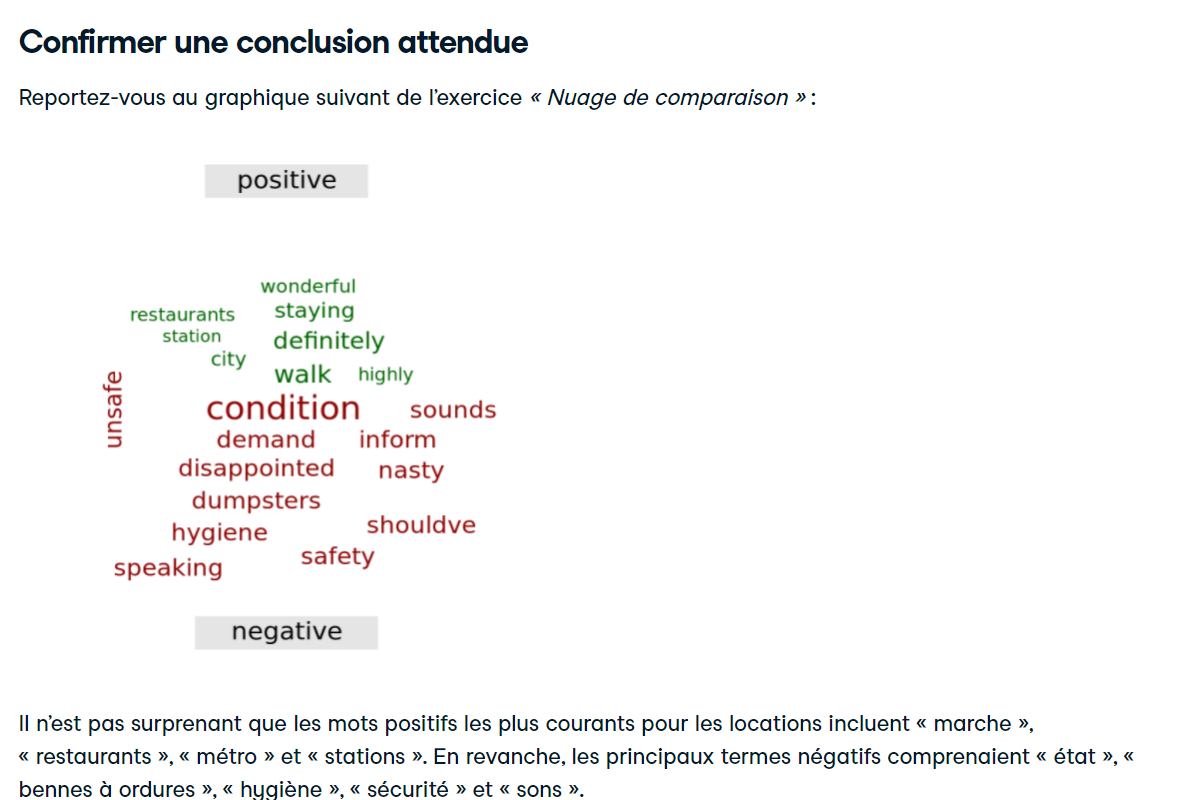

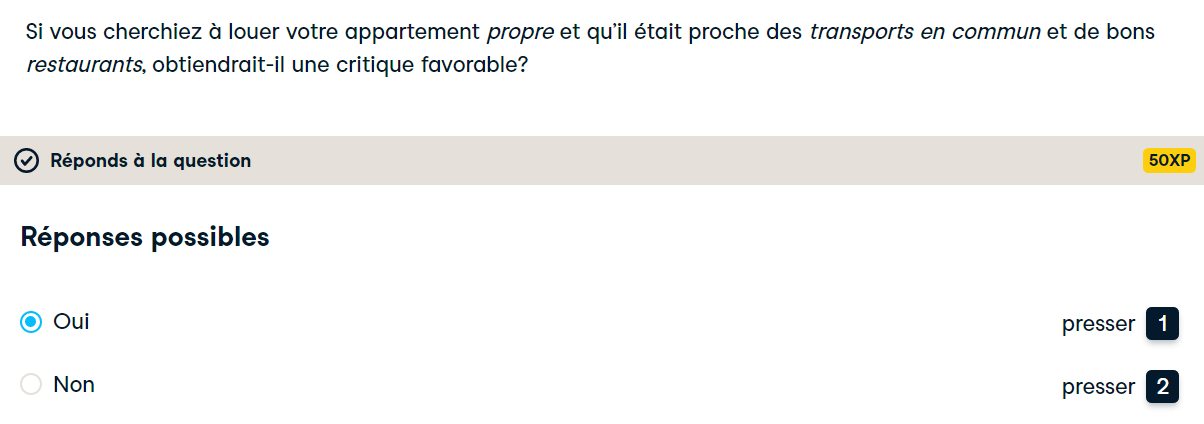

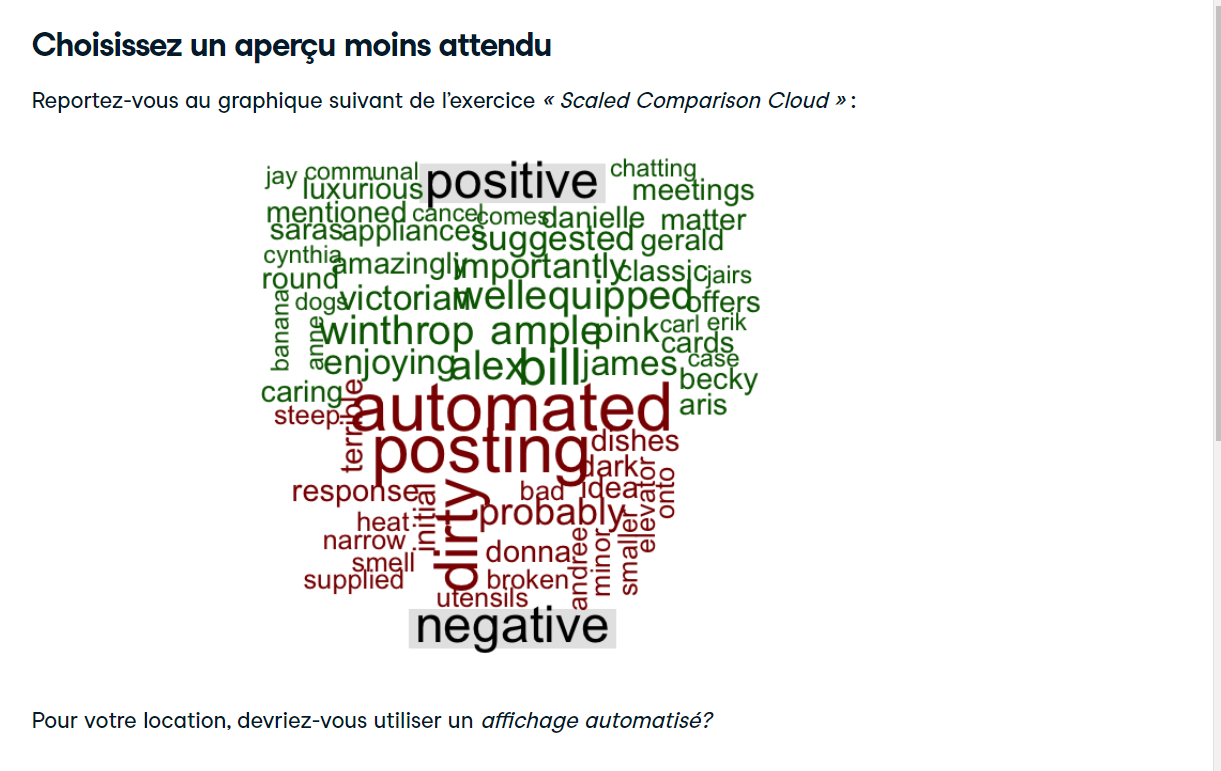

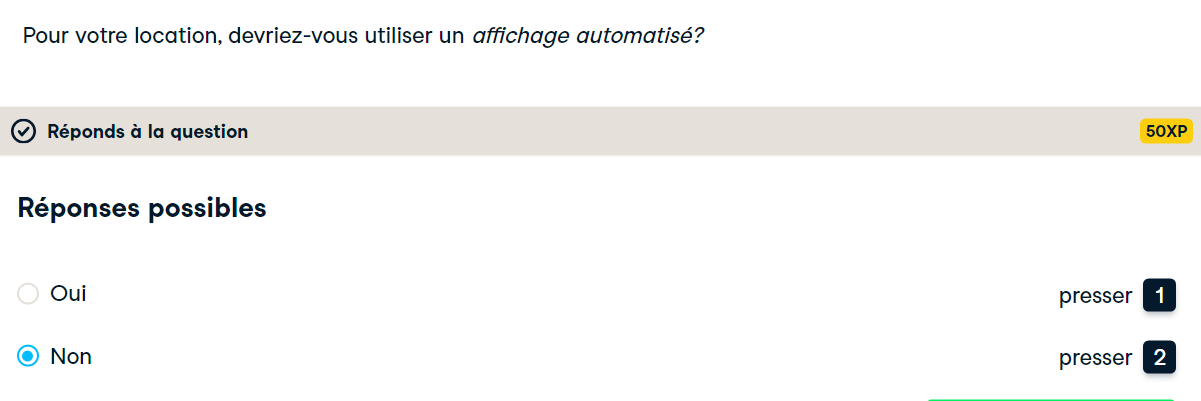